### Data Load

In [21]:
dir_data = 'data/'
dir_raw = 'data/raw/'
dir_preprocessed = 'data/preprocessed/'

### EDA

##### libs

In [22]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [23]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)     # Muestra todas las filas (¡cuidado con dataframes muy grandes!)
pd.set_option('display.width', 1000)        # Ajusta el ancho del output
pd.set_option('display.expand_frame_repr', False)  # Evita saltos de línea en columnas grandes


##### Preliminary analysis

we transform all files into csv and add a row at the end stating the maneuver the dataset is representing.

In [24]:
# assign another attribute to each dataframe of each file being the name of the file removing the first part 'STISIMData:'

# files = os.listdir(dir_raw)
# dfs = []
# for driver in files:
#     files = os.listdir(dir_raw + driver)
#     for file in files:
#         df = pd.read_excel(dir_raw + driver + '/' + file)
#         df['maniobra'] = file[11:-5]
#         df.to_csv(dir_preprocessed + '/column_added/' + driver + '_' + file[11:-5], index=False)
#         dfs.append(df)
#         #print(file + ' processed')
#     print(driver + ' processed')

In [25]:
dfs = []
for file in os.listdir(dir_preprocessed + '/column_added'):
    df = pd.read_csv(dir_preprocessed + '/column_added/' + file)
    dfs.append(df)

##### Missing Values

In [26]:
# plot missing values
for df in dfs:
    print(df.isnull().mean())
    # sns.heatmap(df.isnull(), cbar=False)
    # plt.show()

Elapsed time            0.000000
Long Dist               0.000000
Lat Pos                 0.000000
Steering wheel angle    0.000000
Throttle input          0.000000
Brake pedal force       0.000000
Gas pedal               0.000000
Brake pedal             0.000000
Clutch pedal            0.000000
Left turn               0.000000
Right turn              0.000000
Gear                    0.000000
speed                   0.000000
RPM                     0.000000
Hand wheel torque       0.000000
Maneuver marker flag    0.000000
Accidents               0.999888
Collisions              0.999888
Peds Hit                0.999888
Speeding Tics           0.999888
Red Lgt Tics            0.999888
Speed Exceed            0.999888
Stop Sign Ticks         0.999888
maniobra                0.000000
dtype: float64
Elapsed time            0.000000
Long Dist               0.000000
Lat Pos                 0.000000
Steering wheel angle    0.000000
Throttle input          0.000000
Brake pedal force       0.00

As we see, there are columns that have a great ammount of missing values (>99%), so we proceed removing them.

Eventhough they may be relevant, we consider them uninformative as the ammount is too small.

Note: They may represent accidents as the % of missing values in them are all the same.

We assume that only that these rows are extras, the instances are fine.

In [27]:
dfs = [df.drop( columns=['Accidents', 'Collisions', 'Peds Hit', 'Speeding Tics', 'Red Lgt Tics', 'Speed Exceed', 'Stop Sign Ticks']) for df in dfs]

dropeamos Long Dist, Lat Pos, Throtle input, etc. porque no es necesario (segun el enunciado)

Utilizaremos:

* Speed - Velocidad
* RPM - Revoluciones por minuto 
* Steering Wheel angle - Ángulo del volante.  
* Gas Pedal - Pedal del acelerador. 
* Brake Pedal - Pedal del freno (b),  
* Clutch Pedal - Pedal del embrague  
* Gear – Marcha.

Nota: Tras varias pruebas de quitando columnas 1 por 1, se ha visto que long pdist y lat post impactan en gran medida el rendimiento del modelo, debido al desconocimiento de si es fuga de datos, decidimos eliminarlo tambien.

In [28]:
dfs = [df.drop(columns=['Elapsed time', 'Long Dist', 'Lat Pos', 'Hand wheel torque', 'Throttle input']) for df in dfs]

In [29]:
dfs[0].head()

Steering wheel angle  Brake pedal force  Gas pedal  Brake pedal  Clutch pedal  Left turn  Right turn  Gear  speed      RPM  Maneuver marker flag        maniobra
0                 -8.24               1.36          0            0             0          0           0     0   0.06  147.244                     0  3step-Turnings
1                 -8.24               1.36          0            0             0          0           0     0   0.04  184.118                     0  3step-Turnings
2                 -8.24               1.36          0            0             0          0           0     0   0.02  219.193                     0  3step-Turnings
3                 -8.24               1.36          0            0             0          0           0     0   0.00  252.554                     0  3step-Turnings
4                 -8.24               1.36          0            0             0          0           0     0   0.00  284.287                     0  3step-Turnings

In [30]:
for df in dfs:
    # print max min and mean only of each column
    print(df.describe().loc[['max', 'min', 'mean']])

      Steering wheel angle  Brake pedal force     Gas pedal   Brake pedal  Clutch pedal  Left turn  Right turn      Gear      speed          RPM  Maneuver marker flag
max             414.060000          87.160000  59627.000000  29041.000000  64253.000000   1.000000         0.0  4.000000  84.590000  4774.648000              1.000000
min            -466.580000           1.360000      0.000000      0.000000      0.000000   0.000000         0.0 -1.000000   0.000000   124.919000              0.000000
mean             -4.288223           4.866916  19731.515392   1187.196239  32681.562745   0.115527         0.0  0.983656  27.076534  1690.436524              0.591627
      Steering wheel angle  Brake pedal force     Gas pedal   Brake pedal  Clutch pedal  Left turn  Right turn      Gear      speed          RPM  Maneuver marker flag
max              22.660000          30.970000  53331.000000  10023.000000  64253.000000    1.00000    1.000000  4.000000  90.610000  4119.349000              1.00000

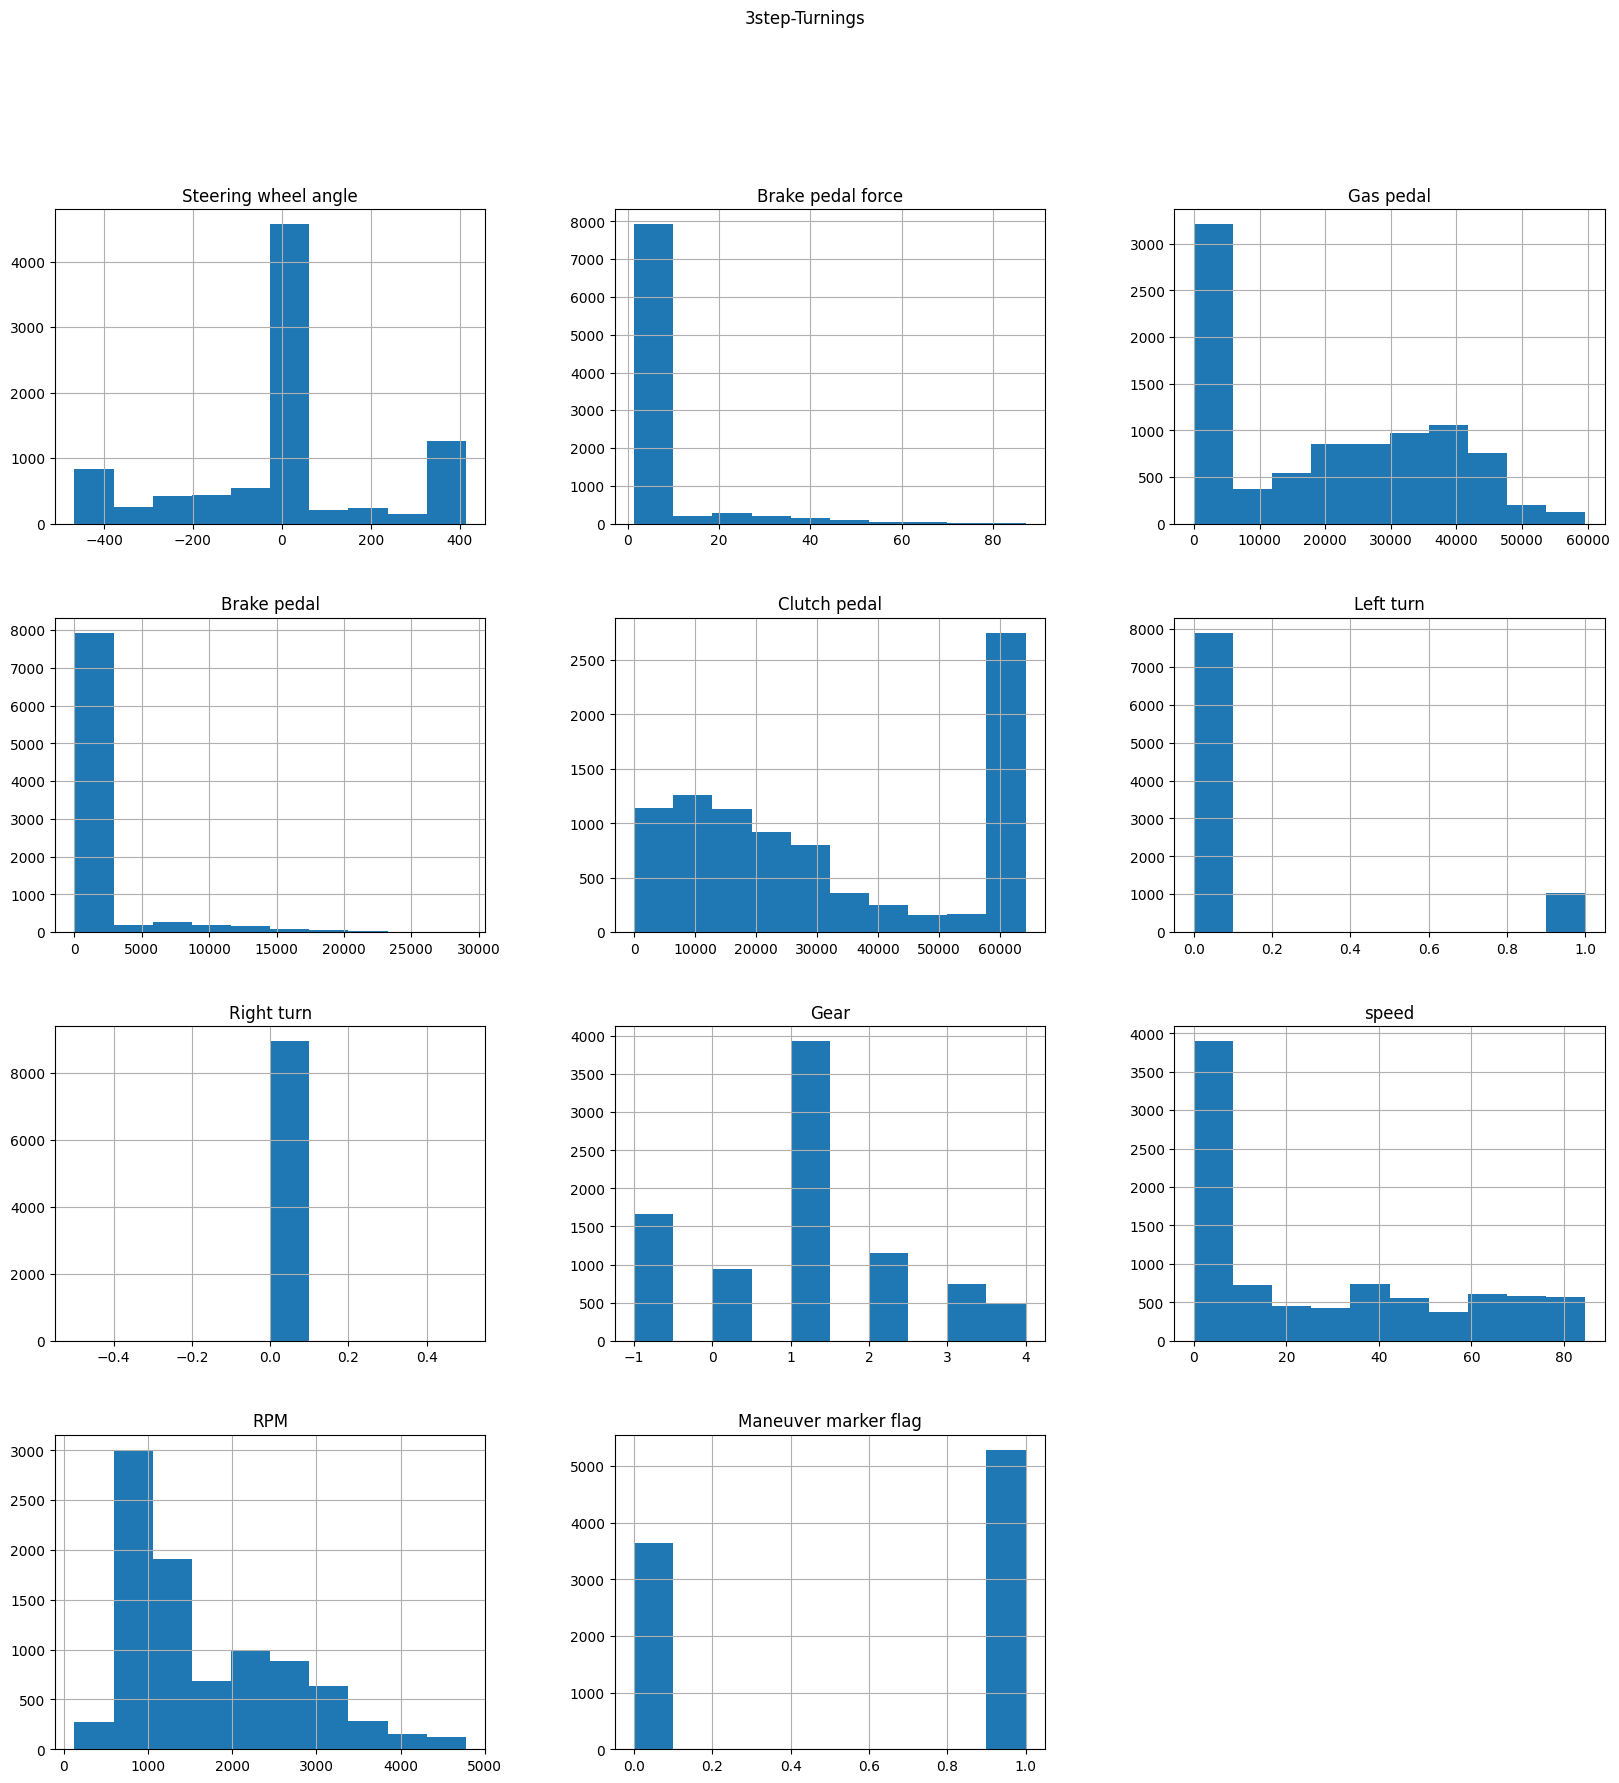

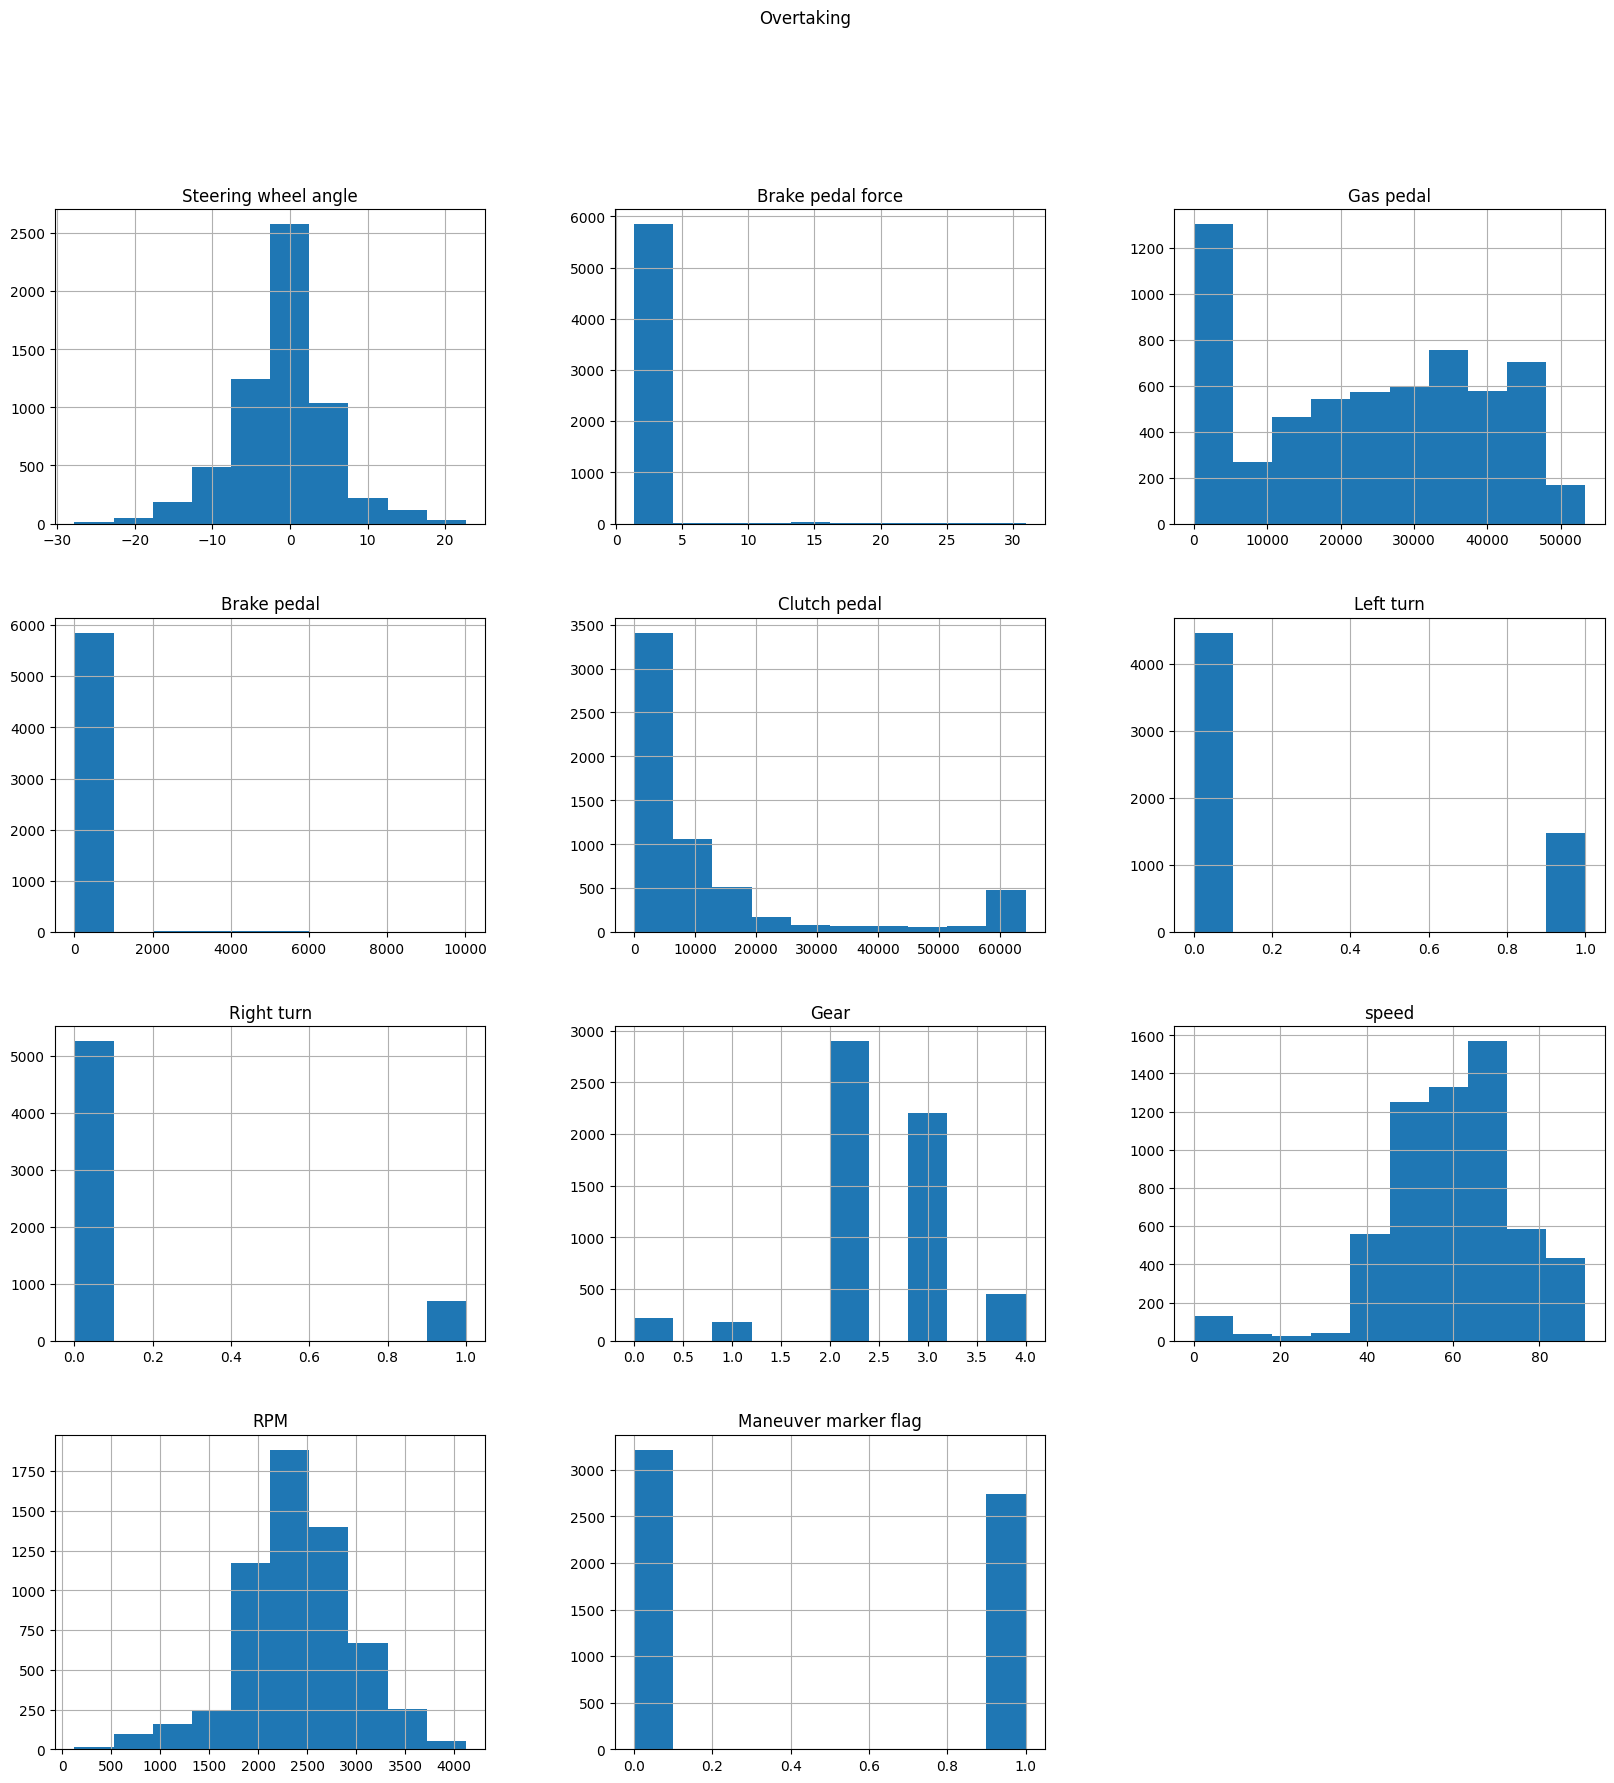

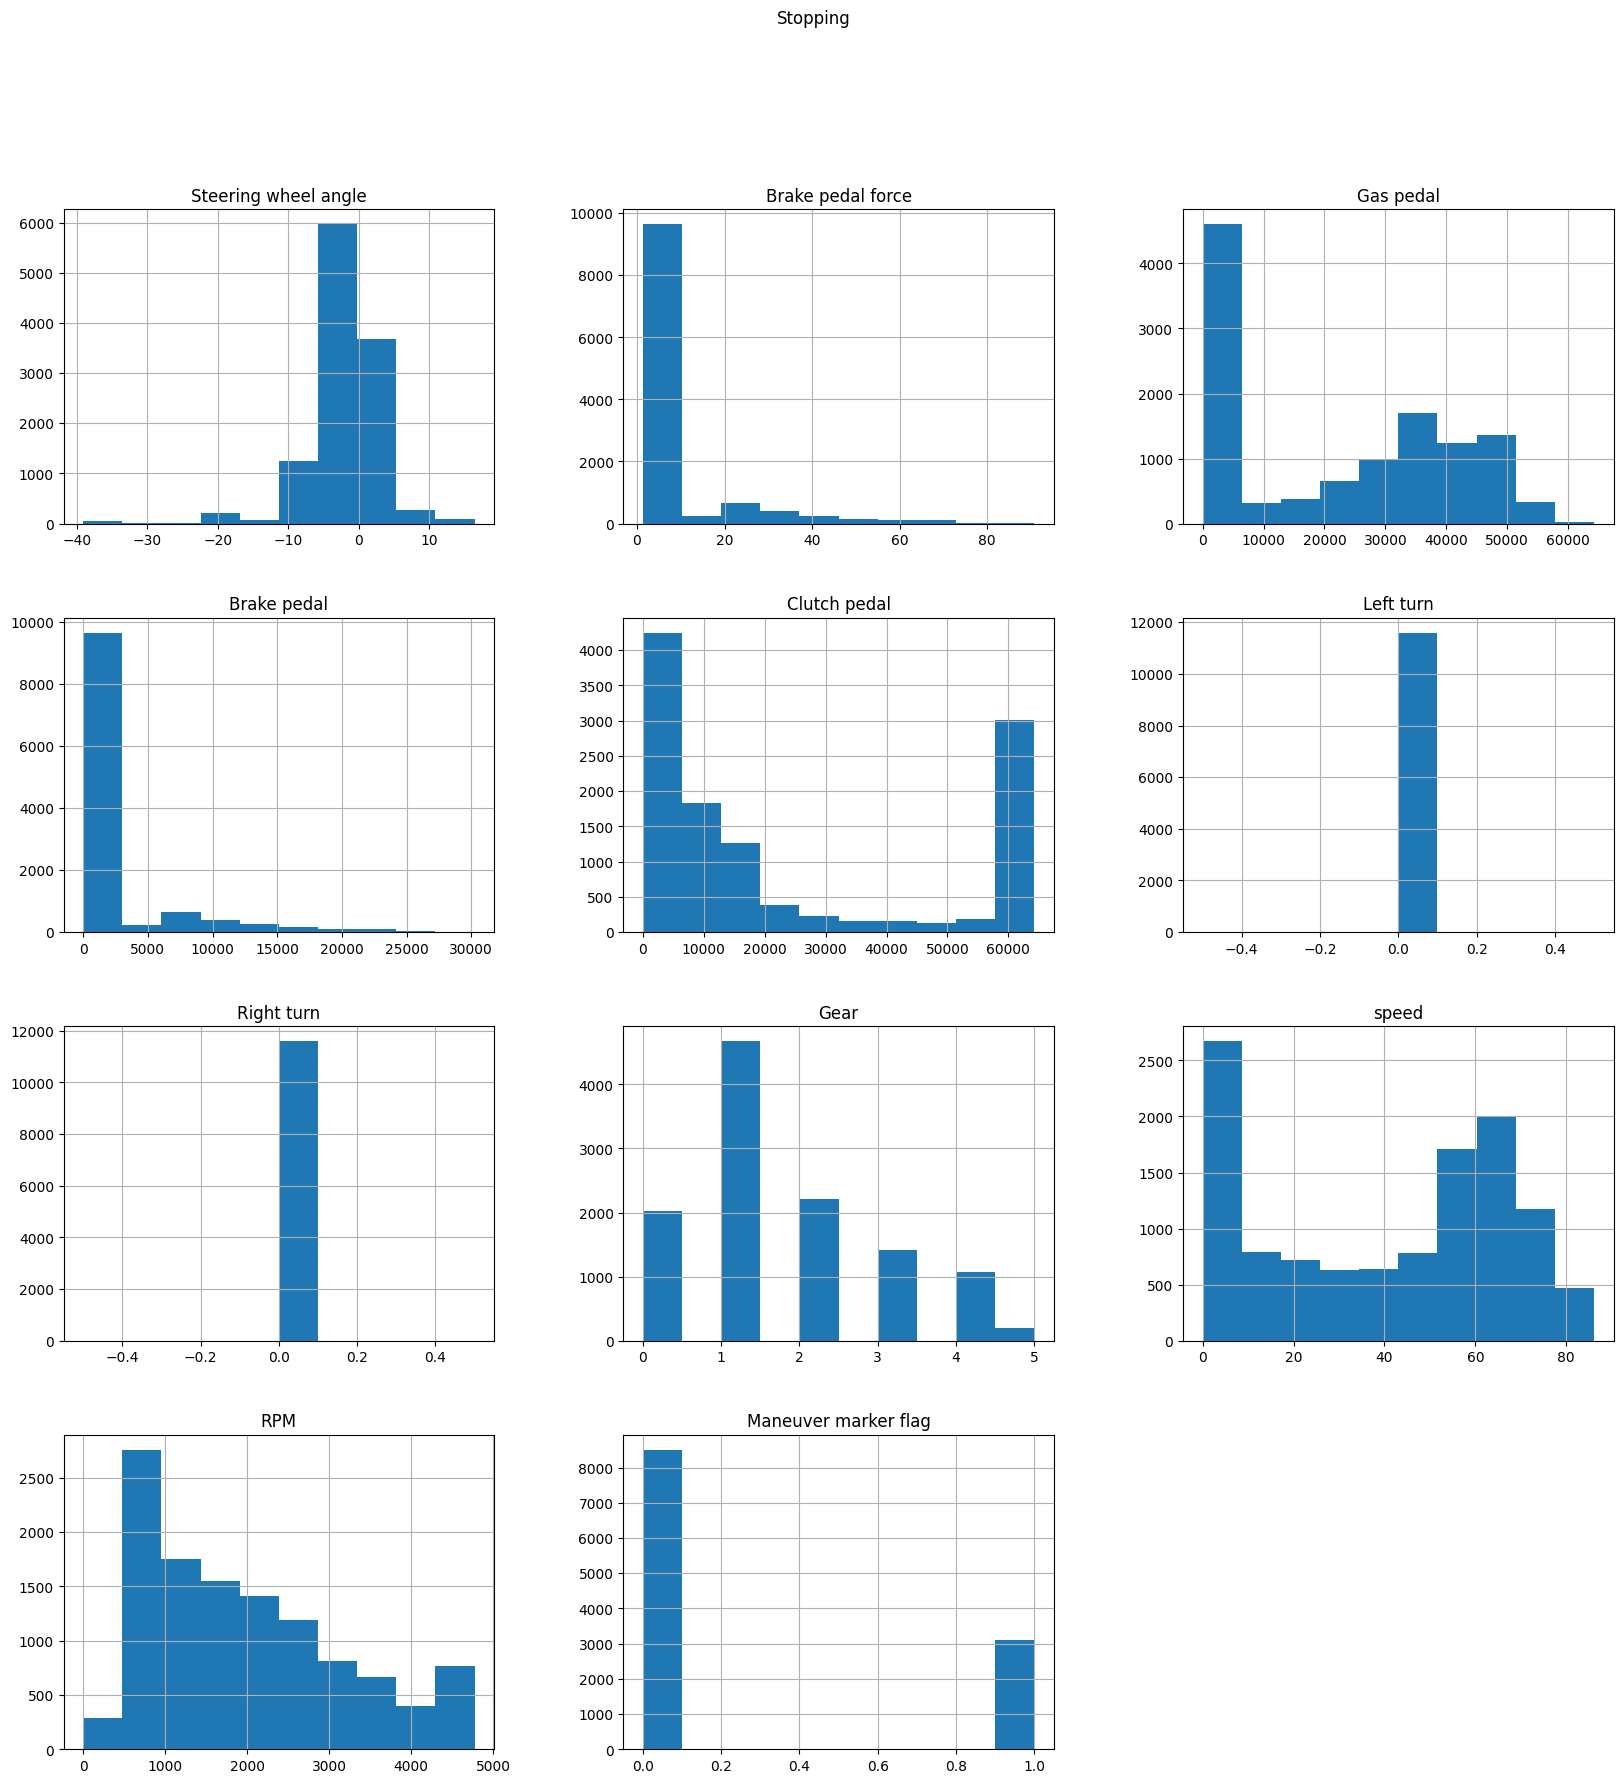

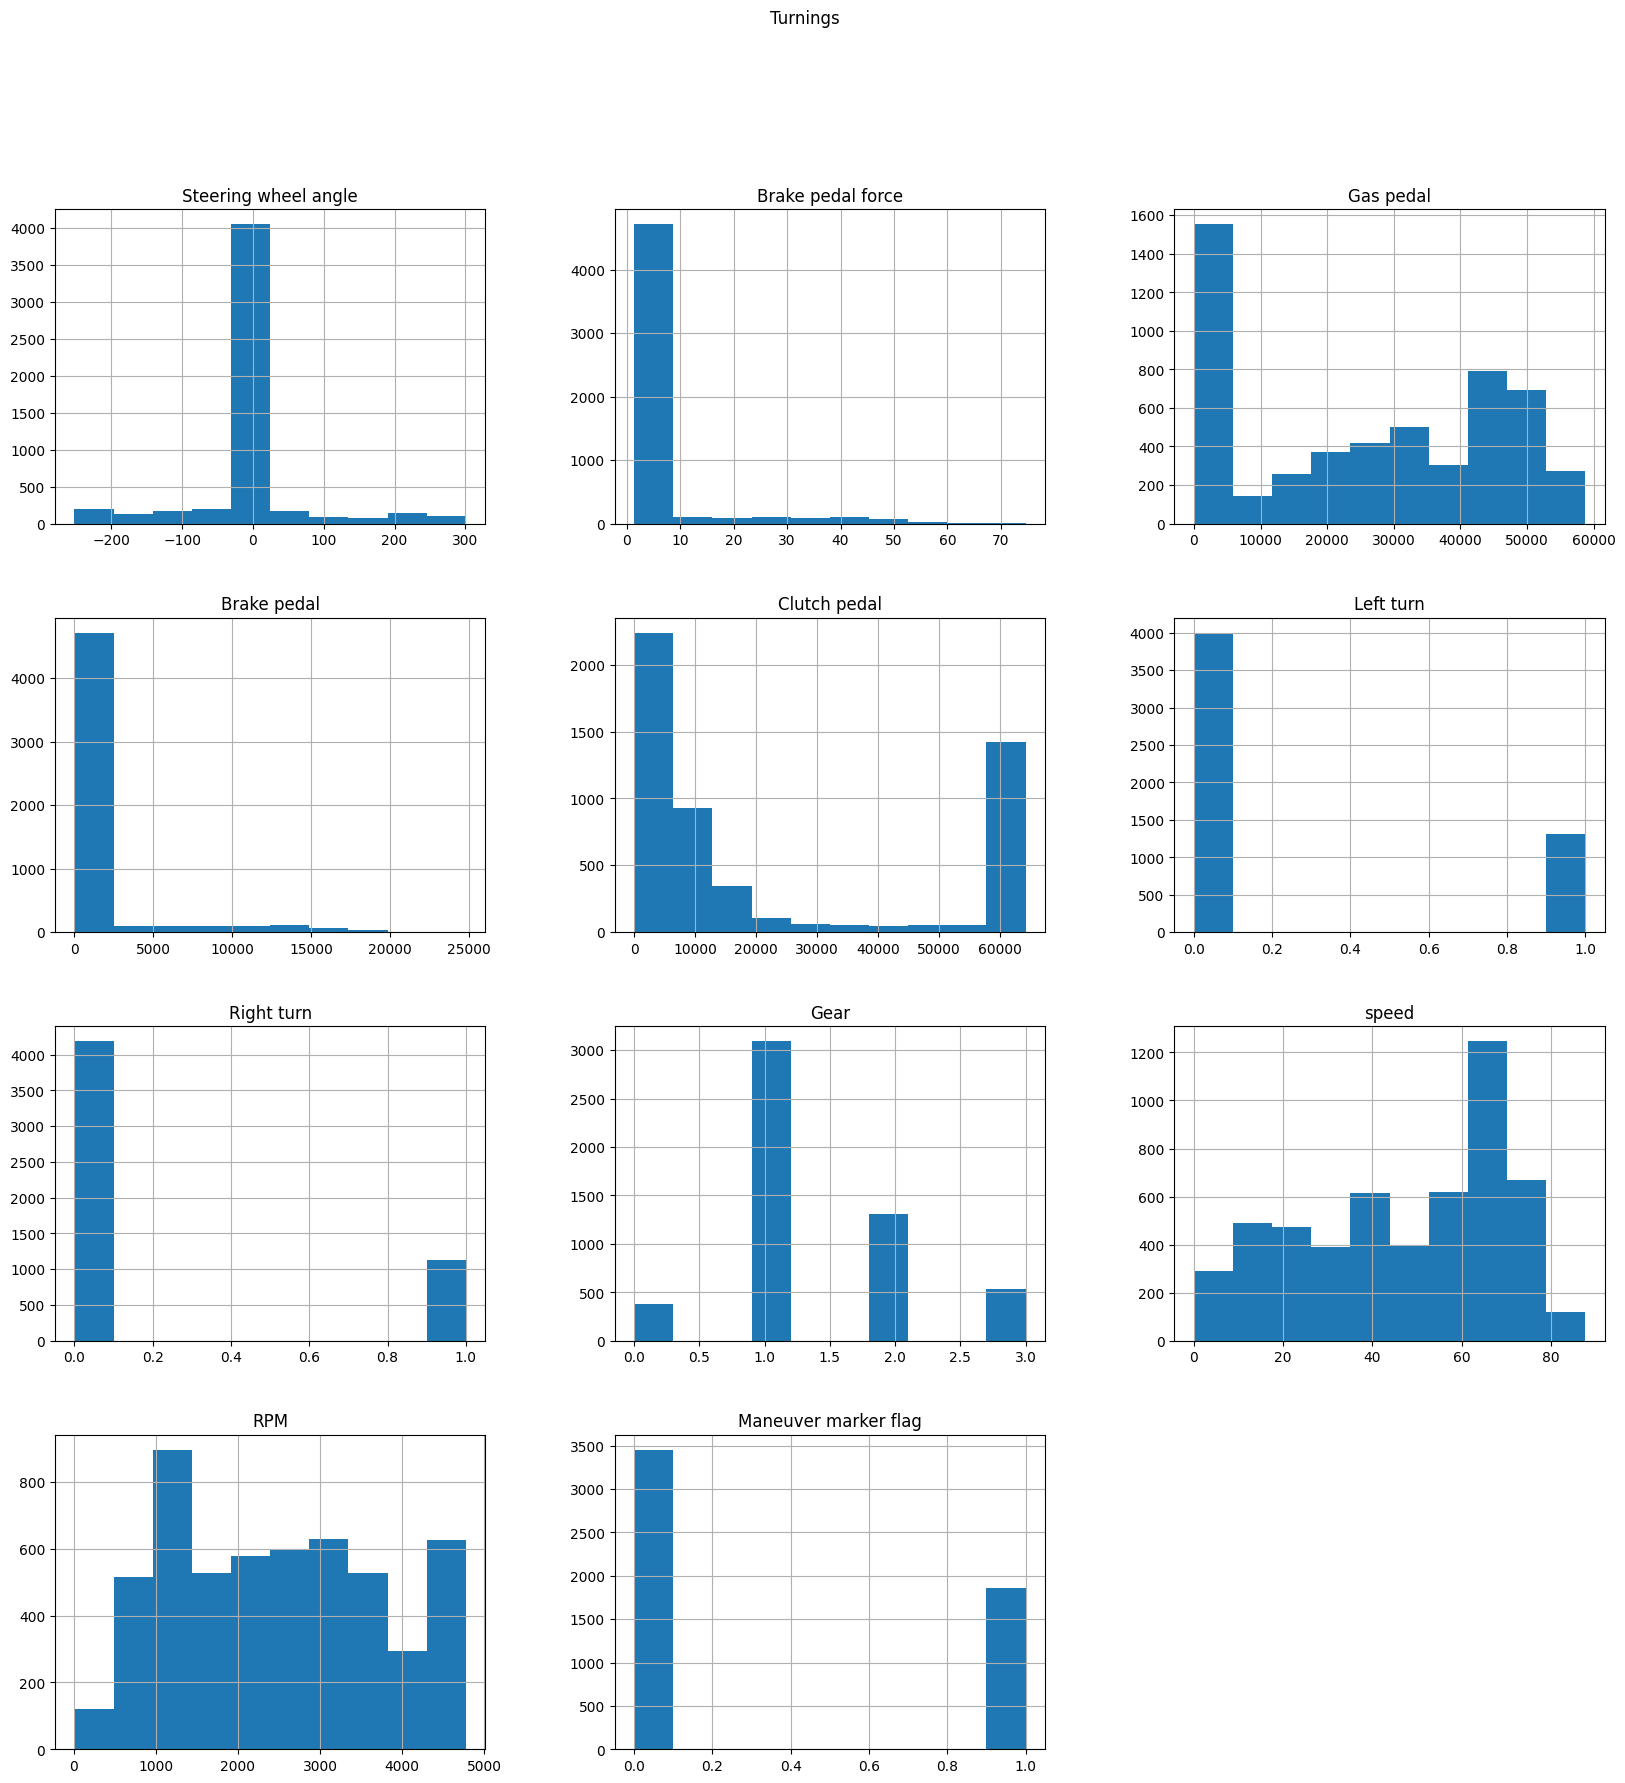

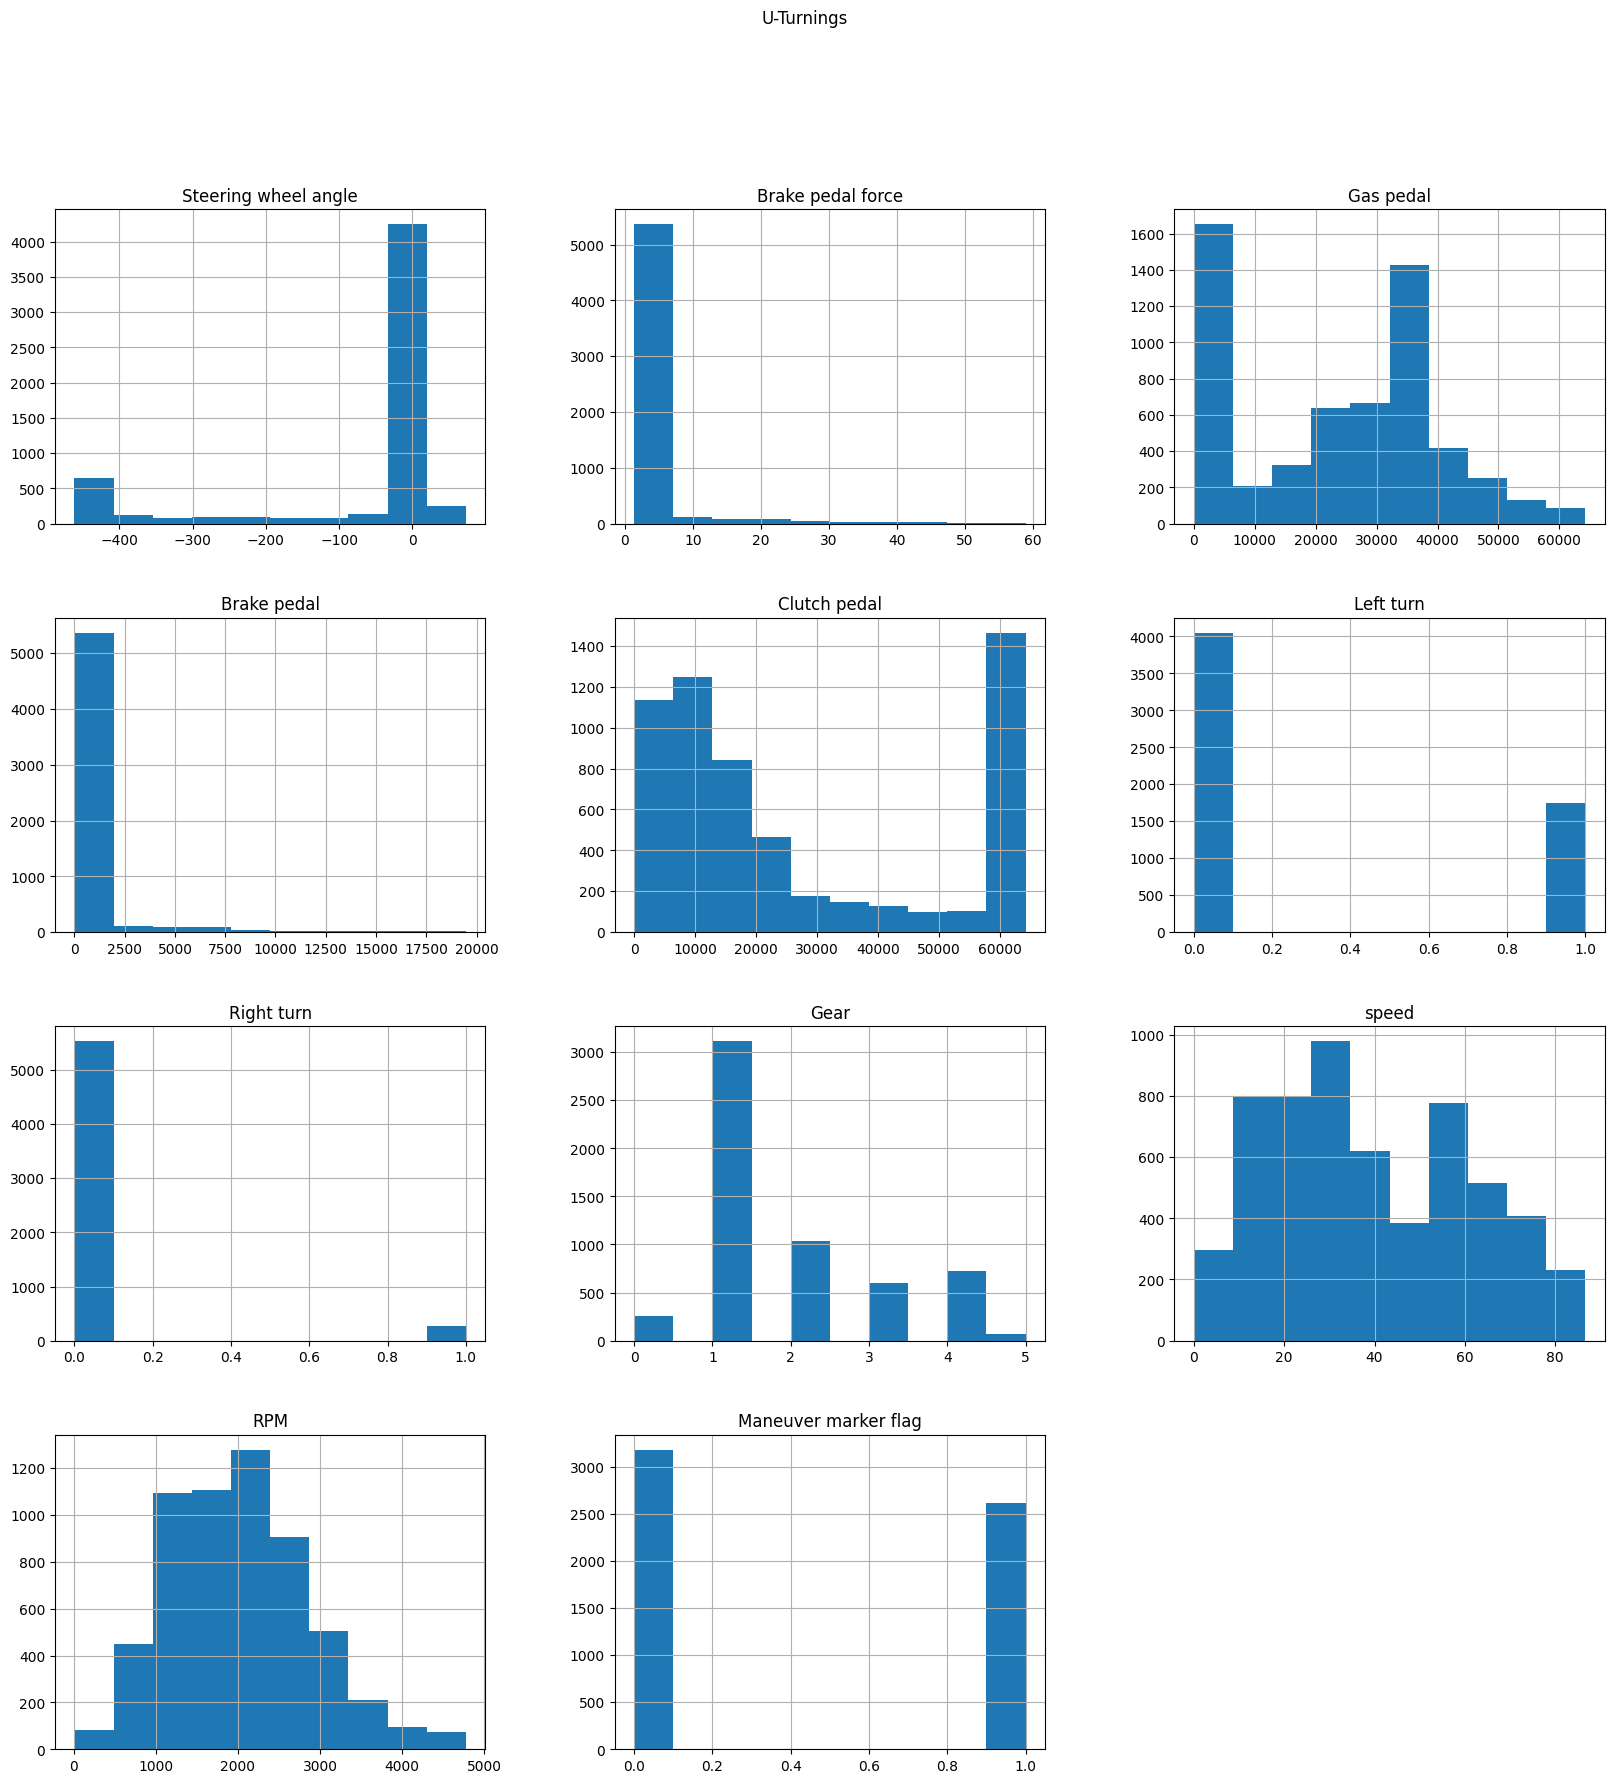

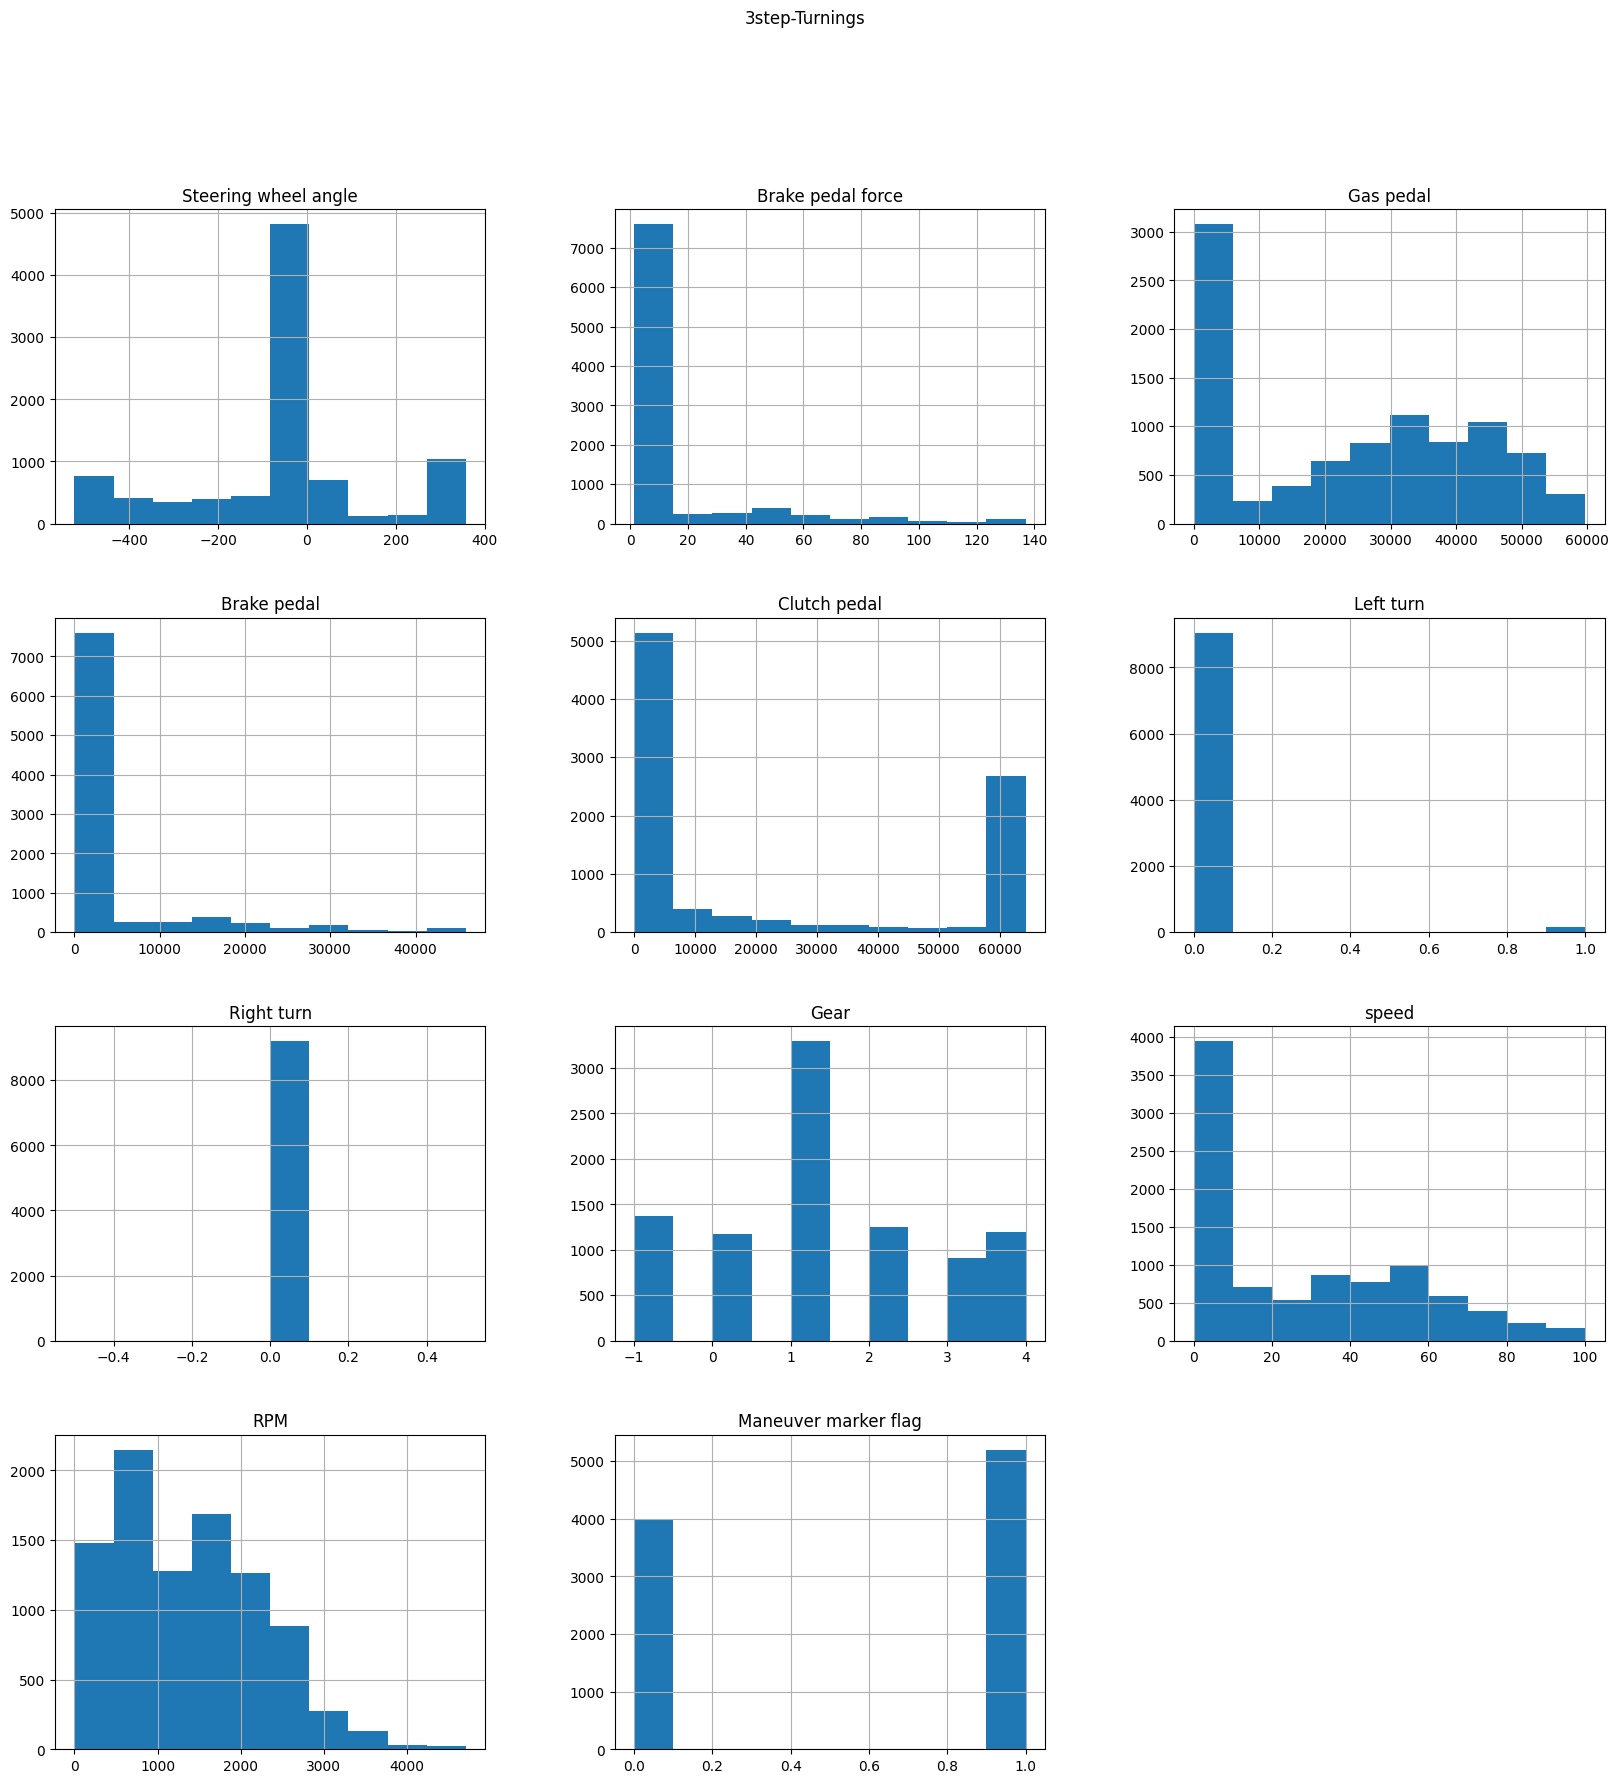

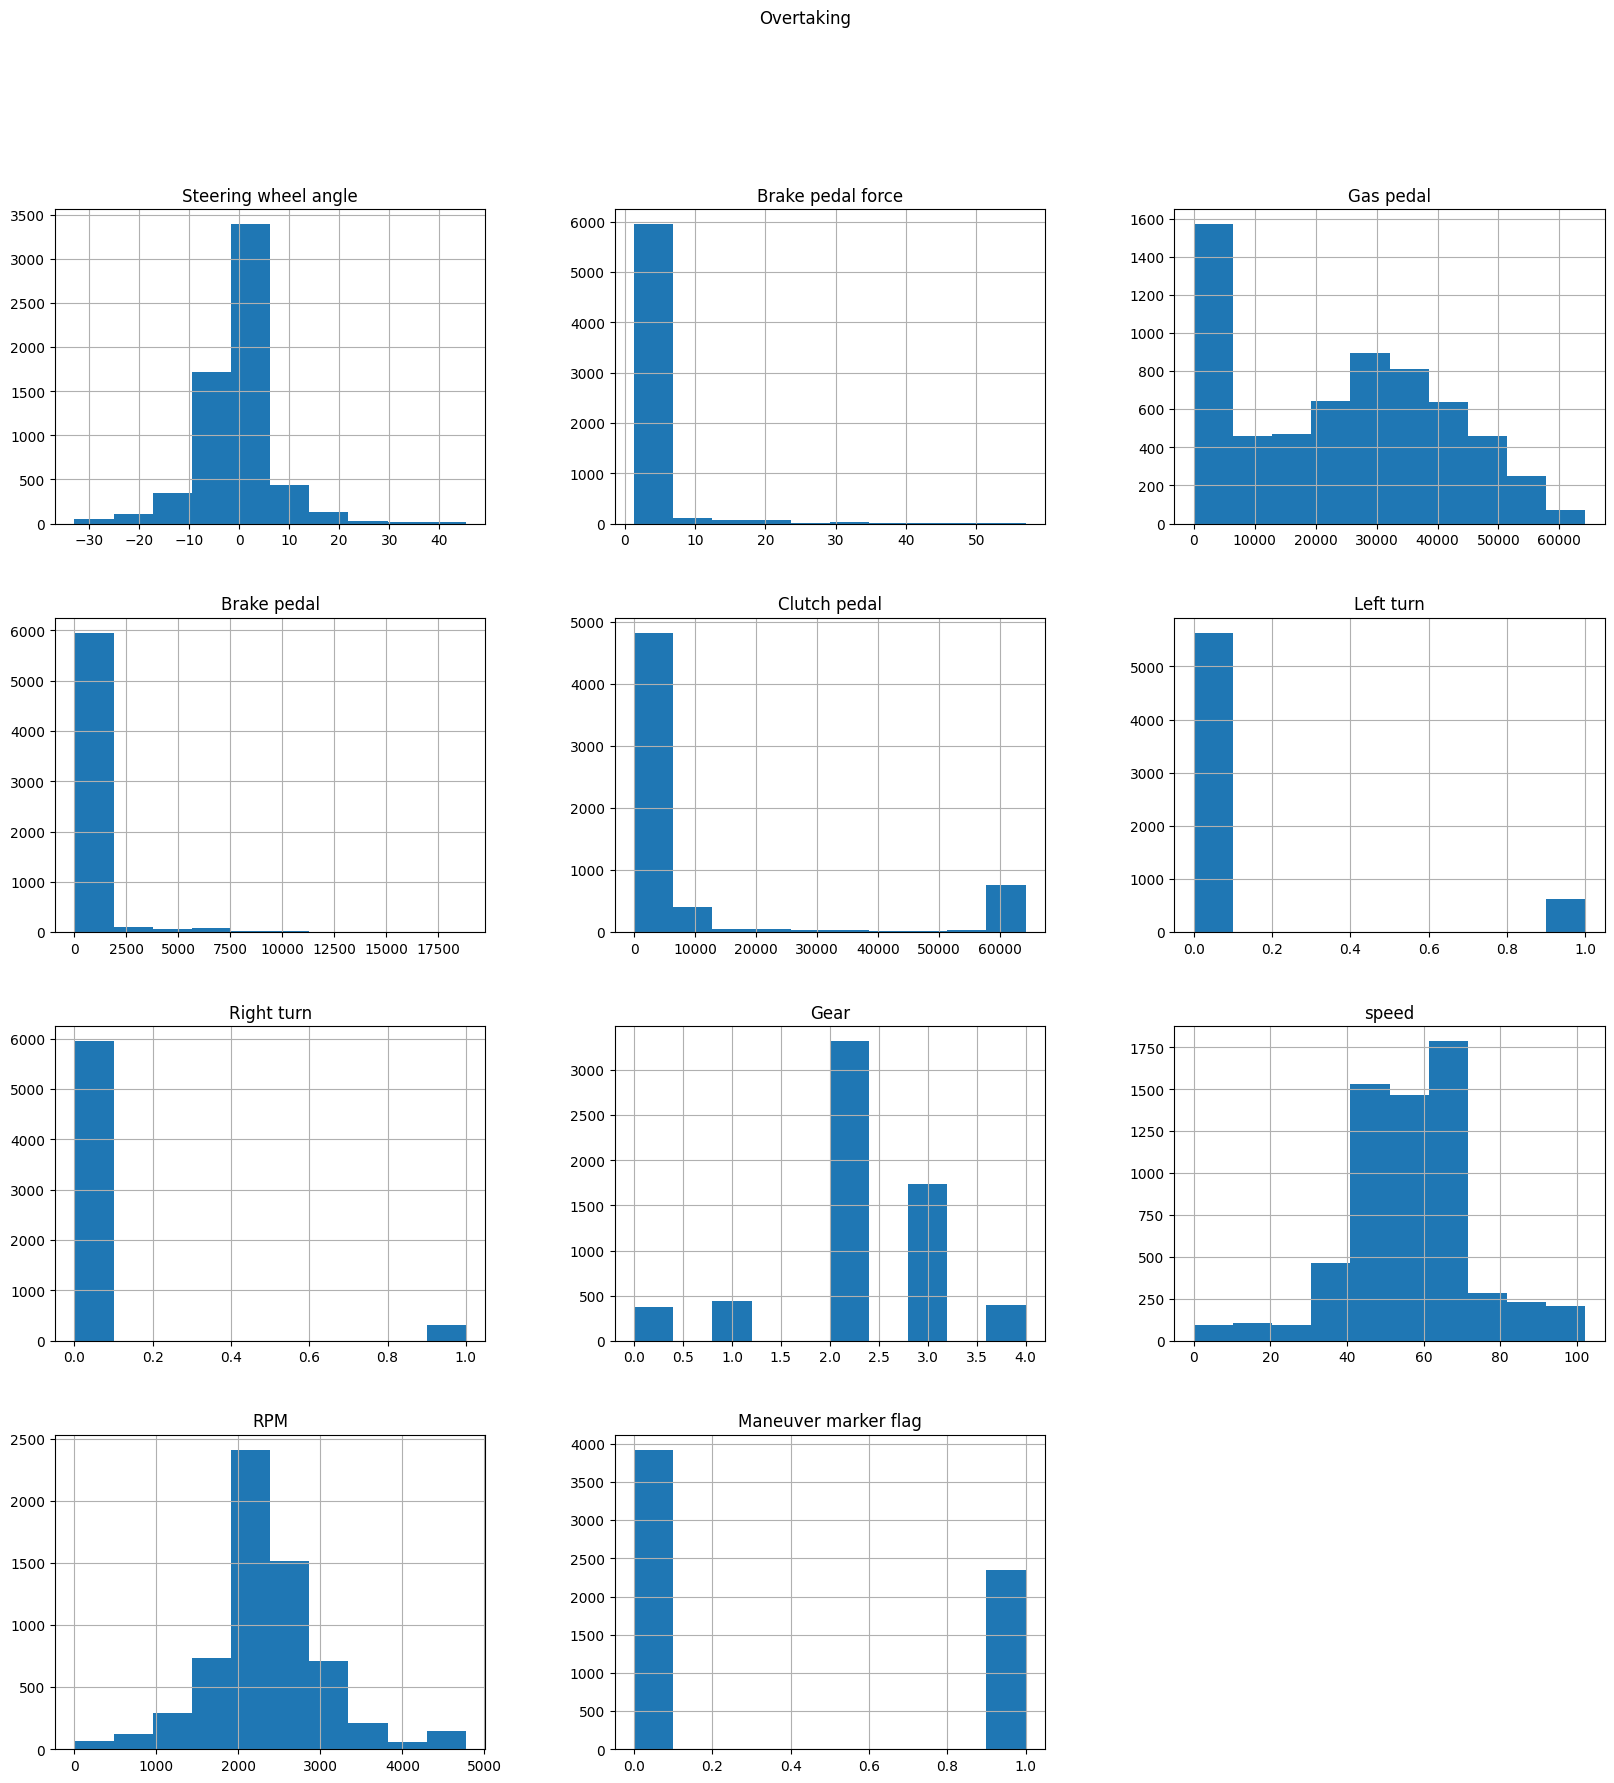

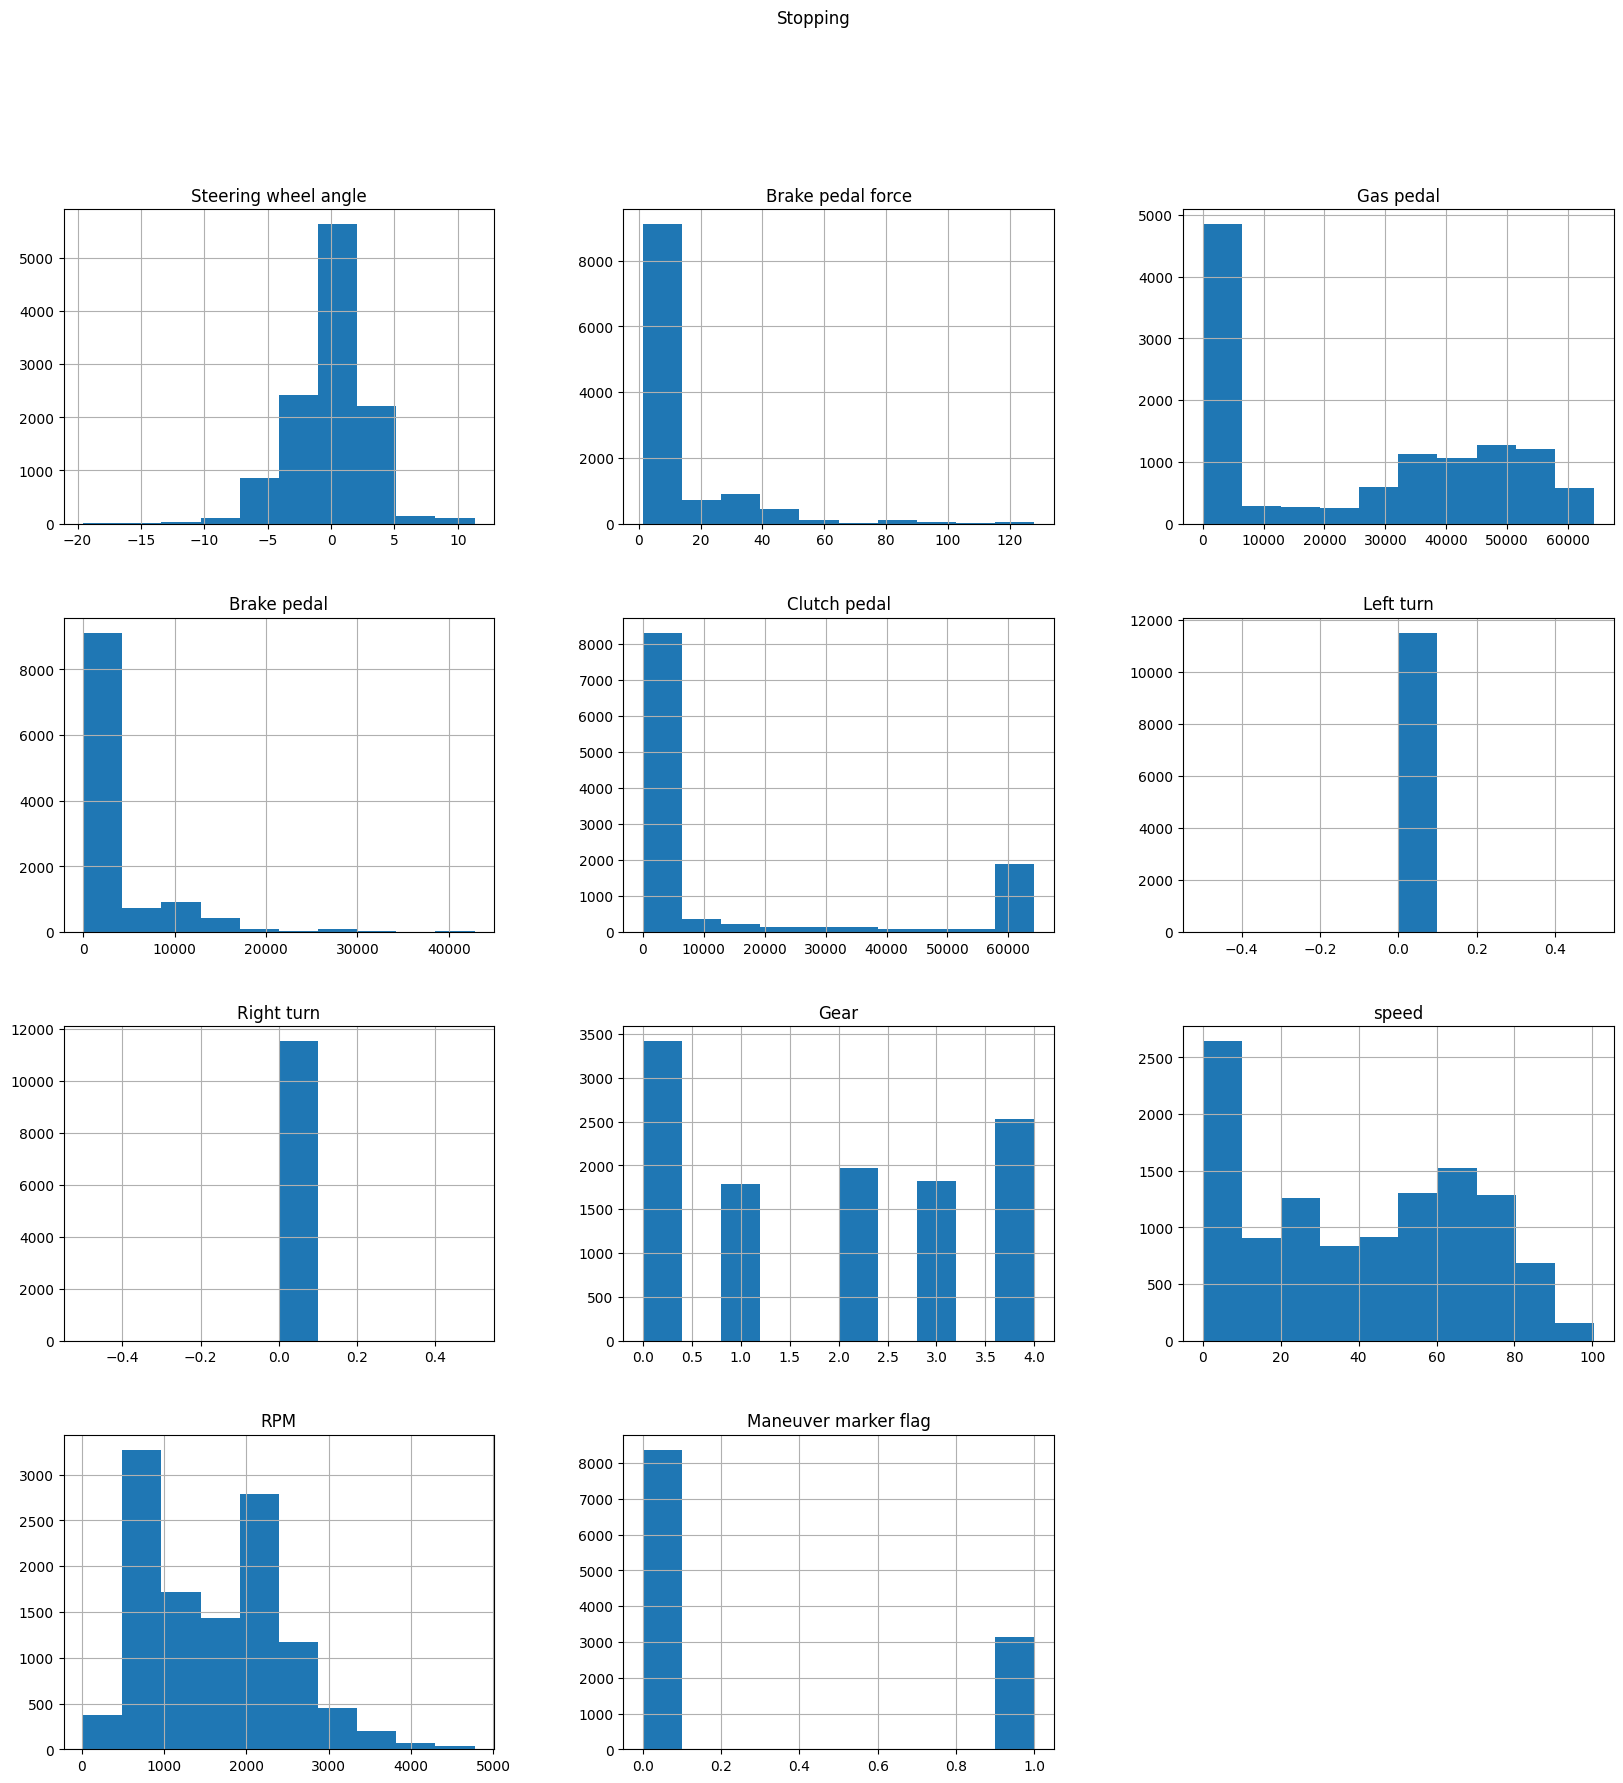

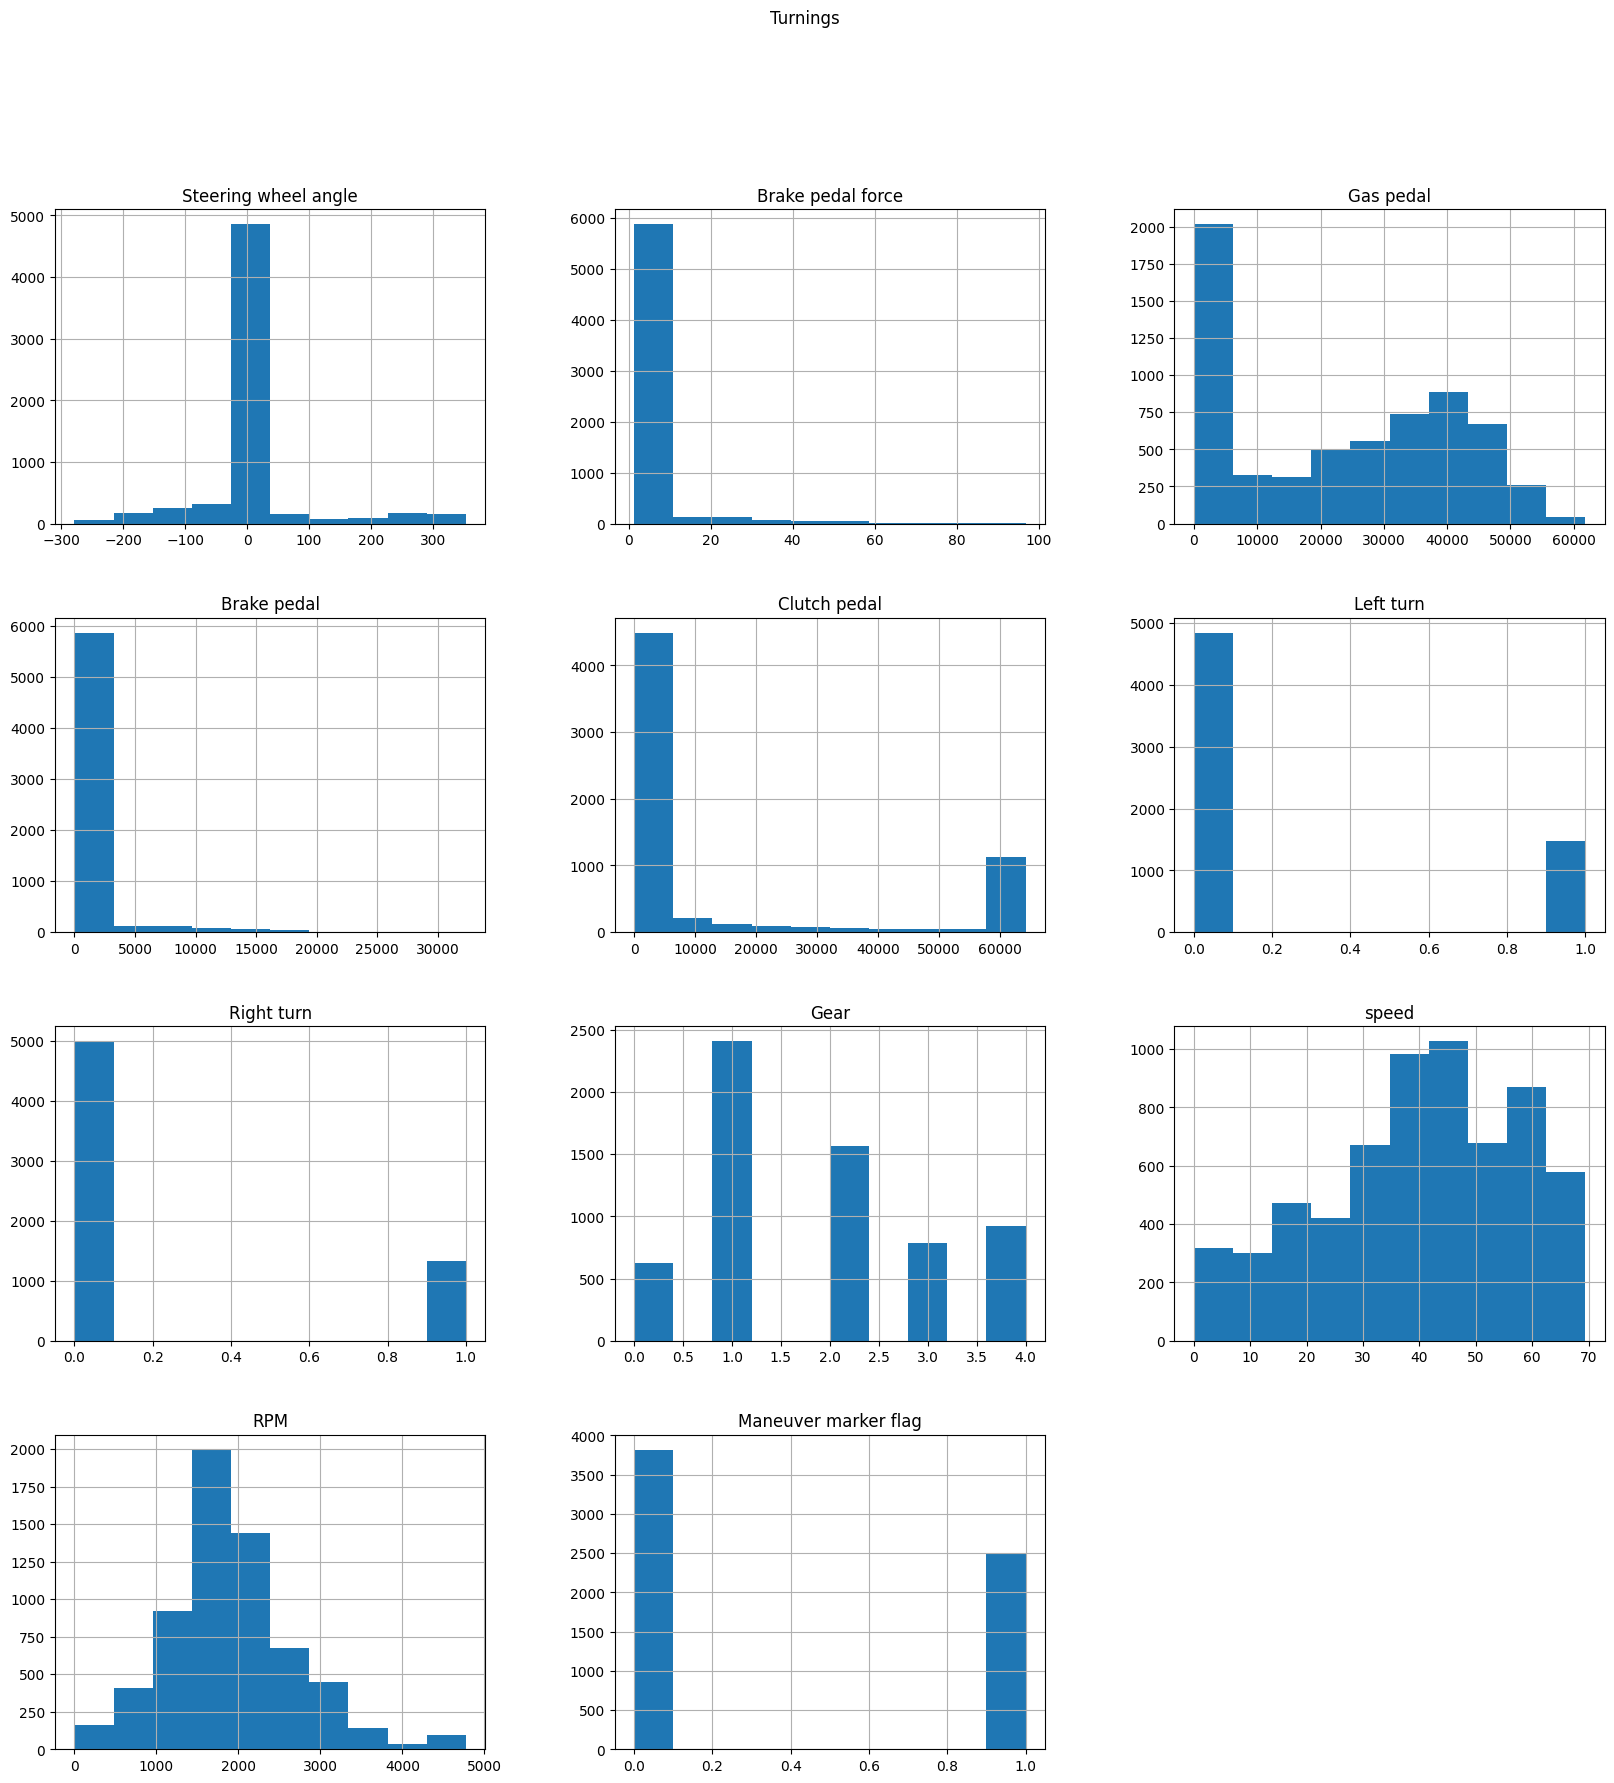

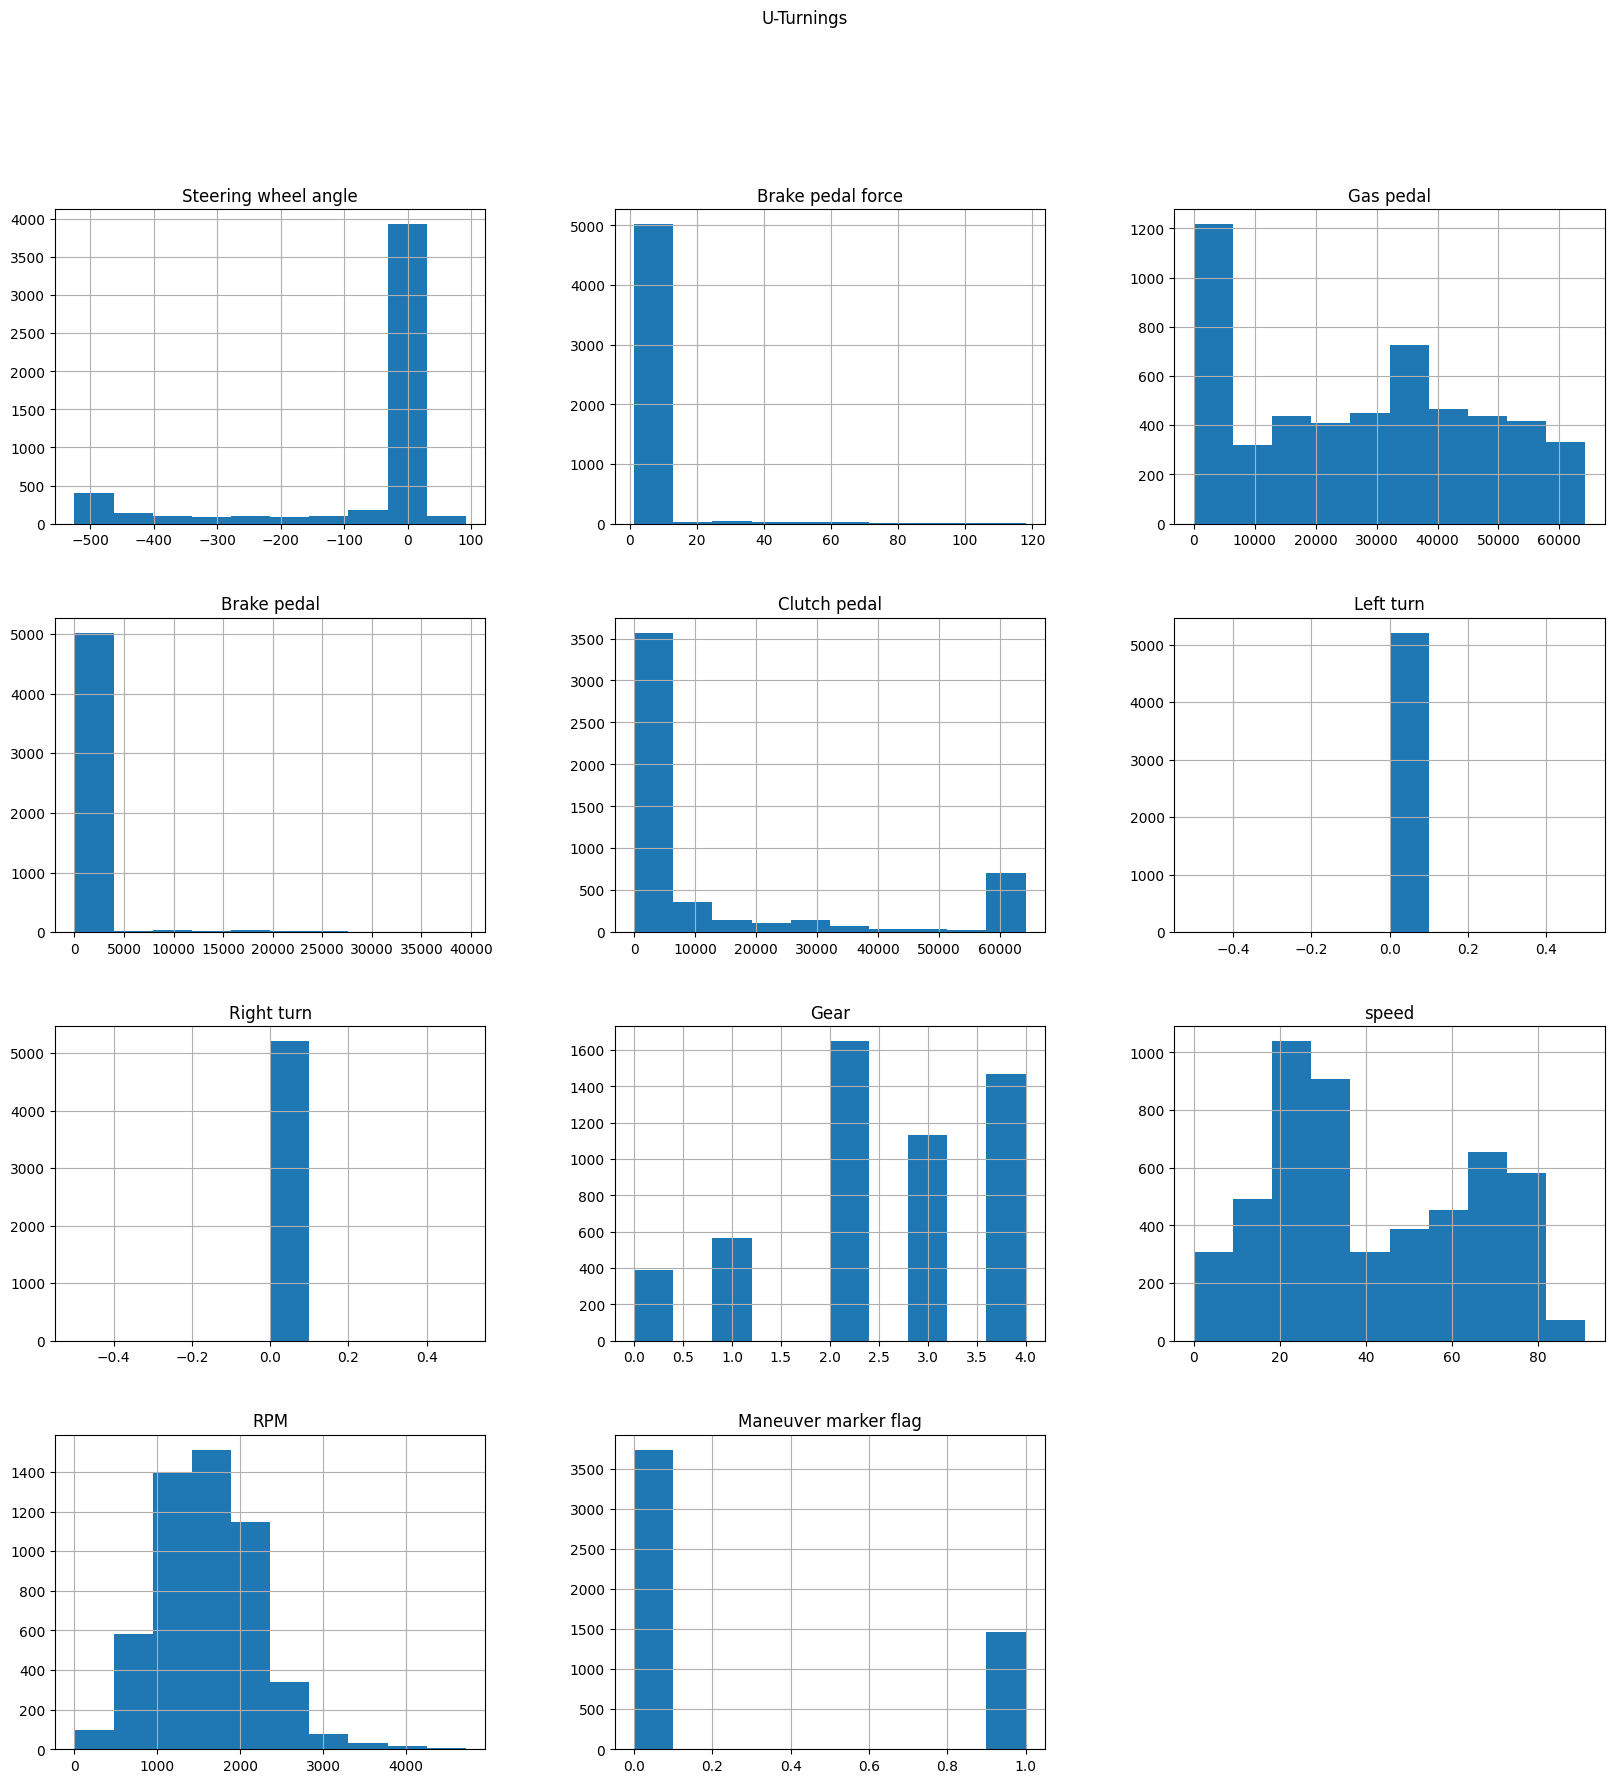

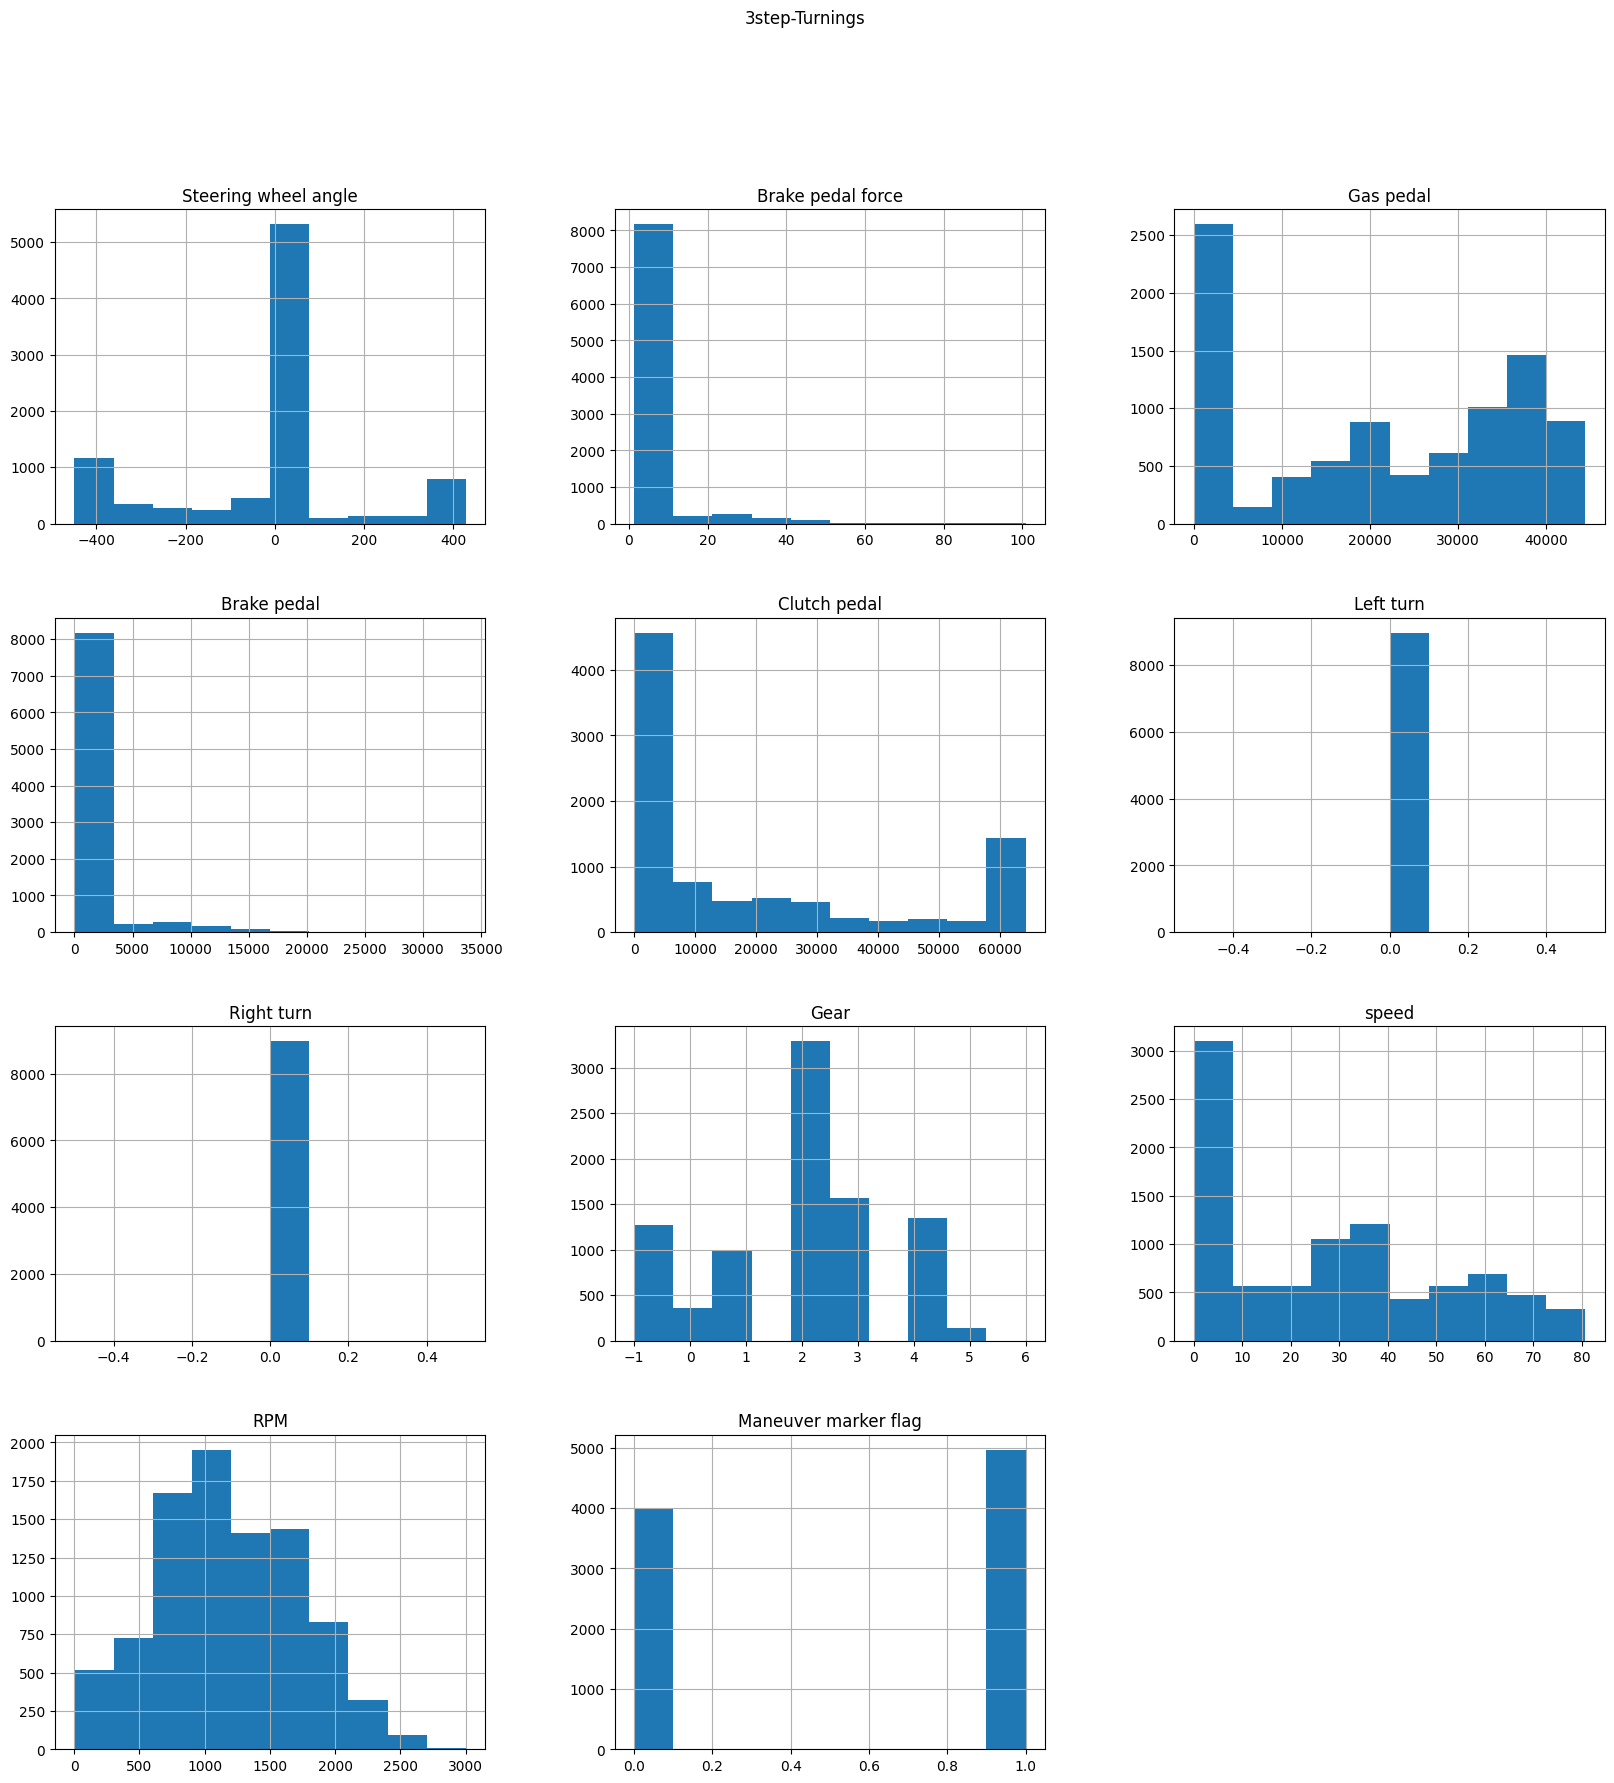

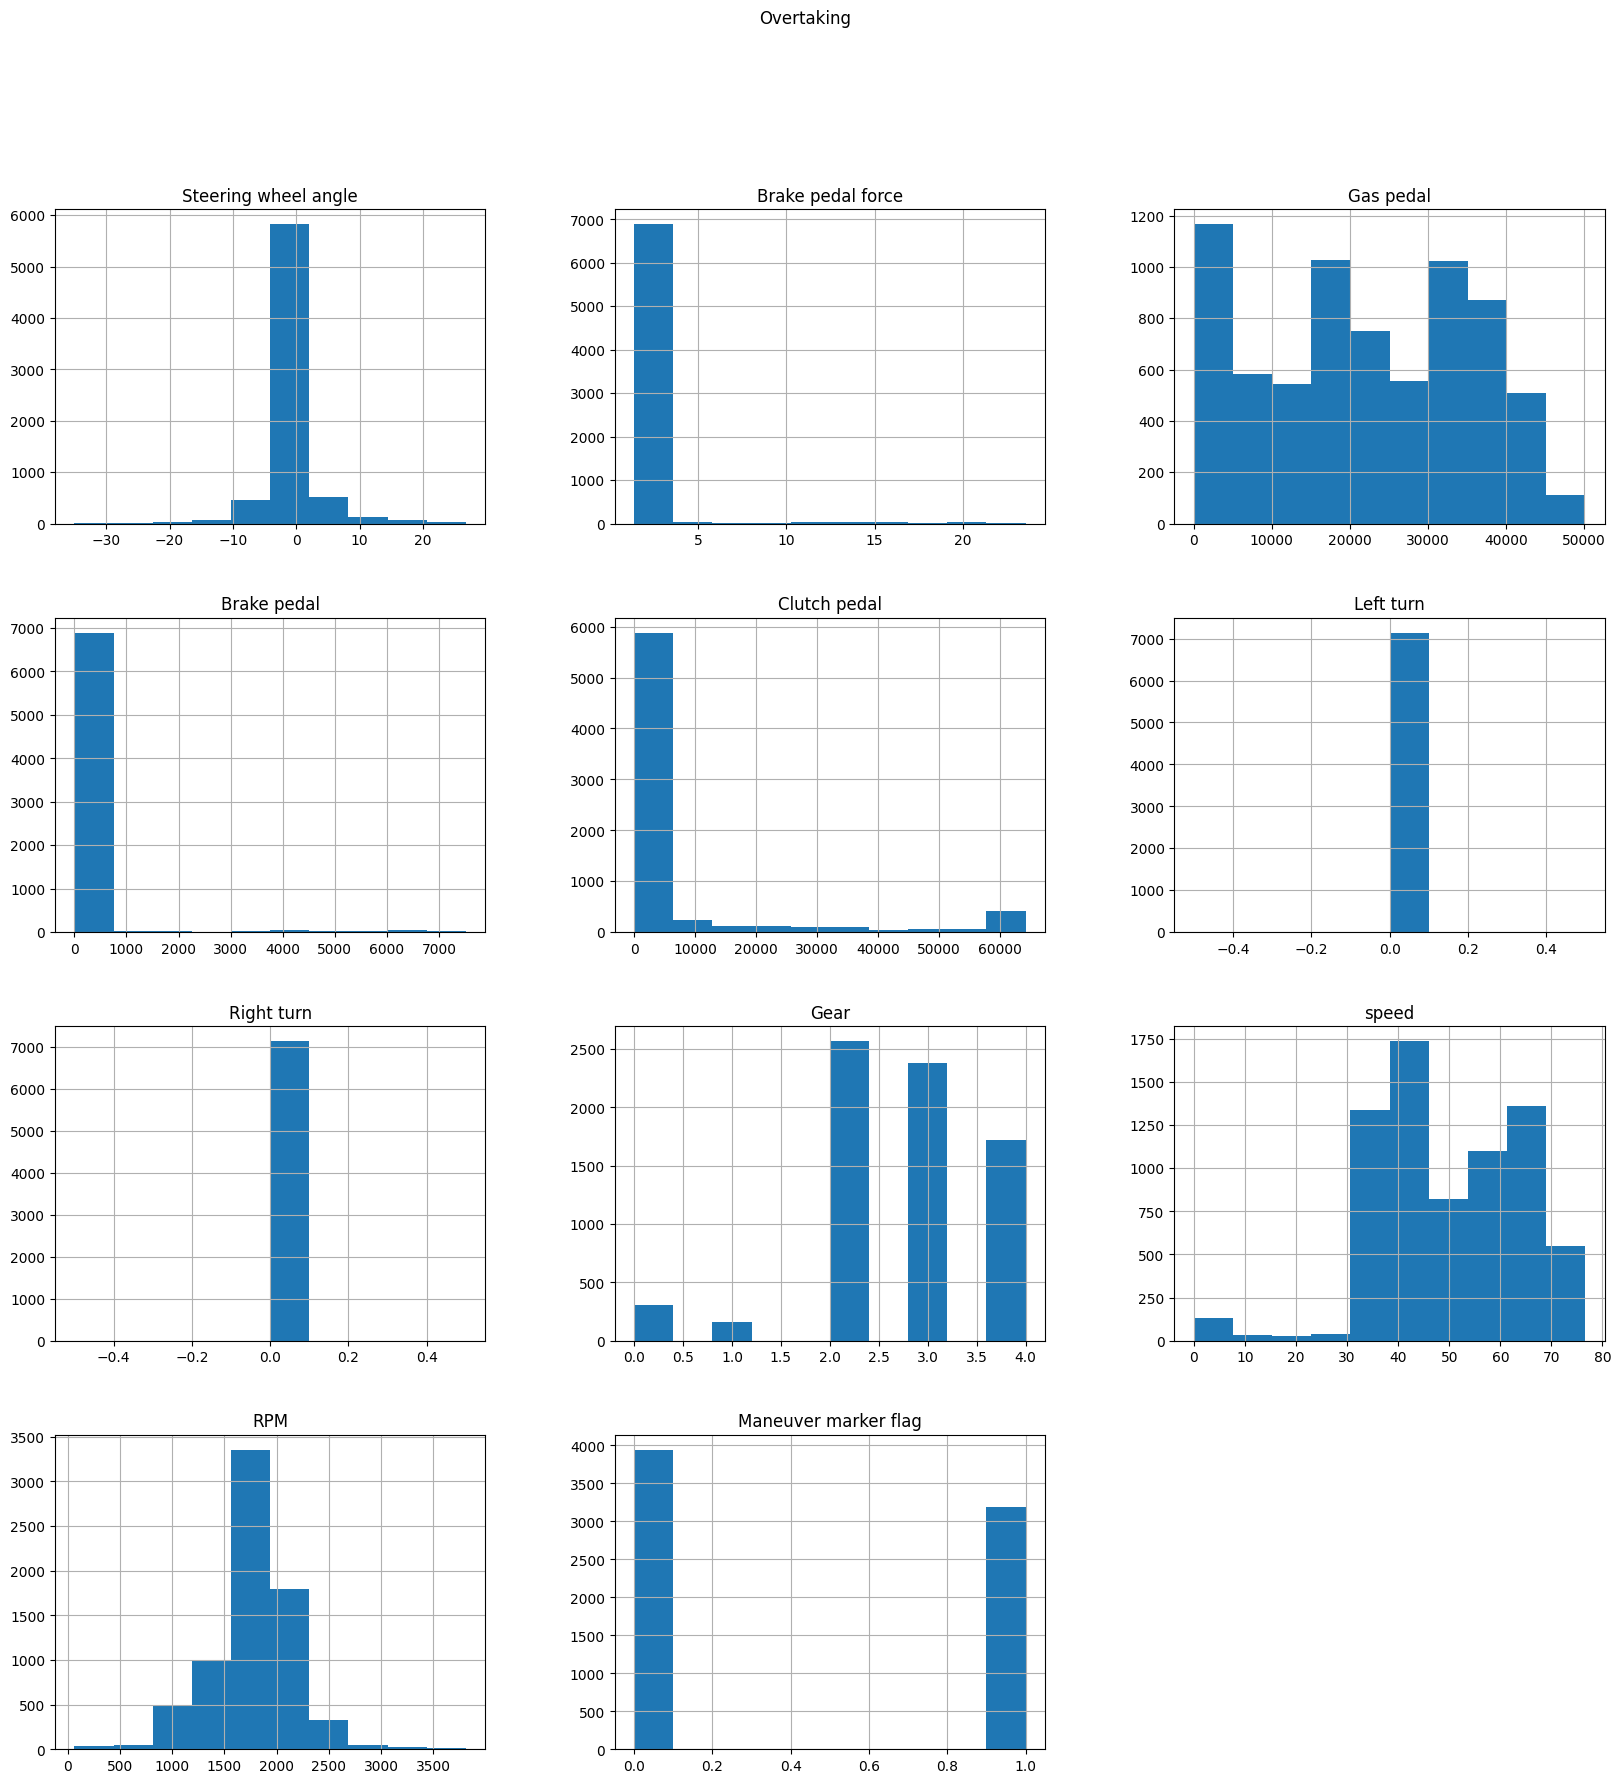

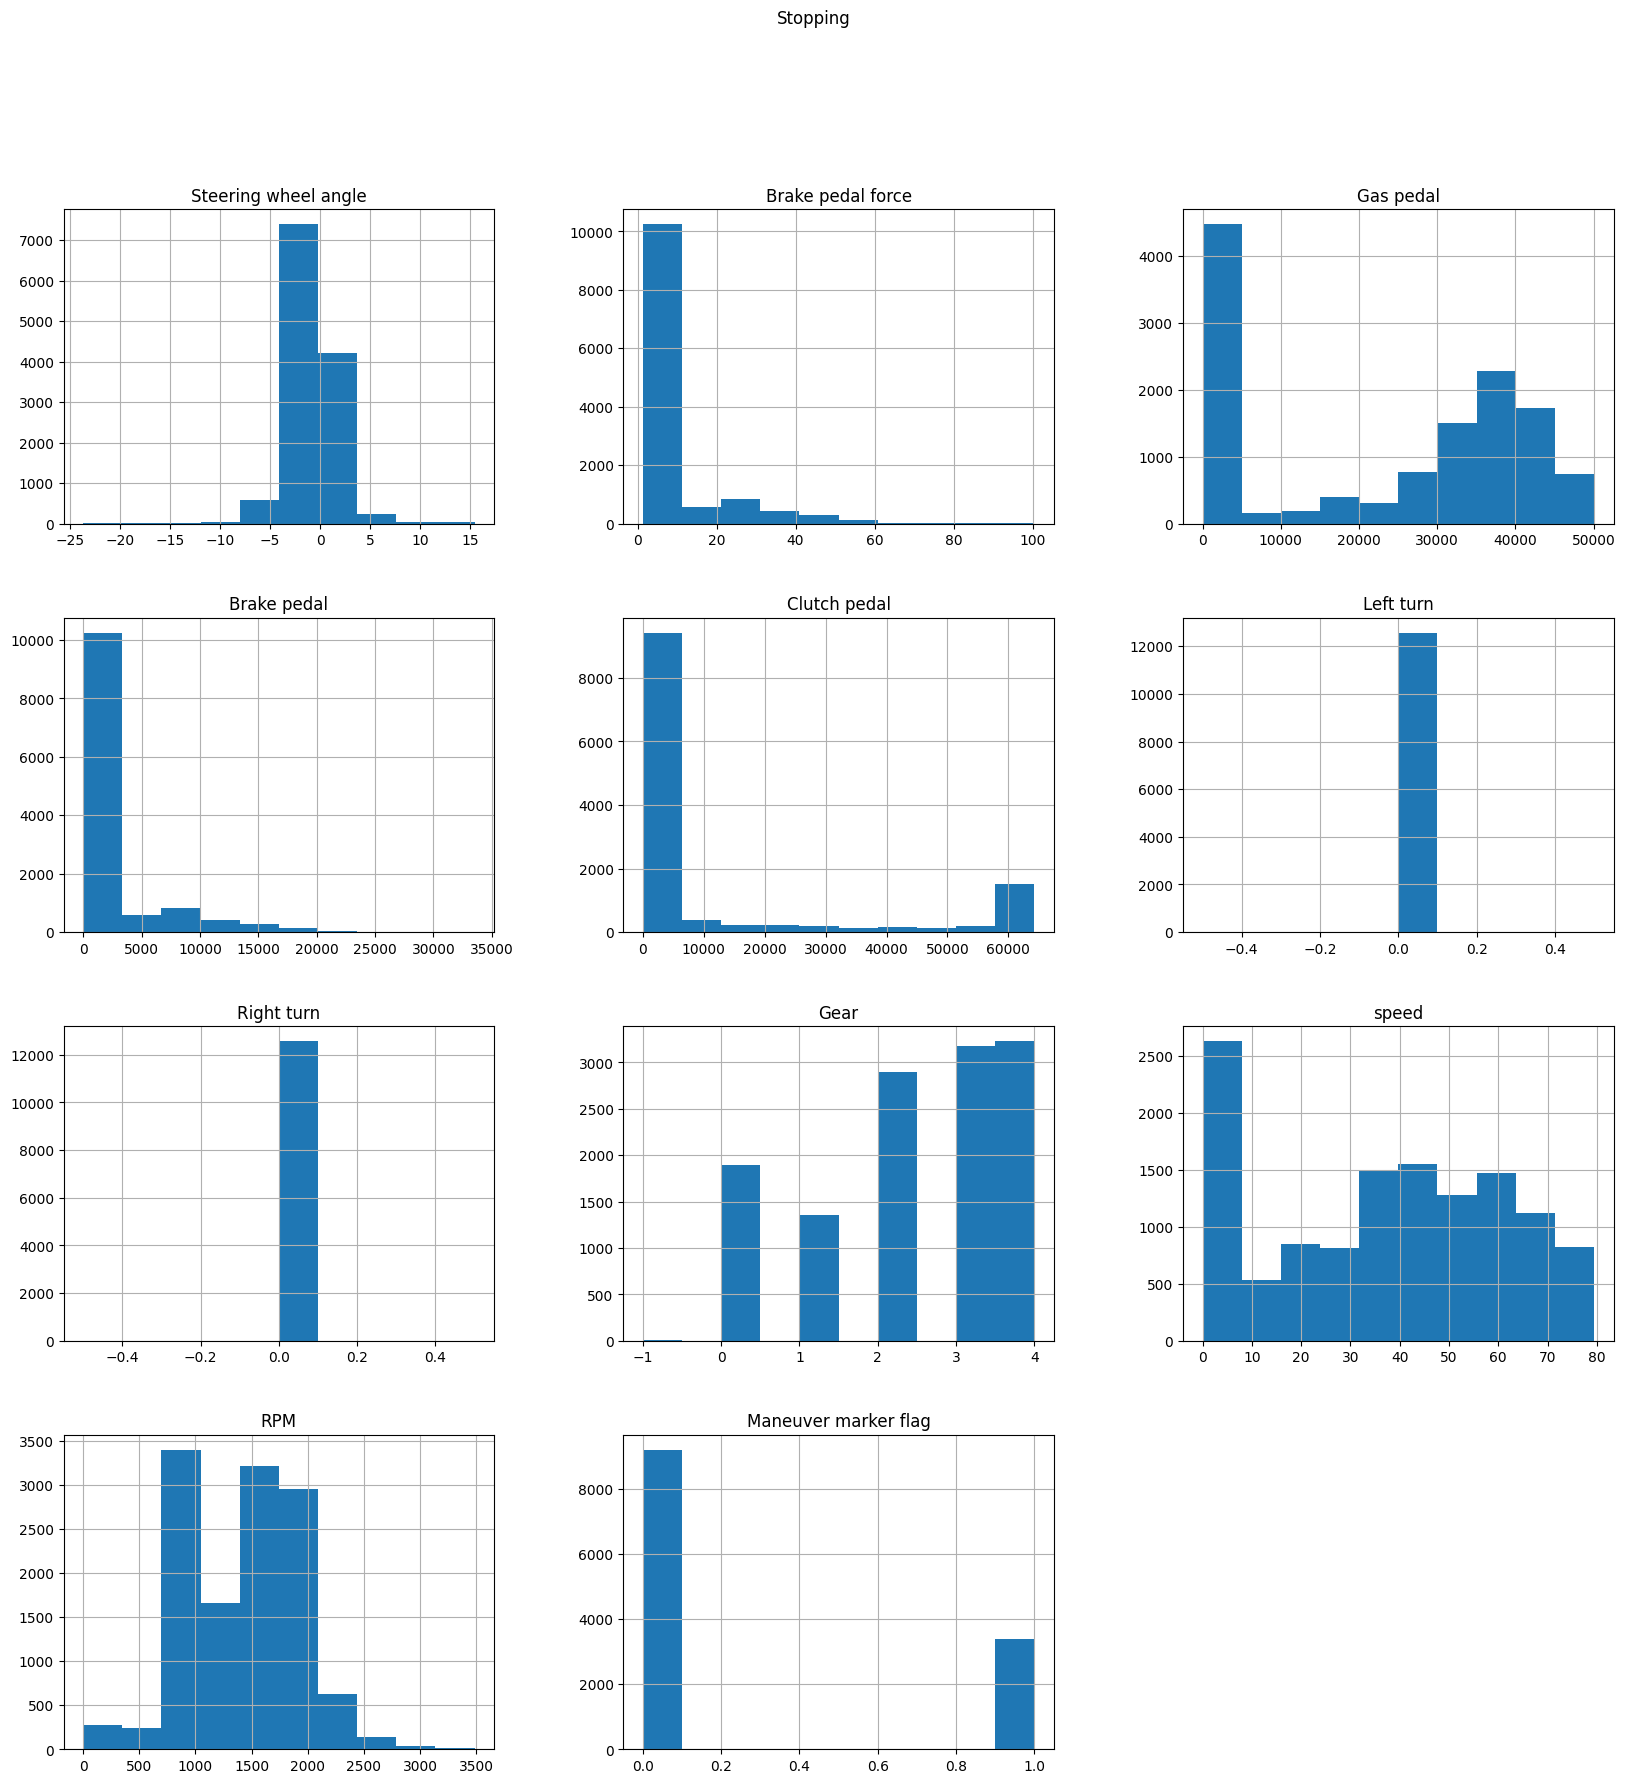

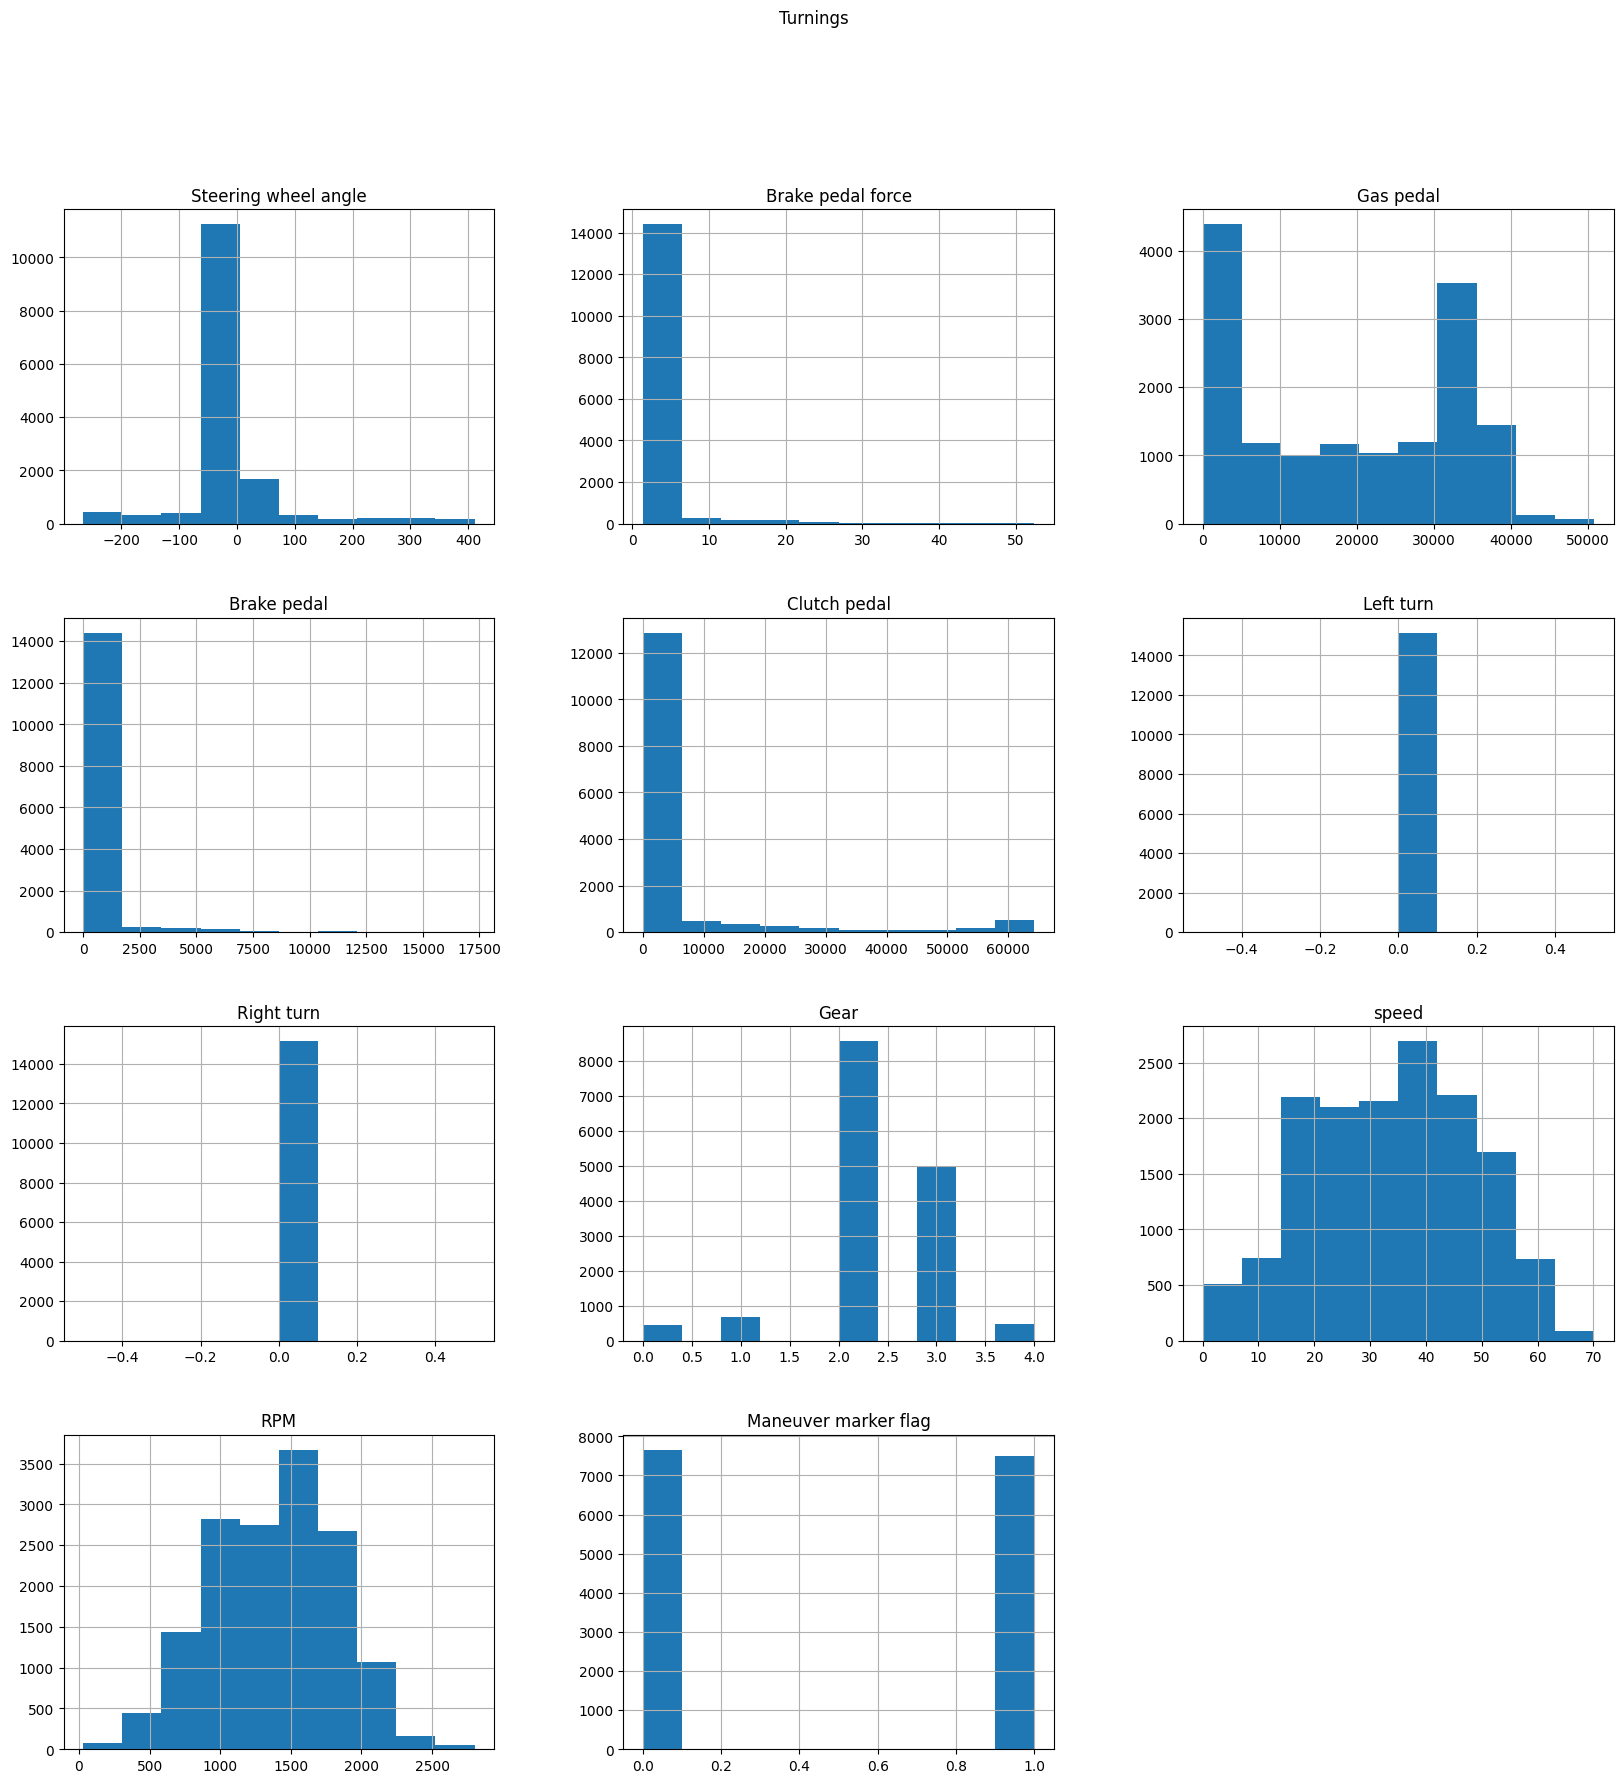

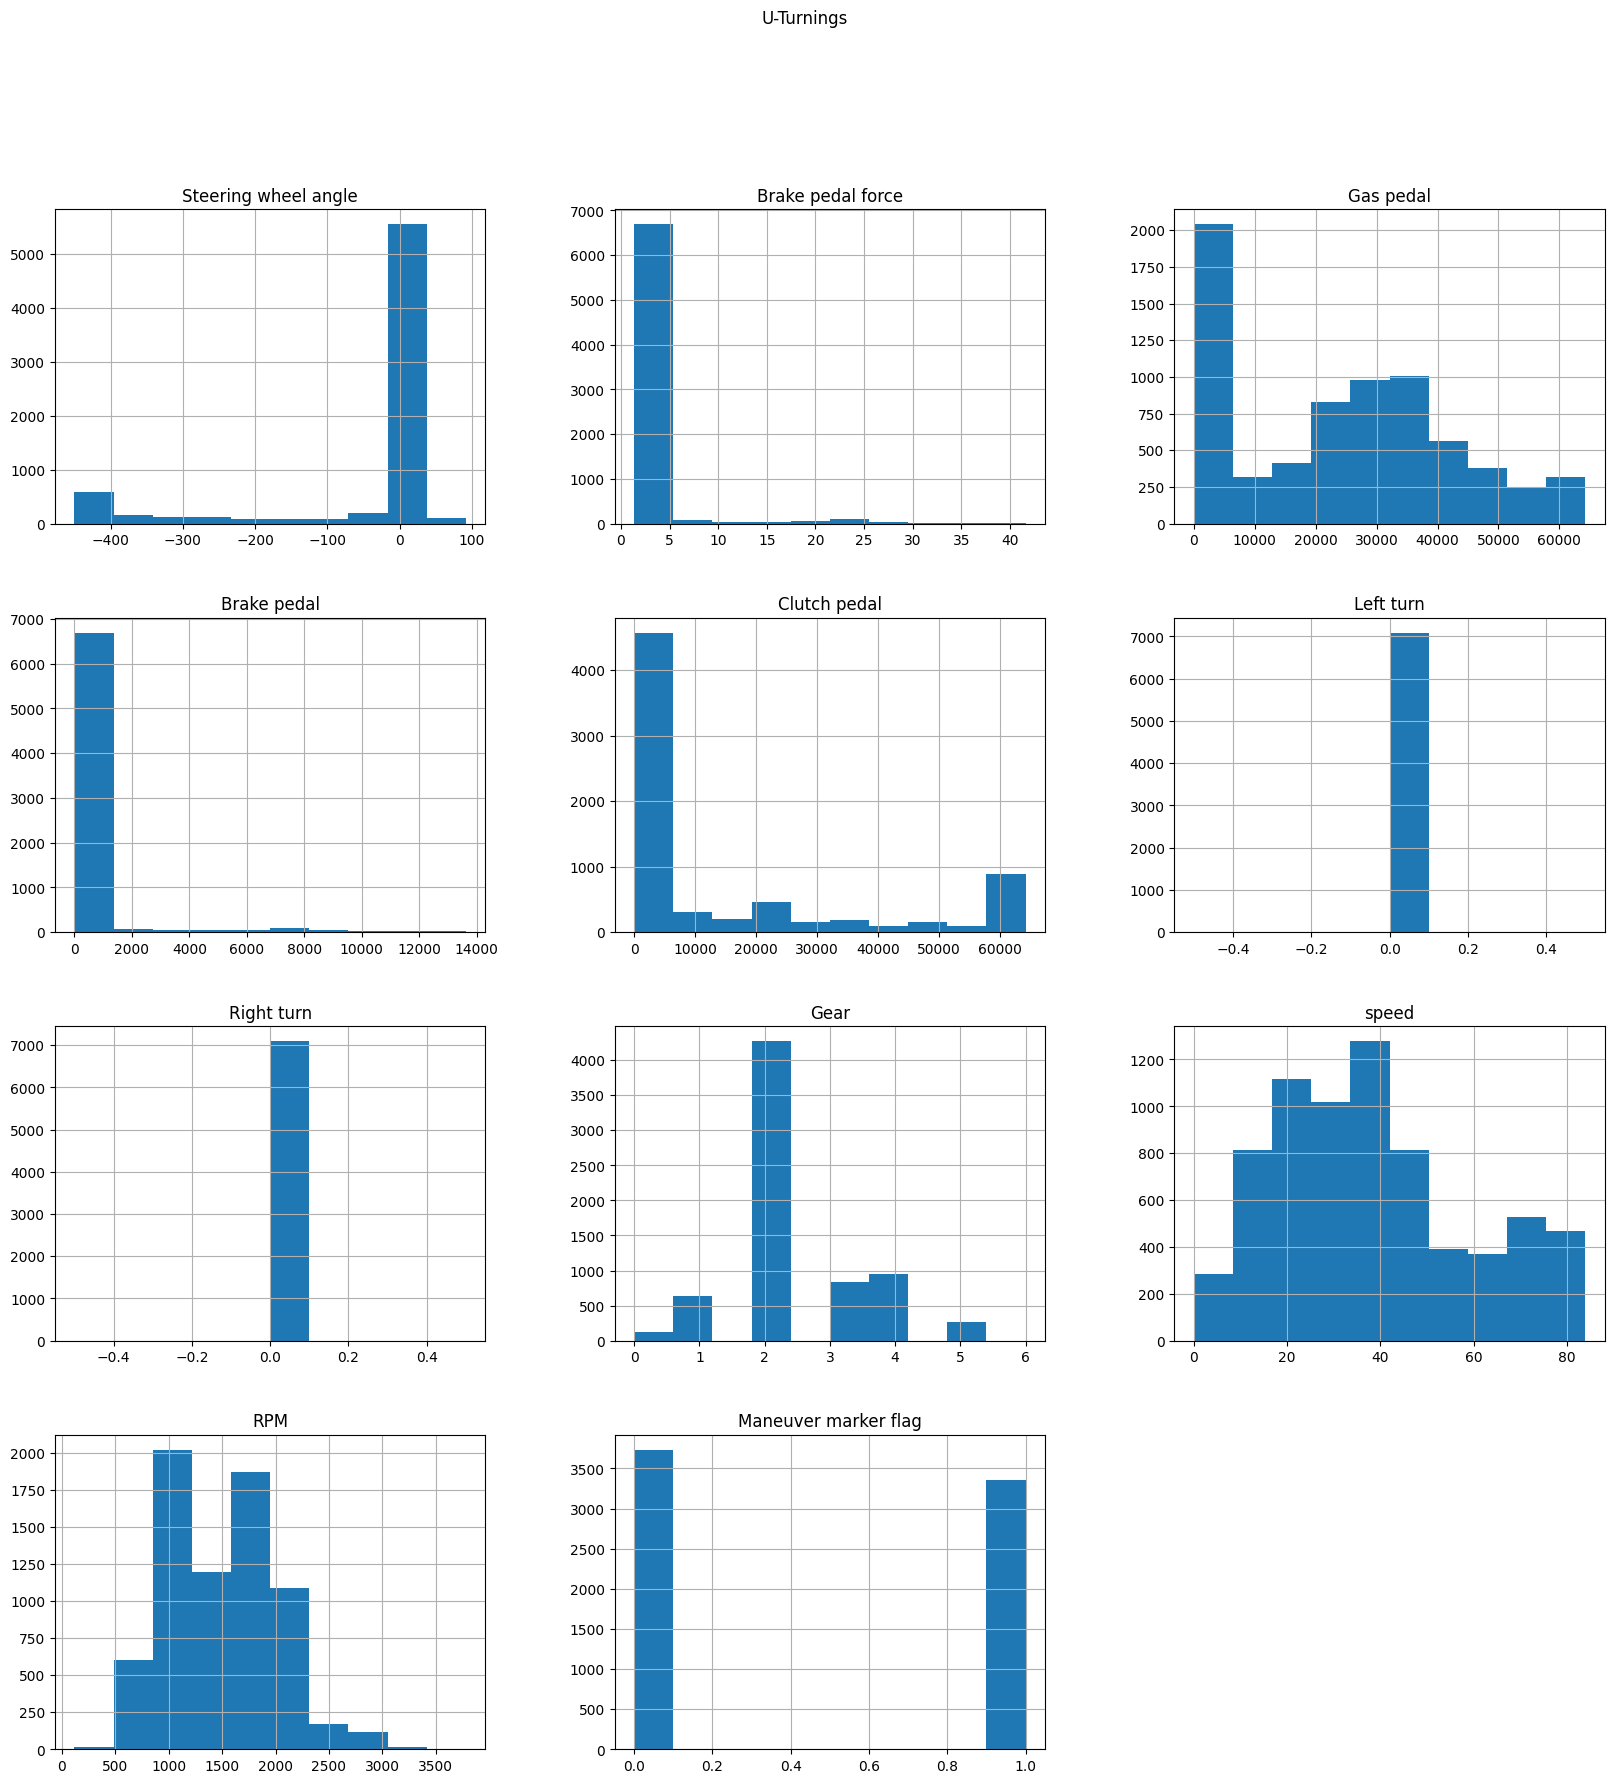

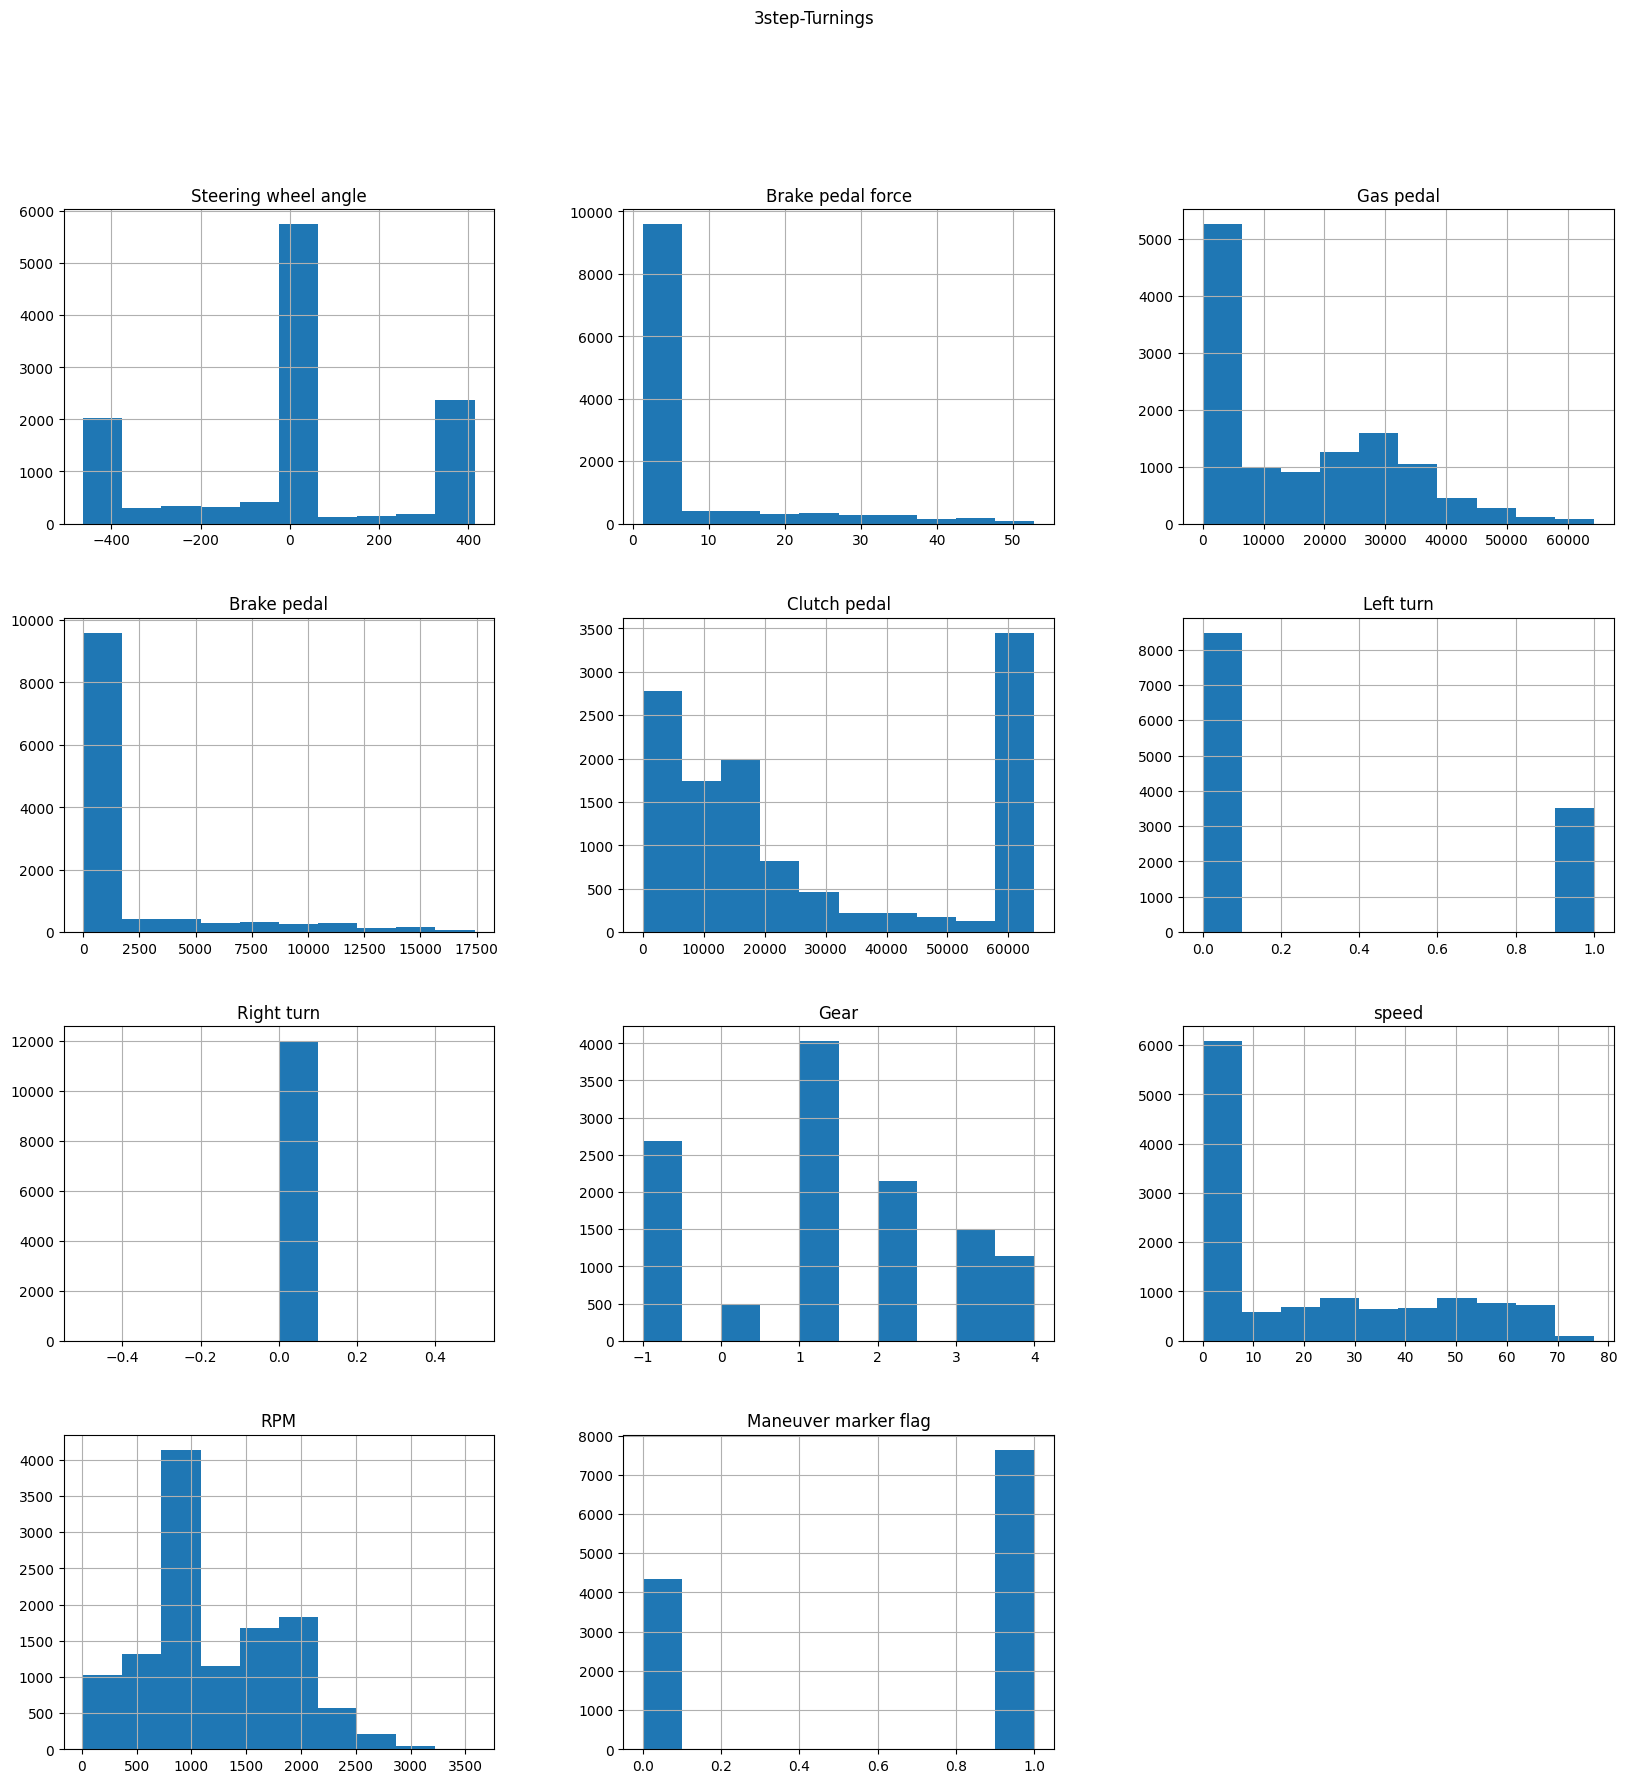

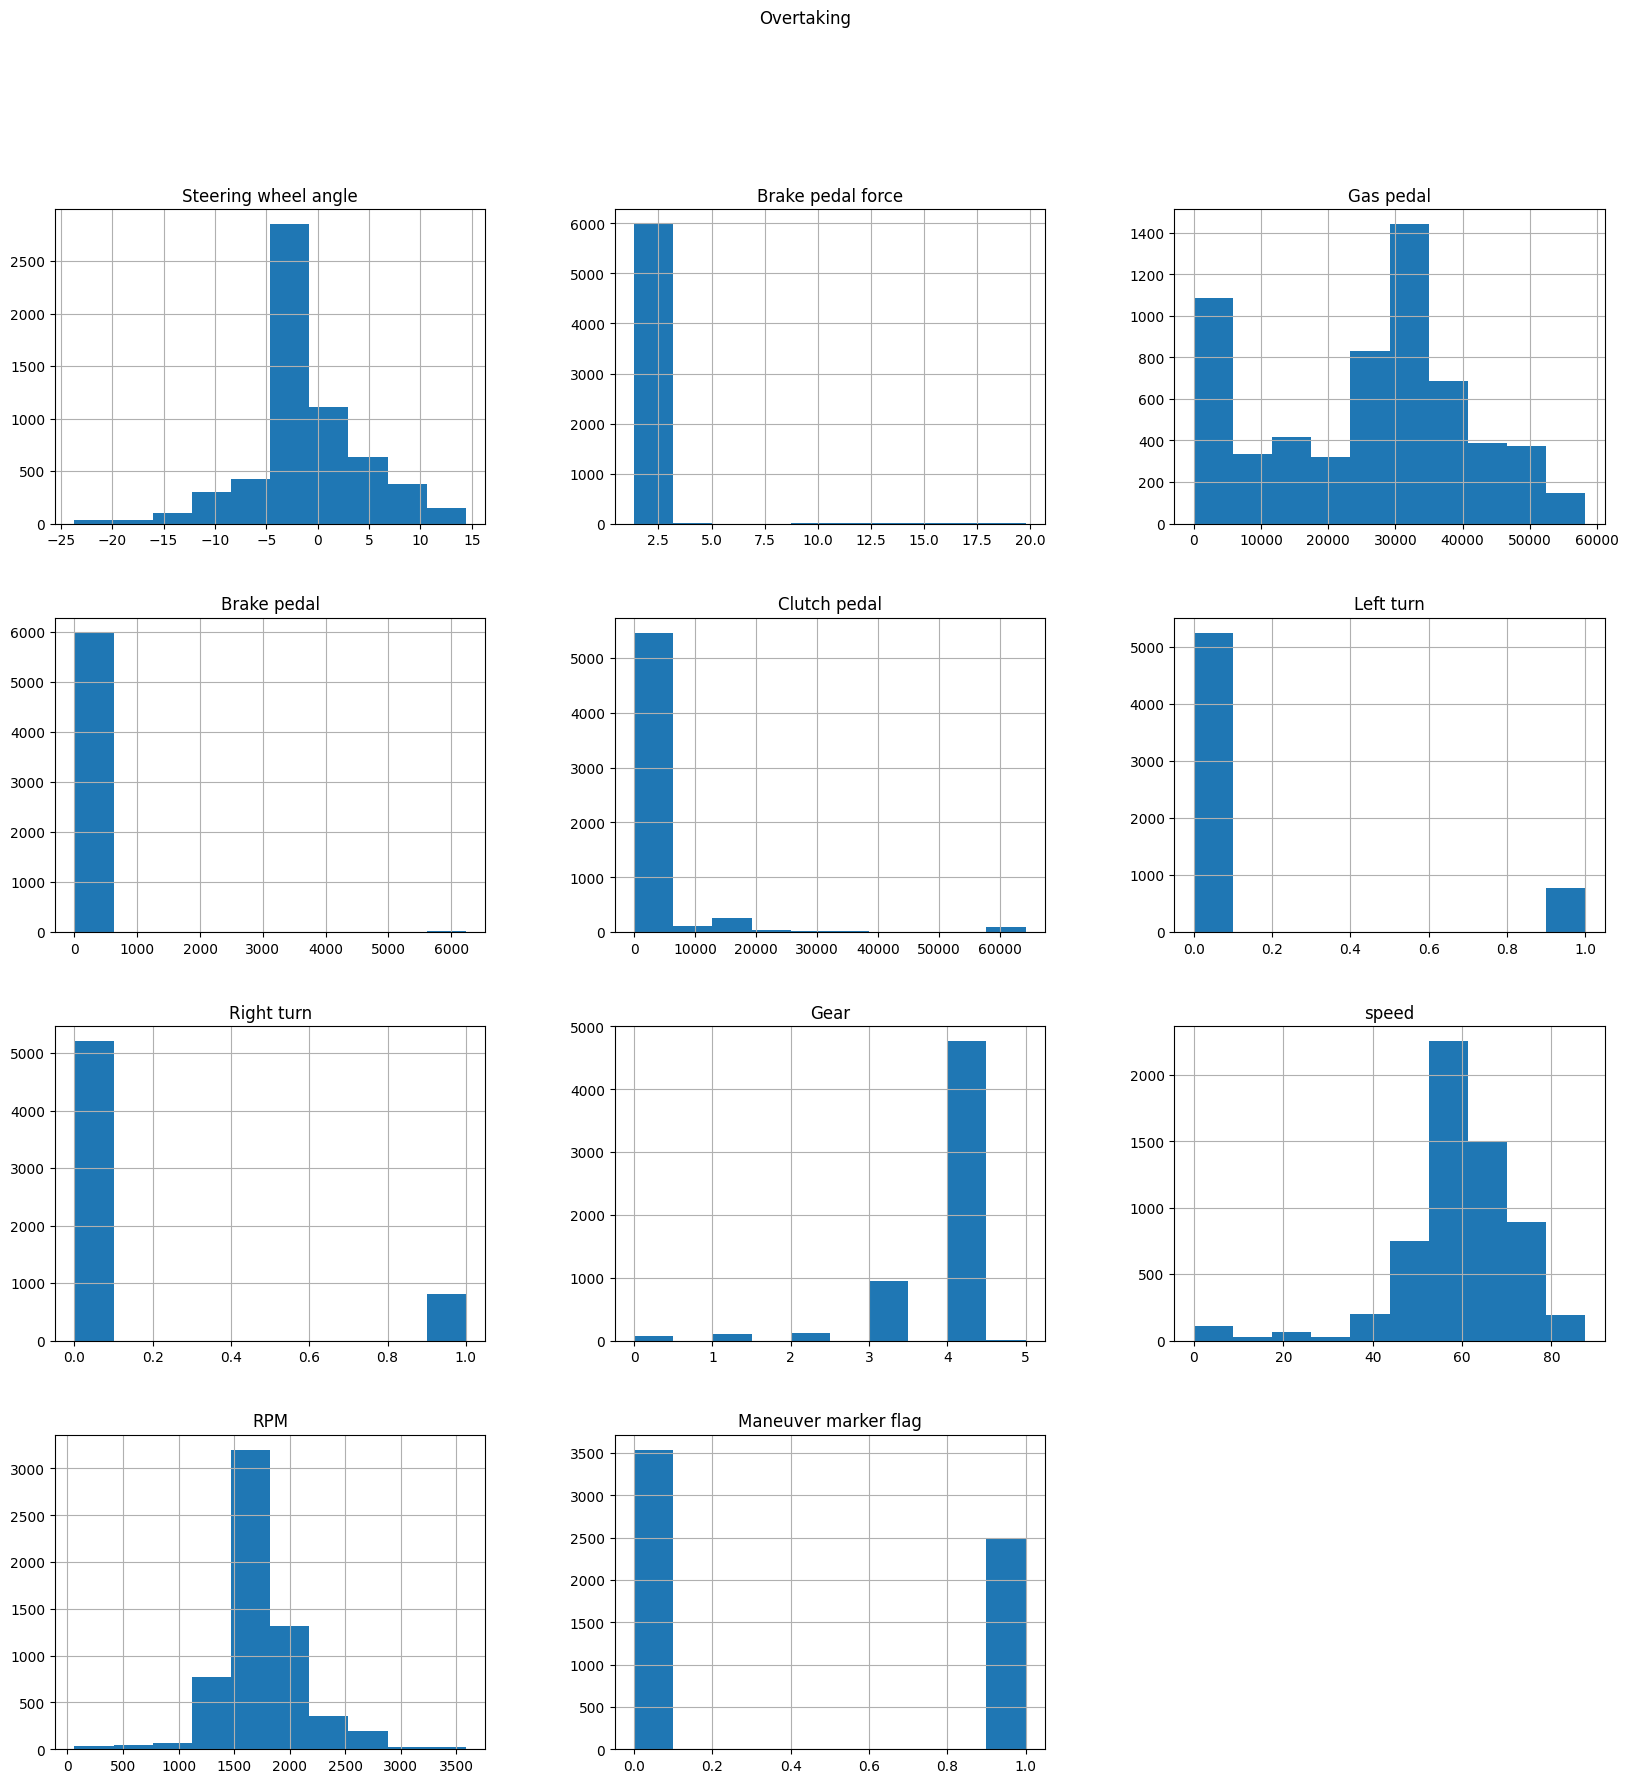

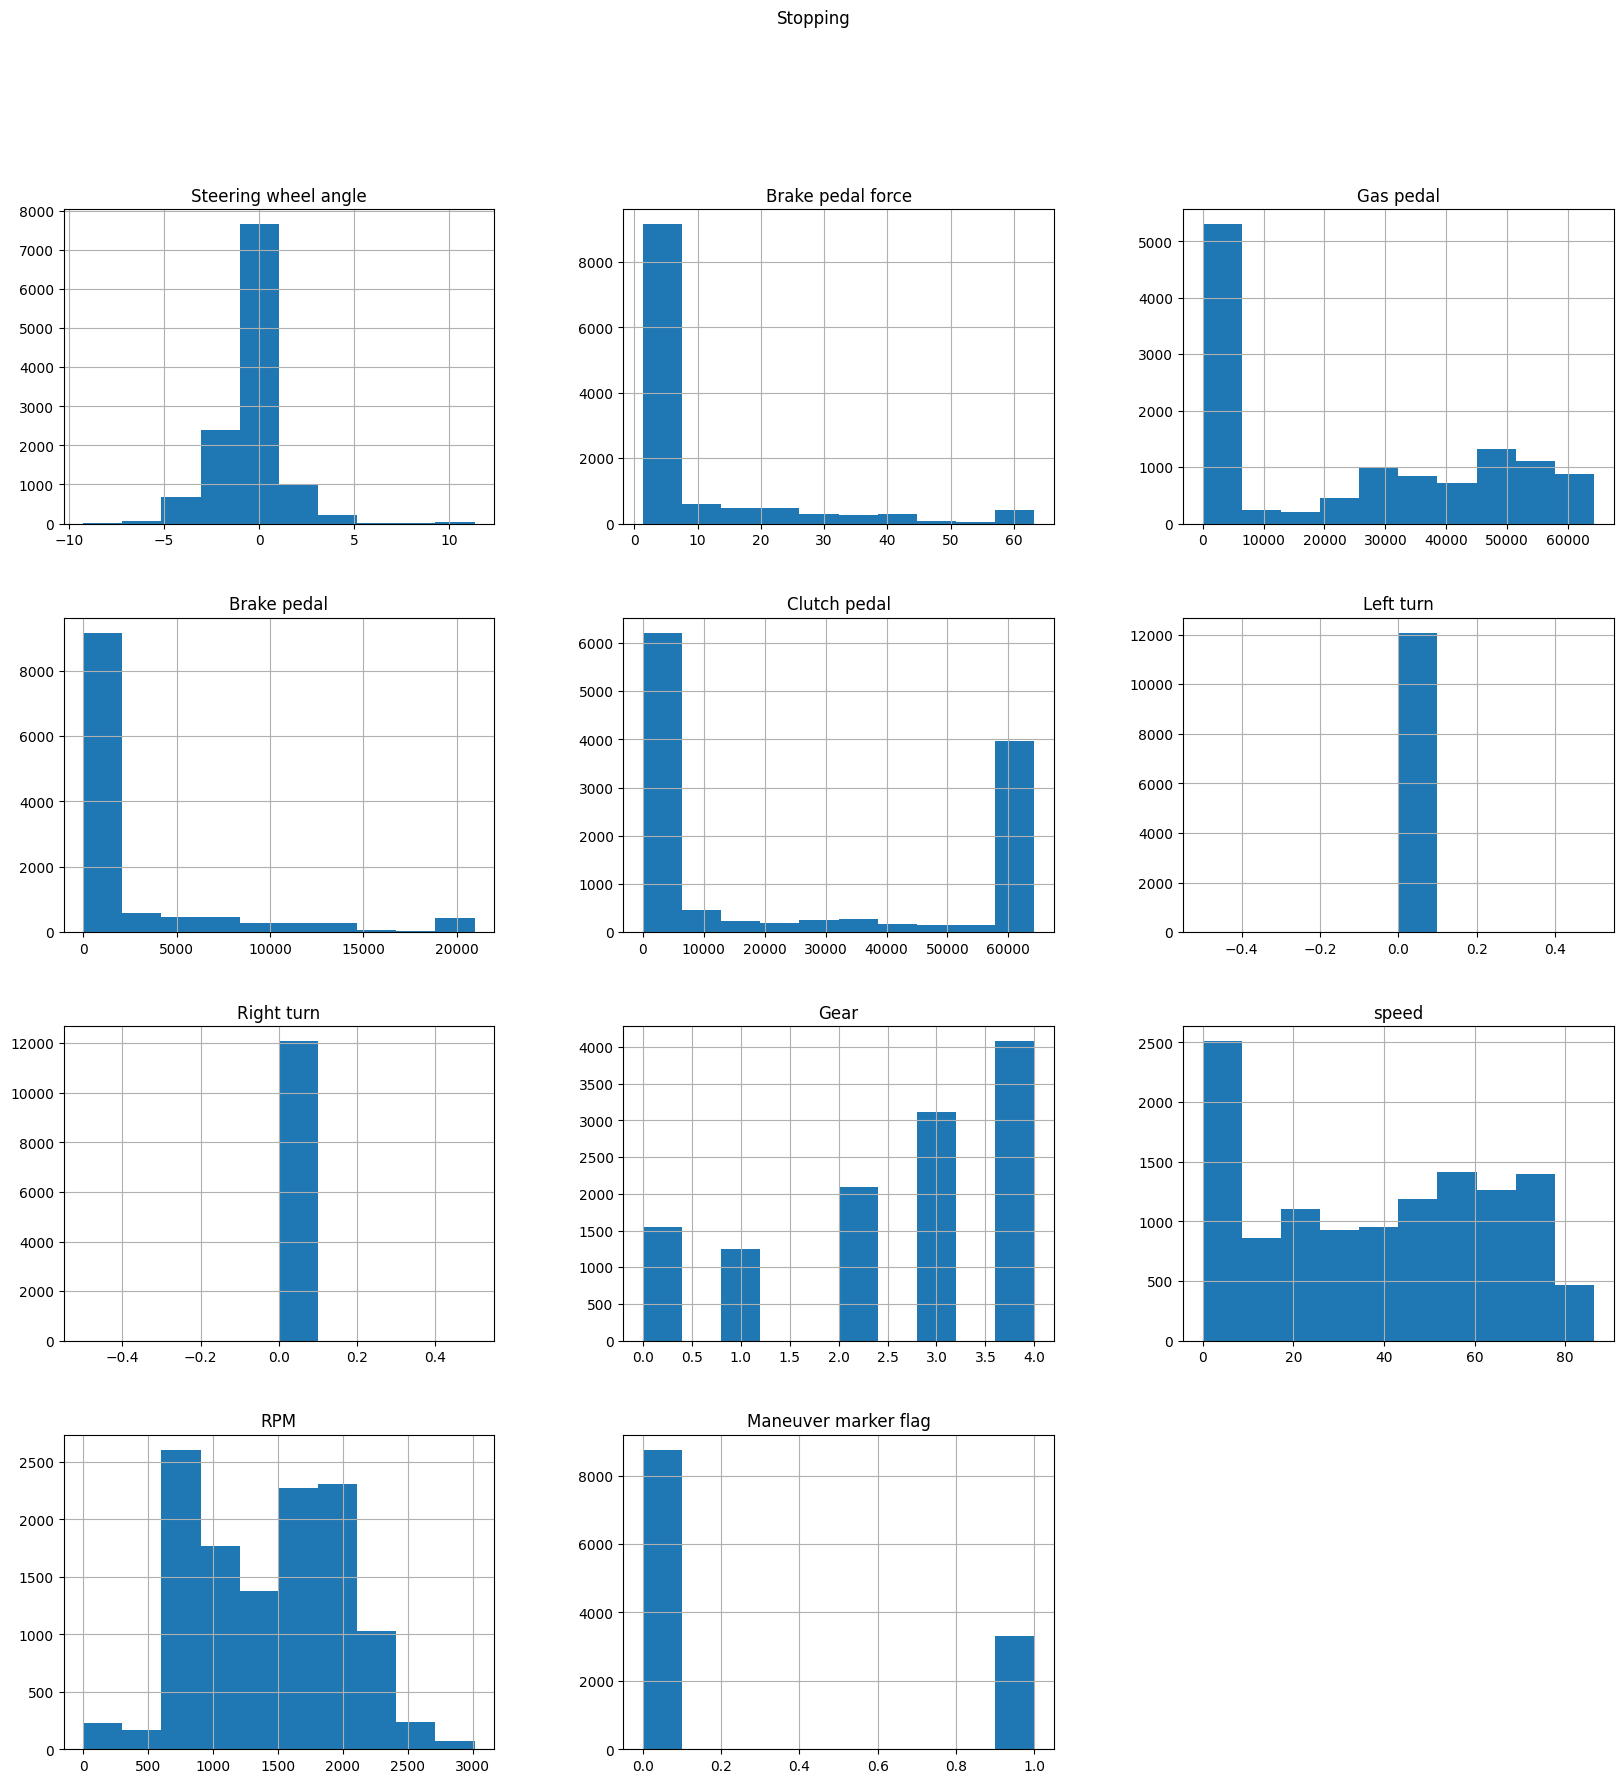

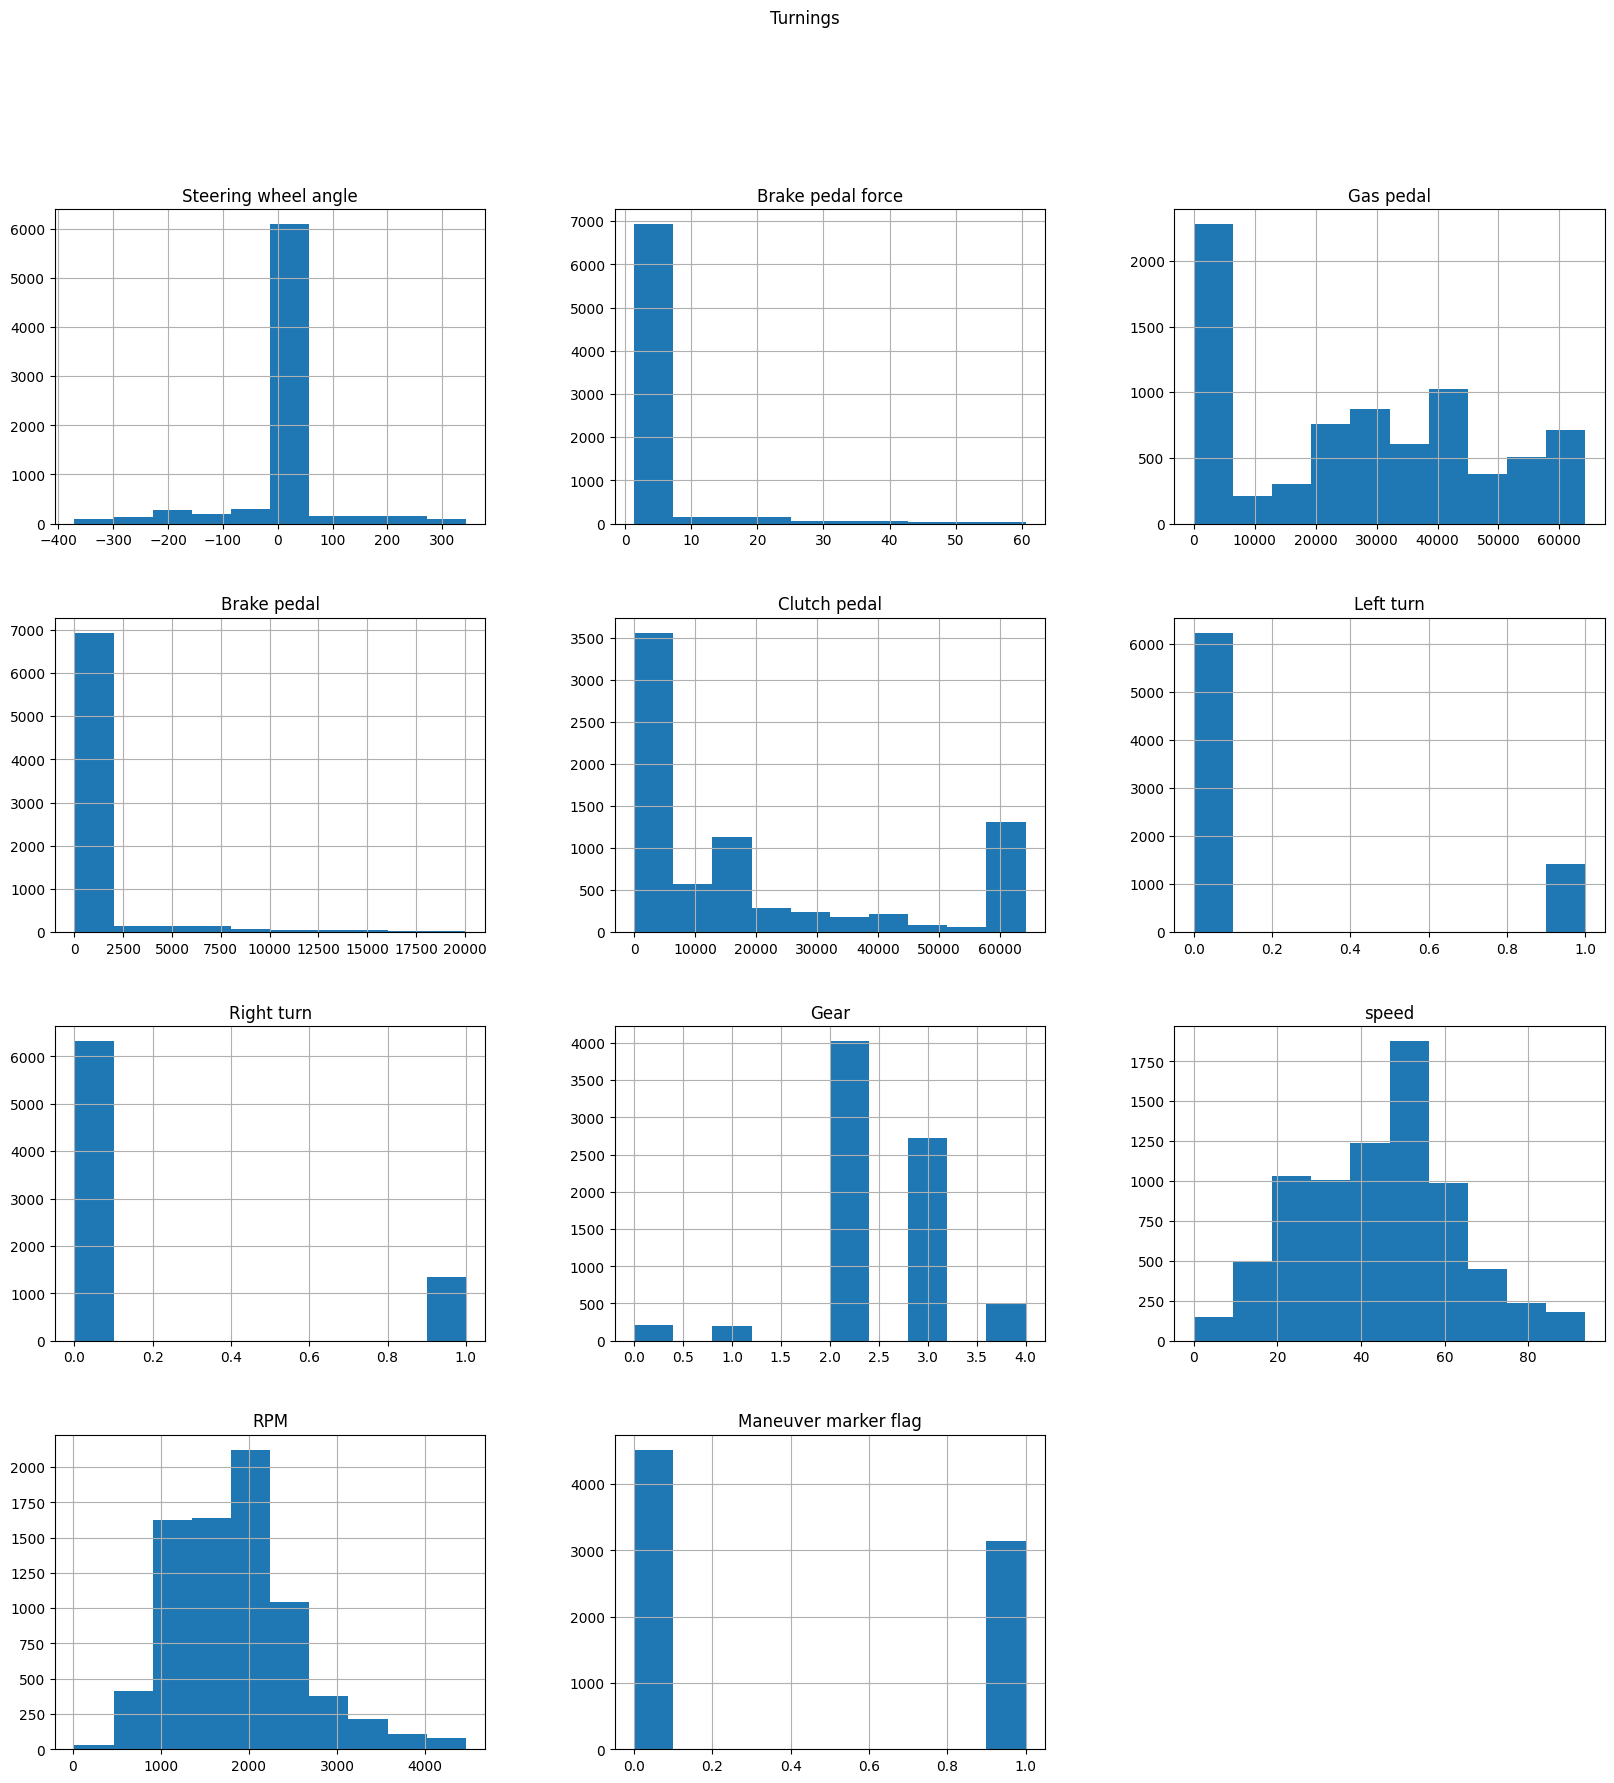

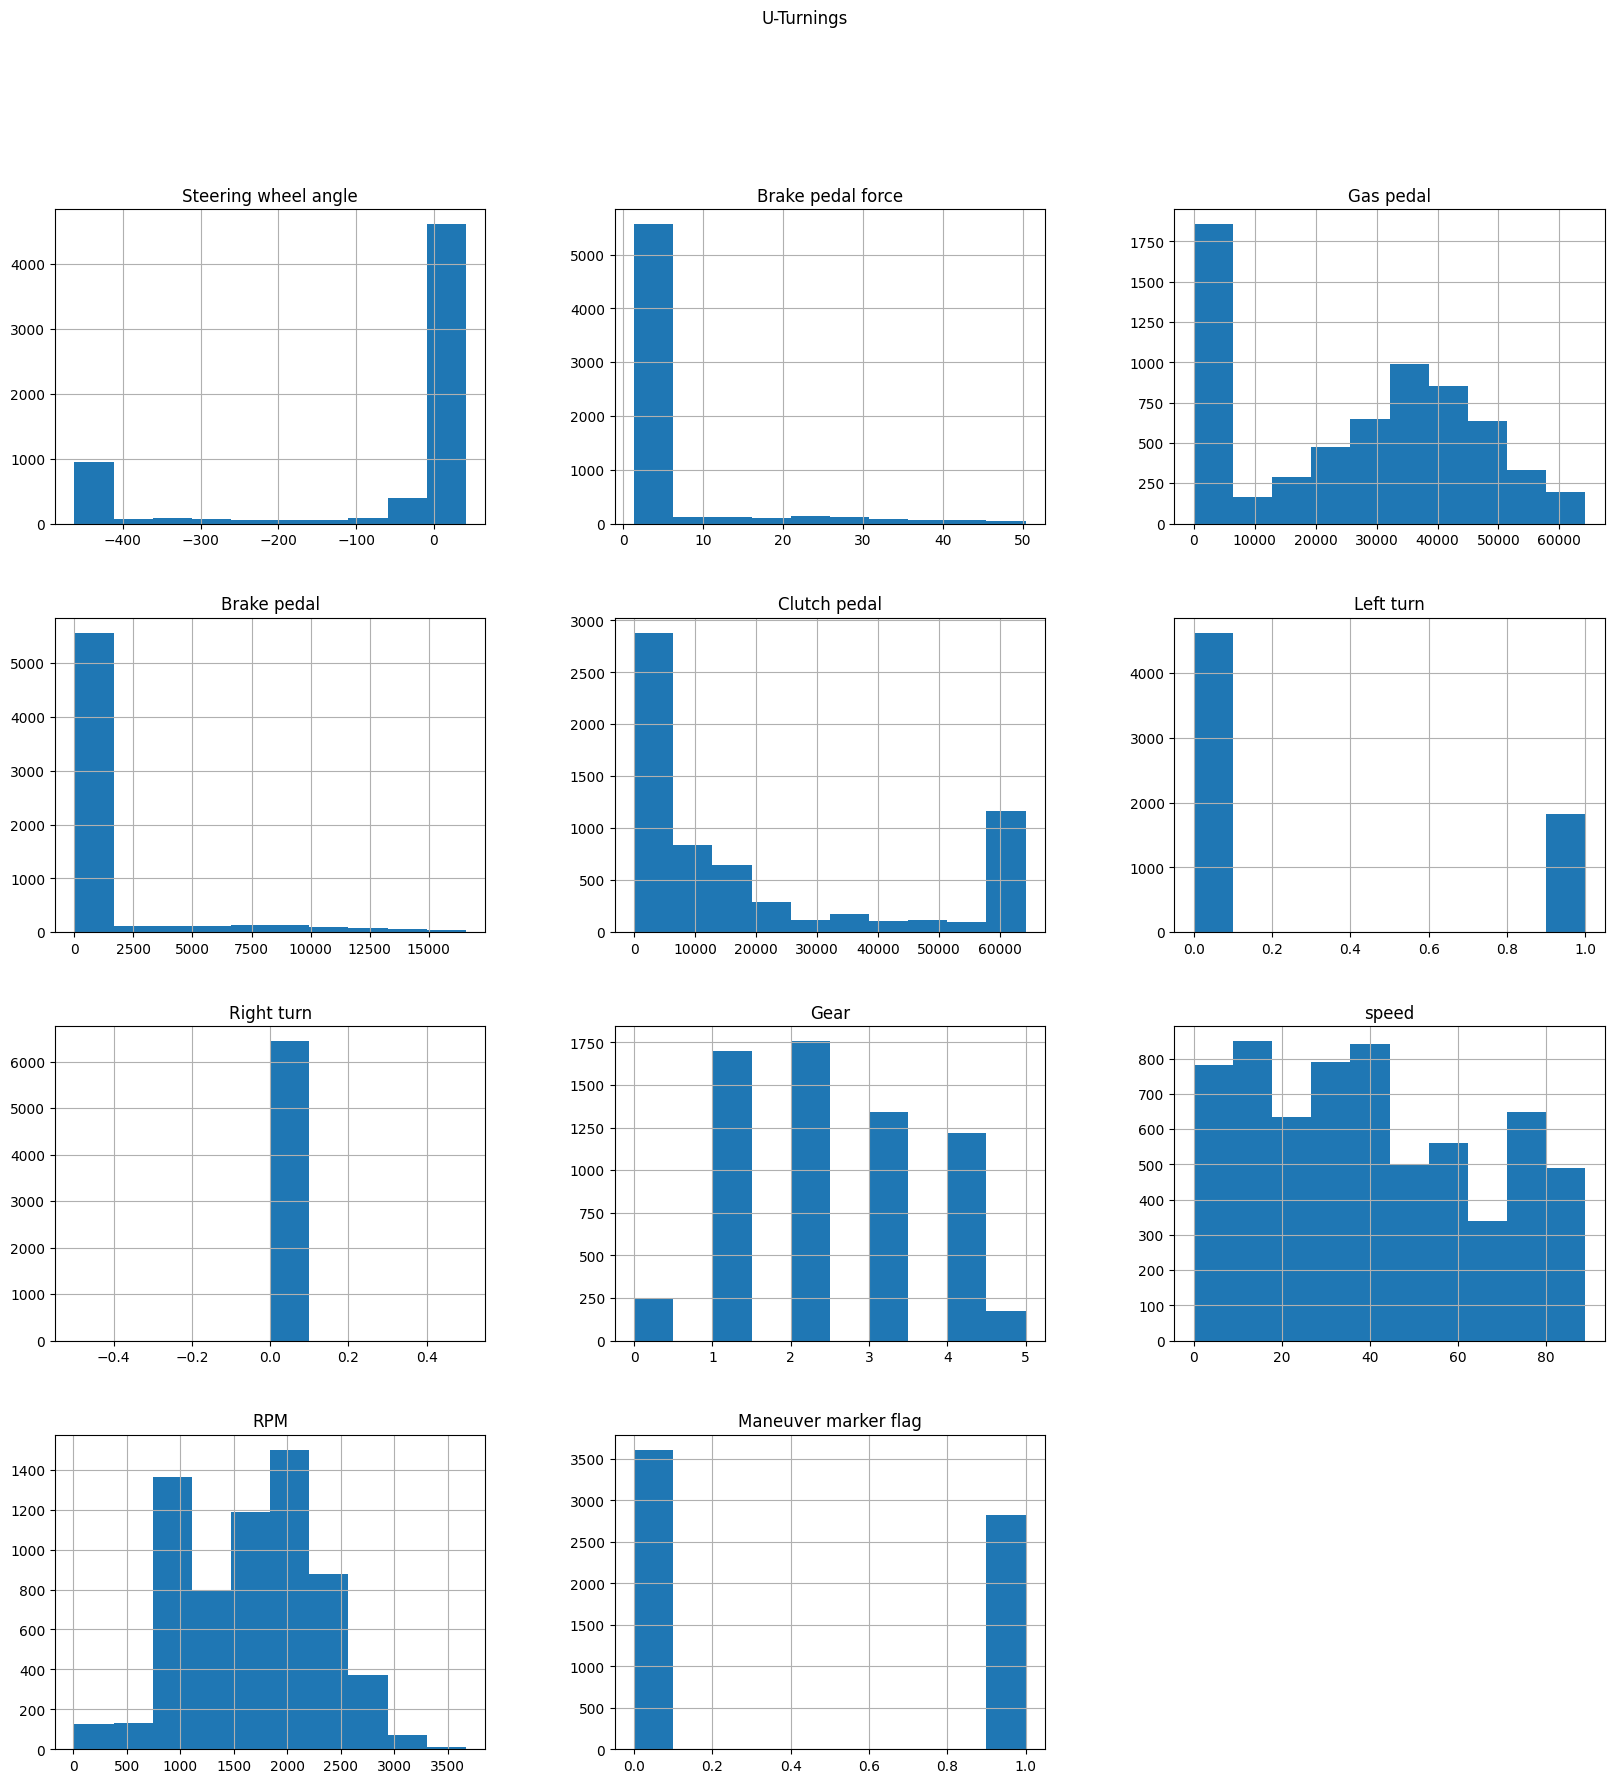

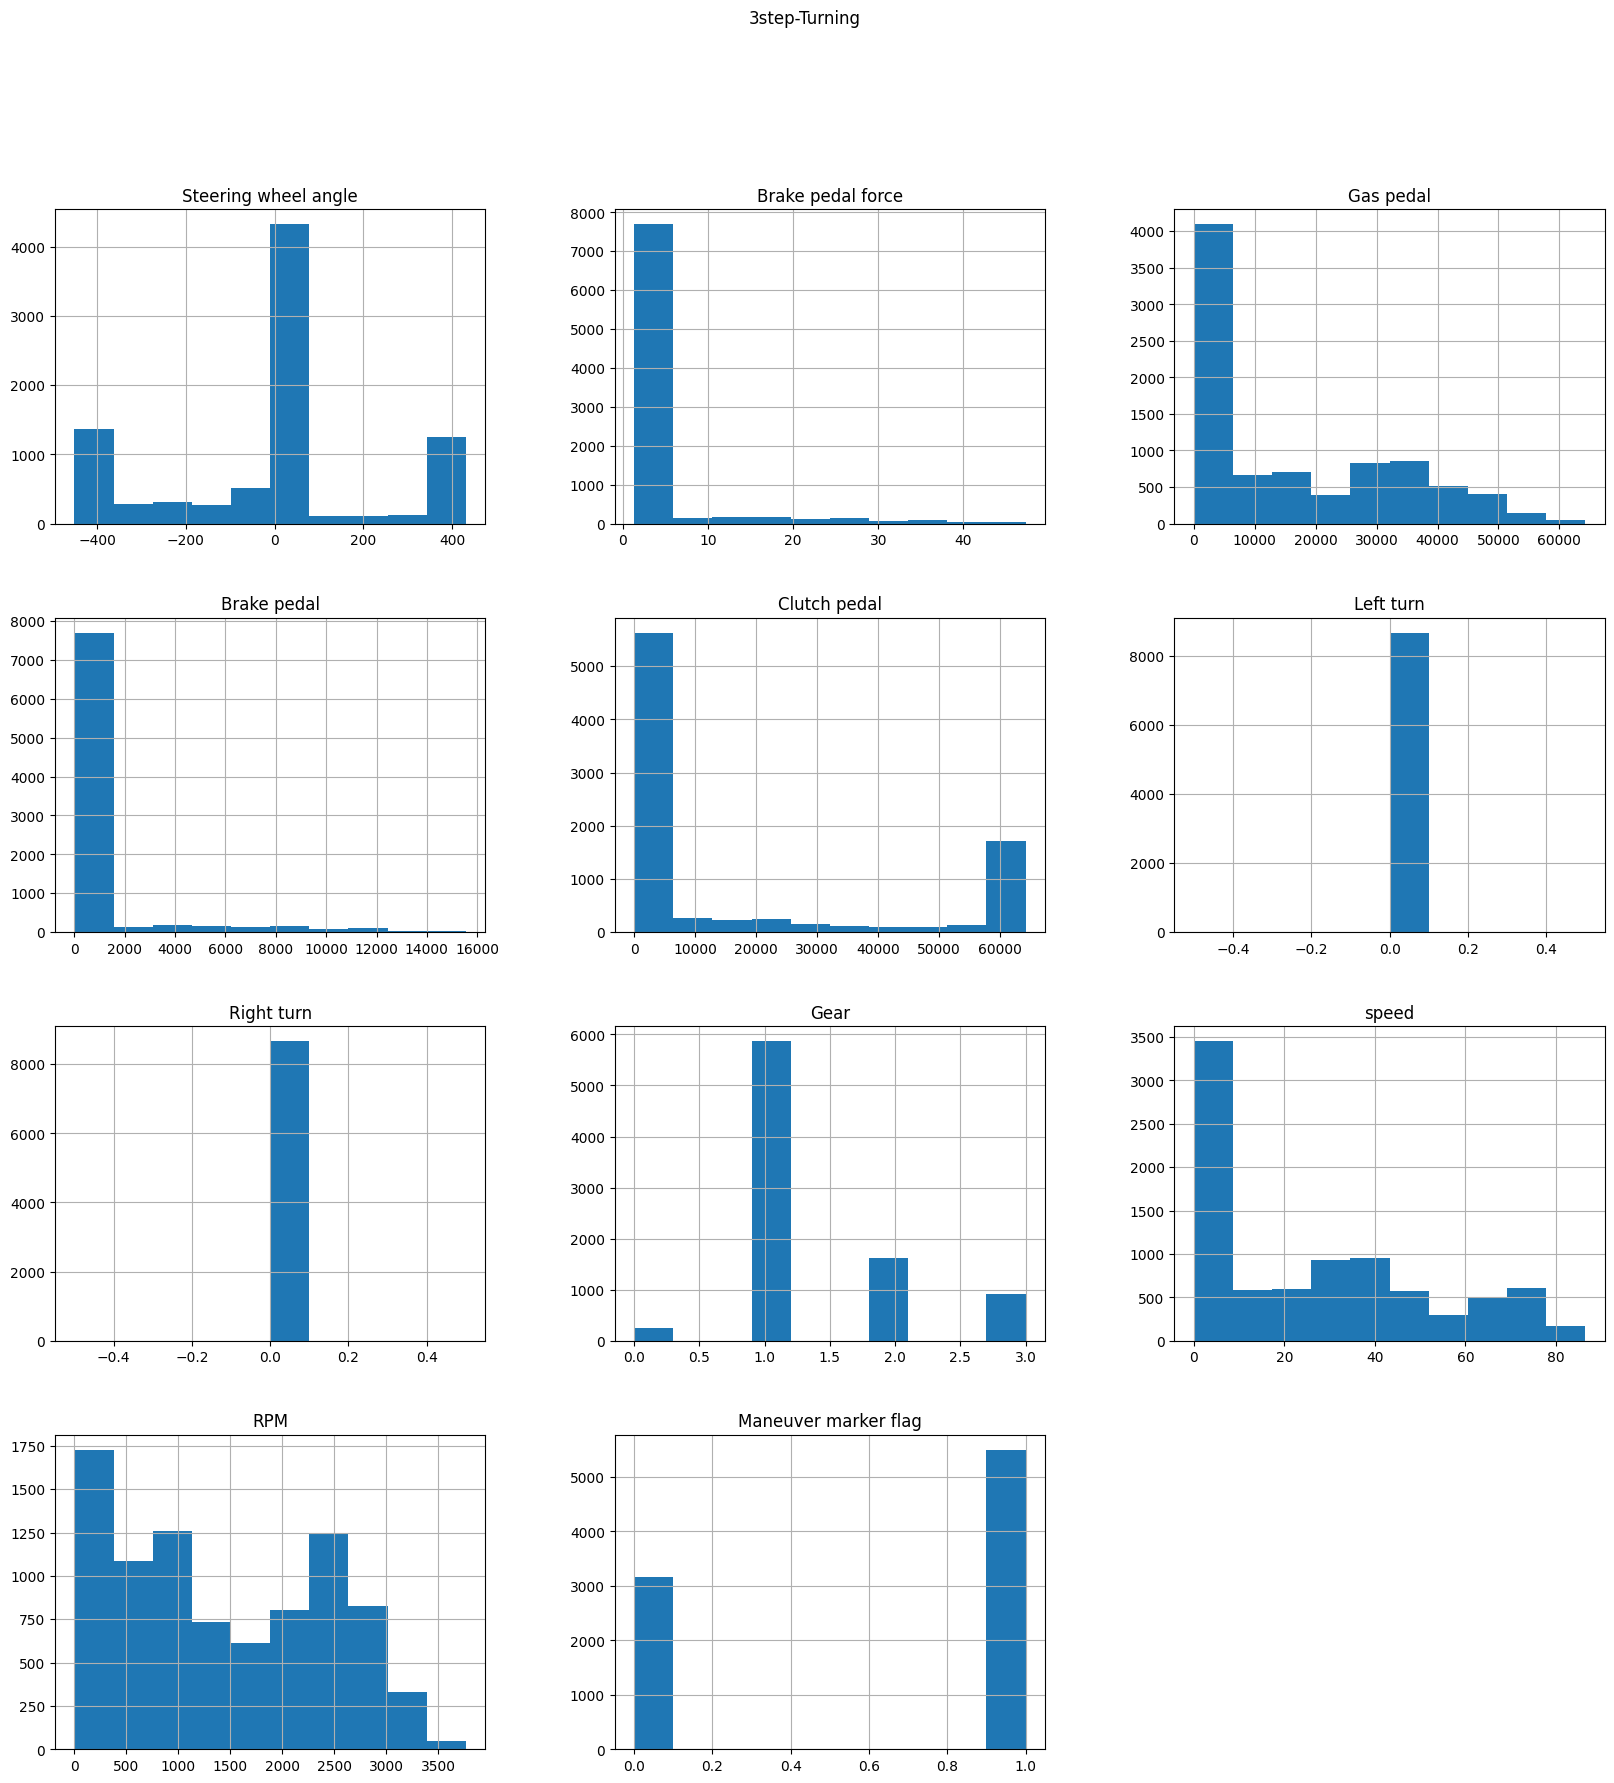

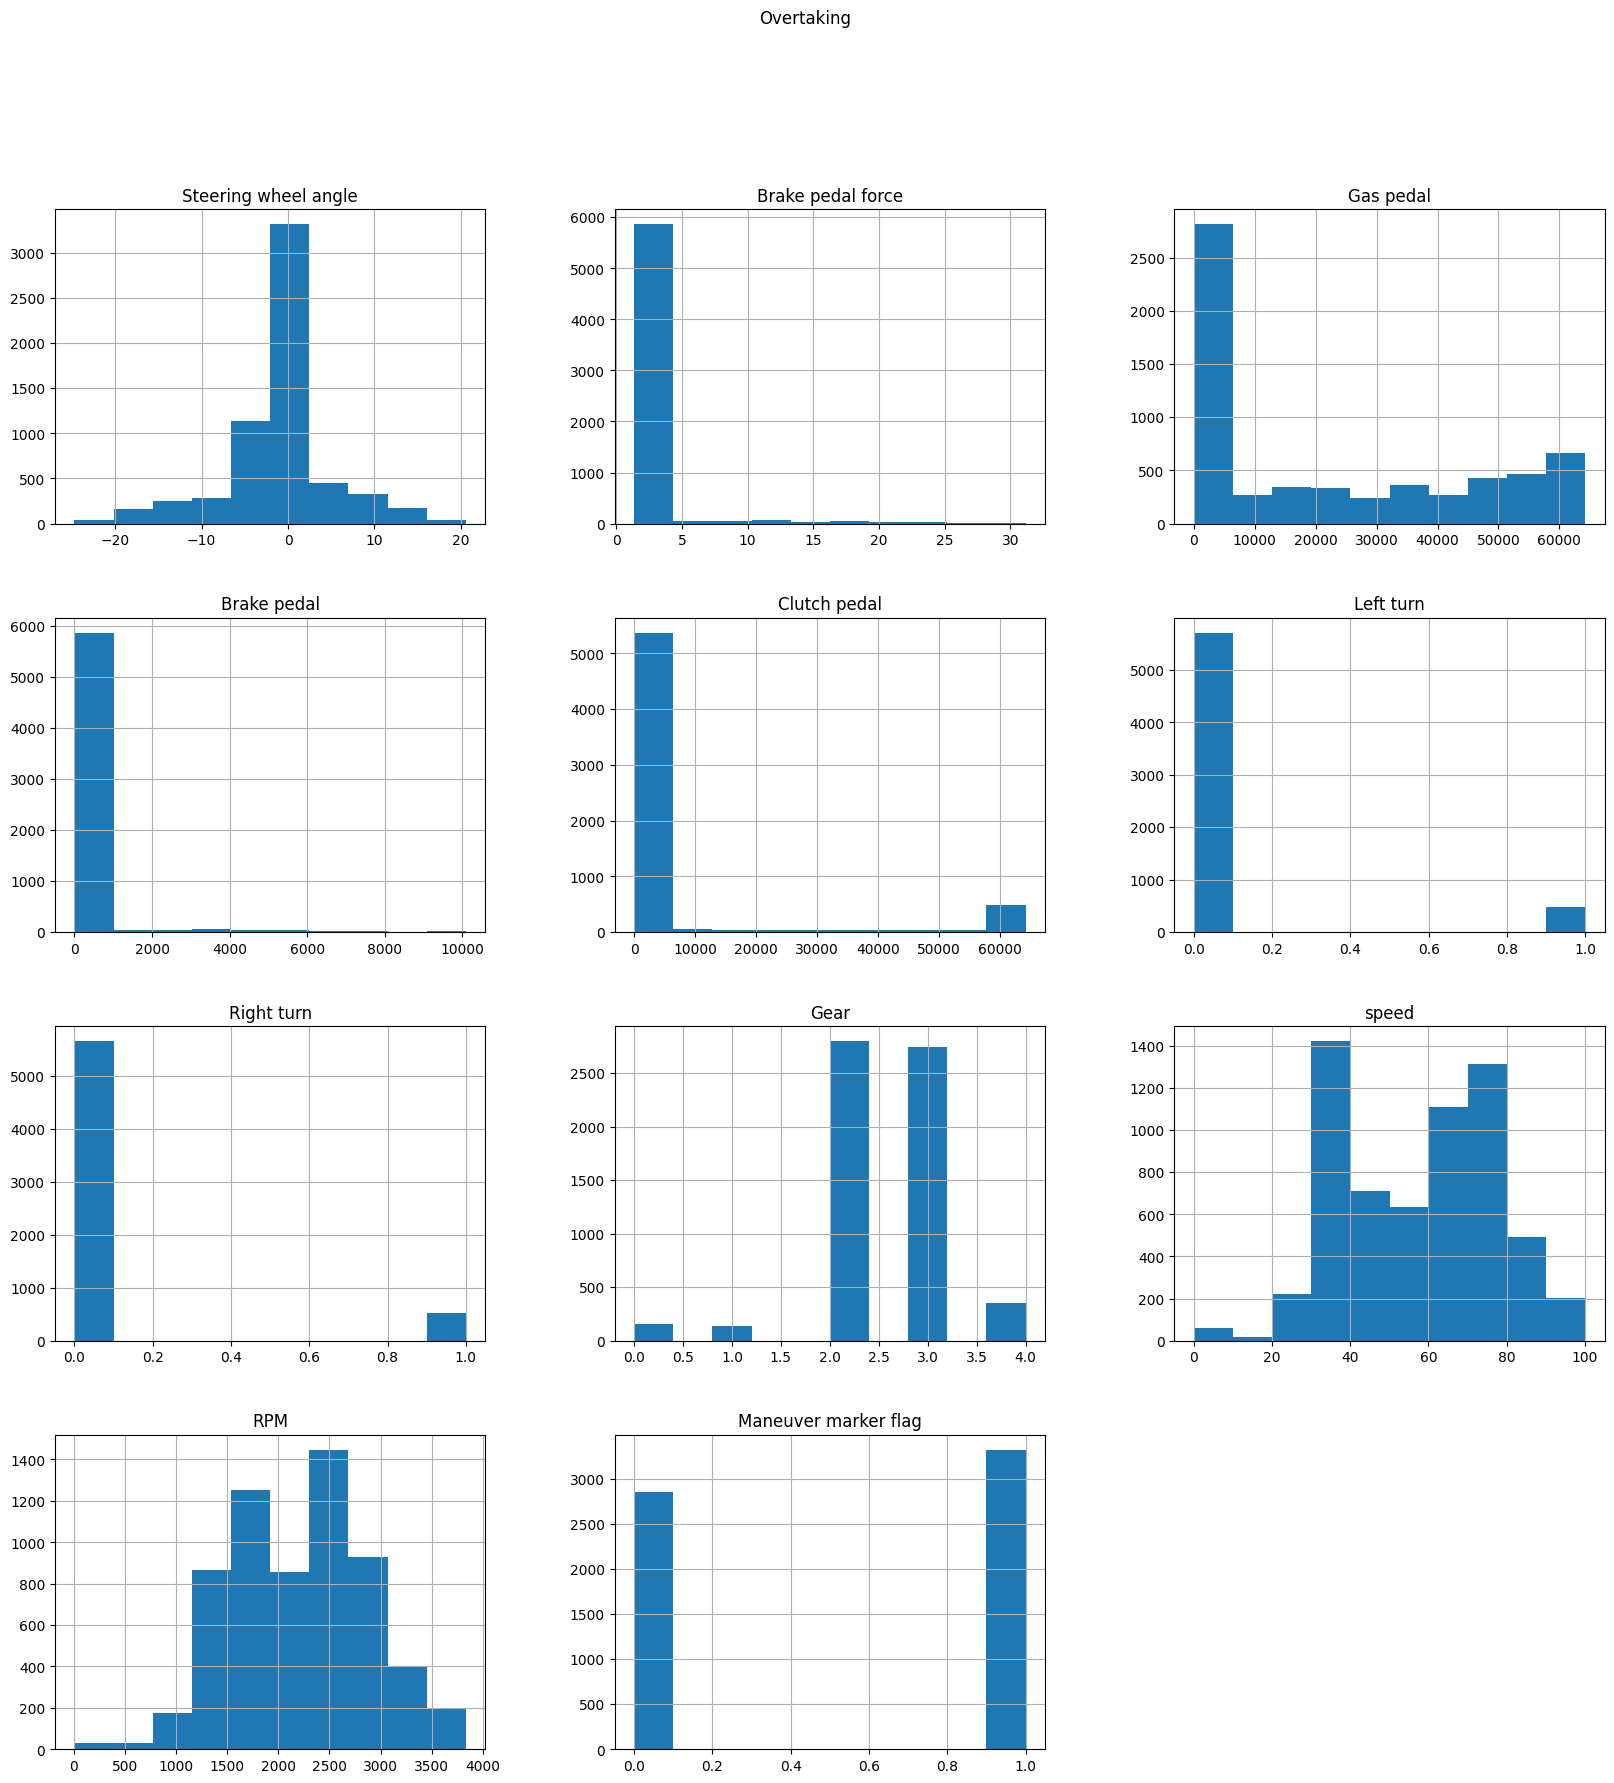

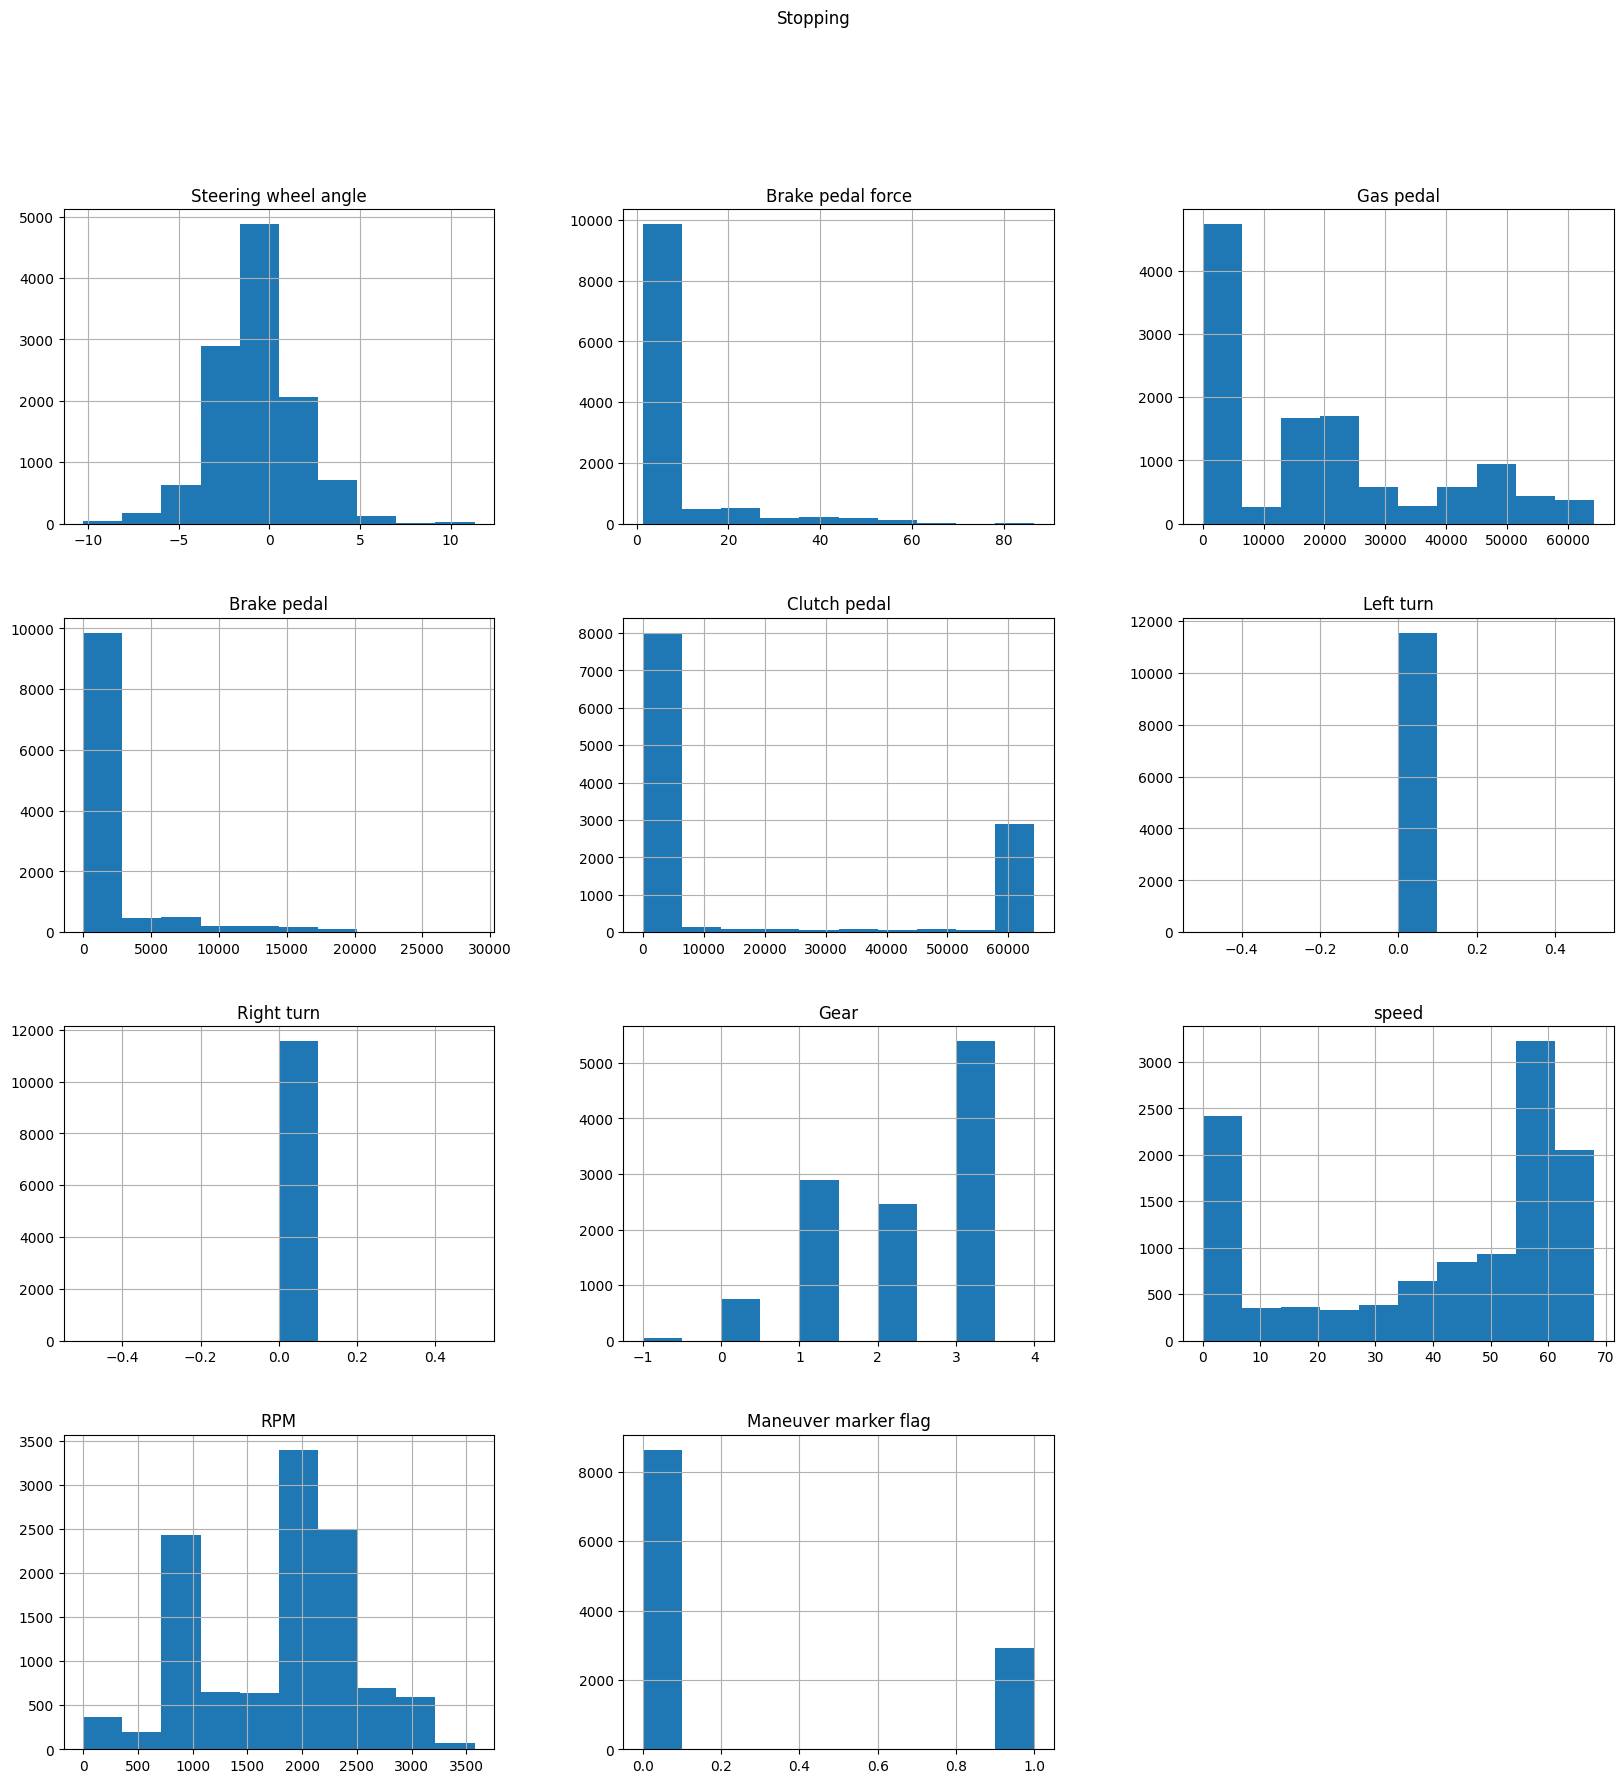

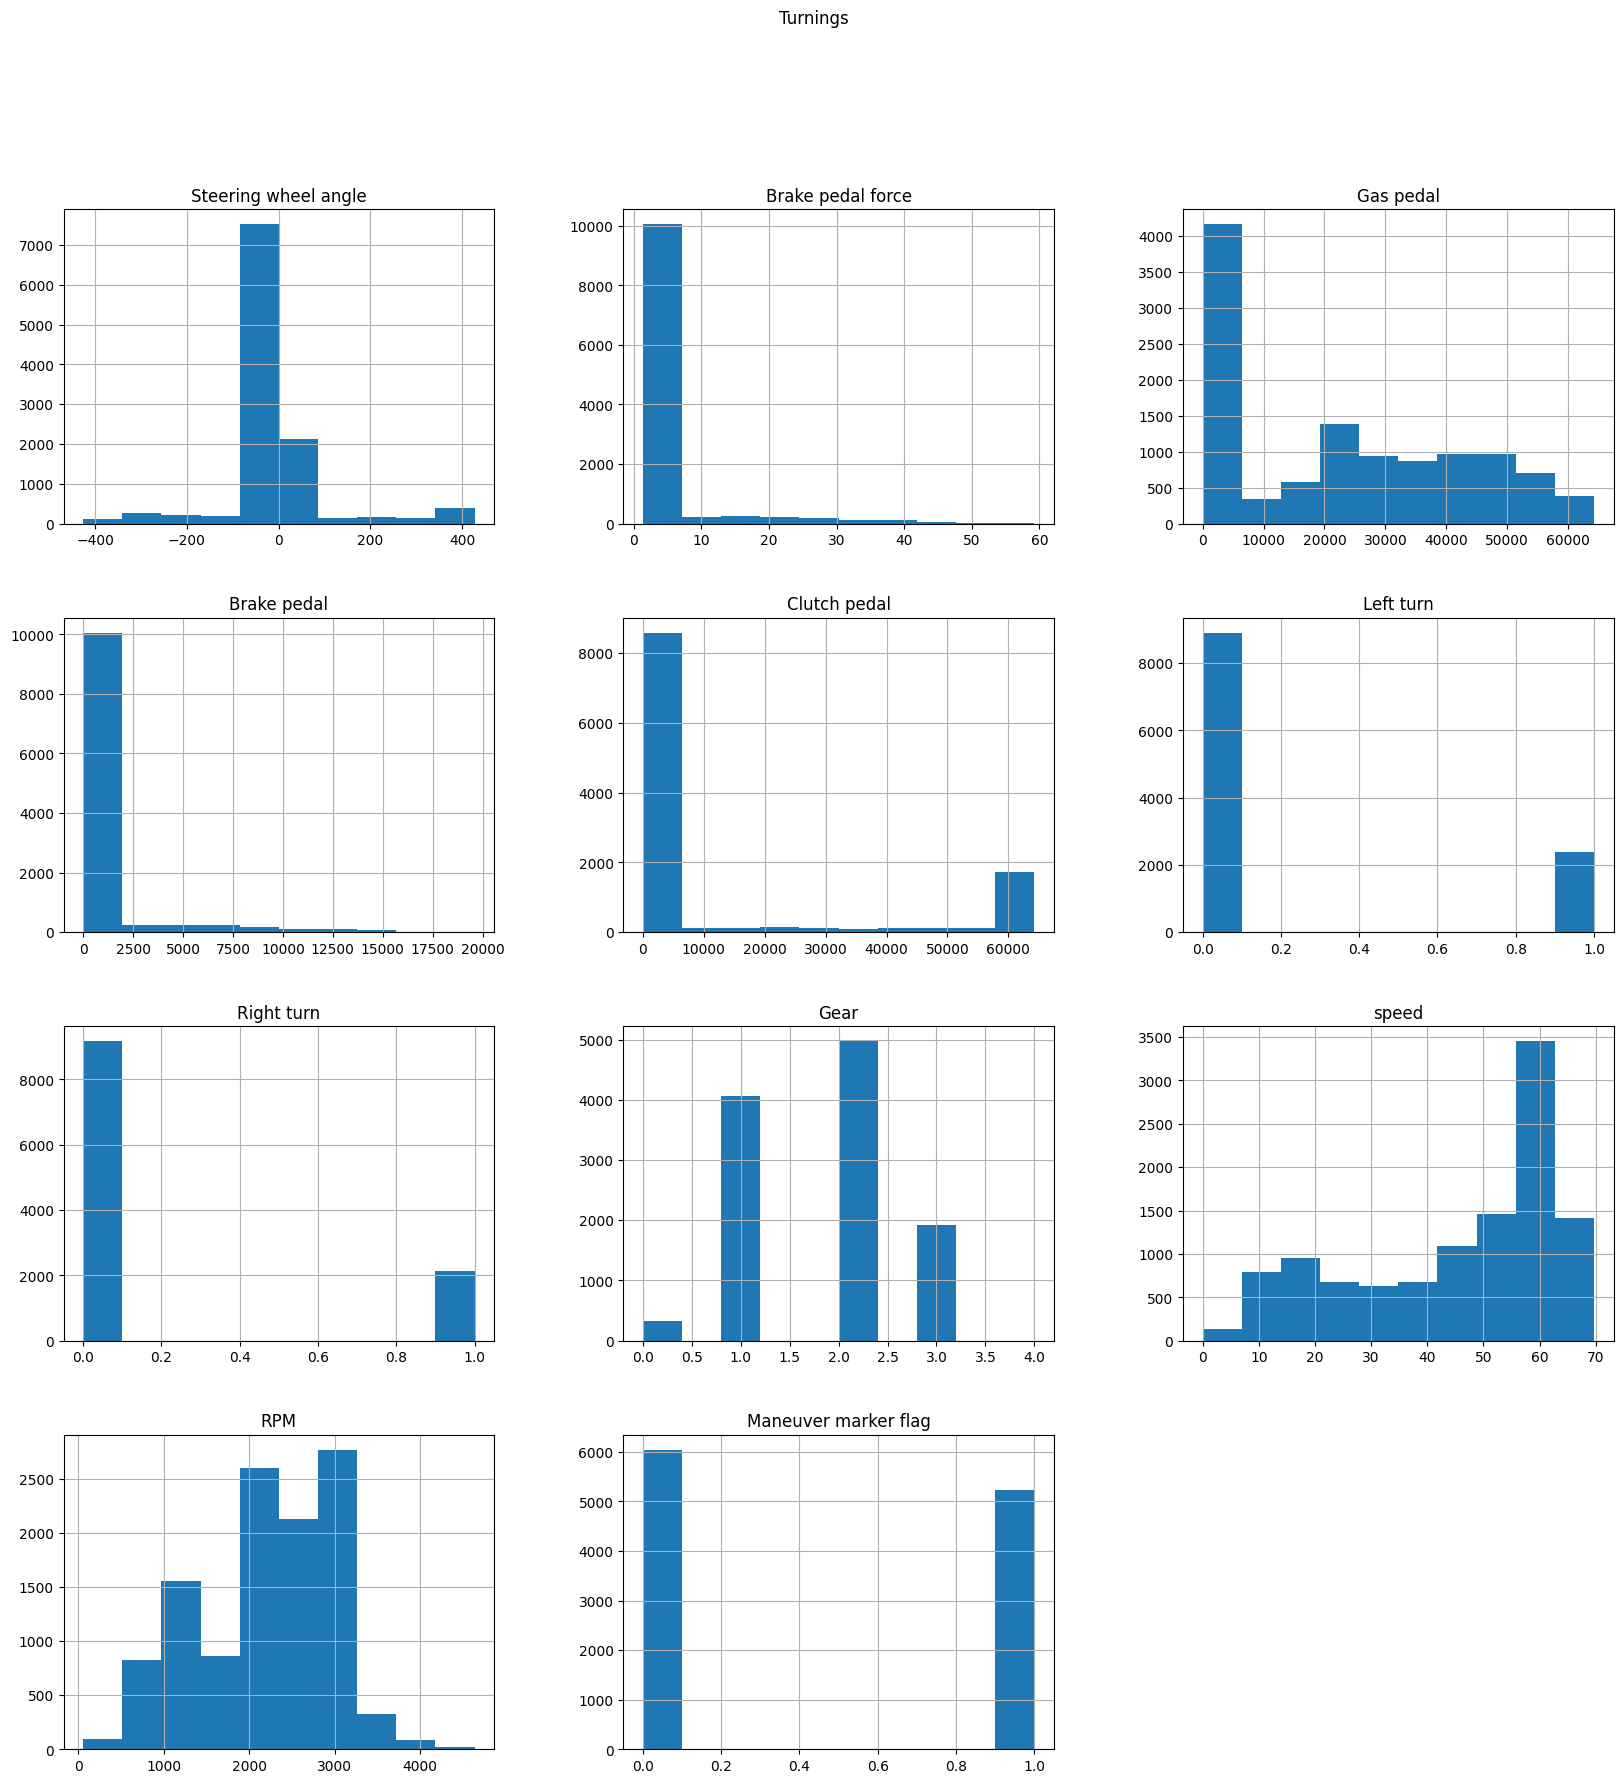

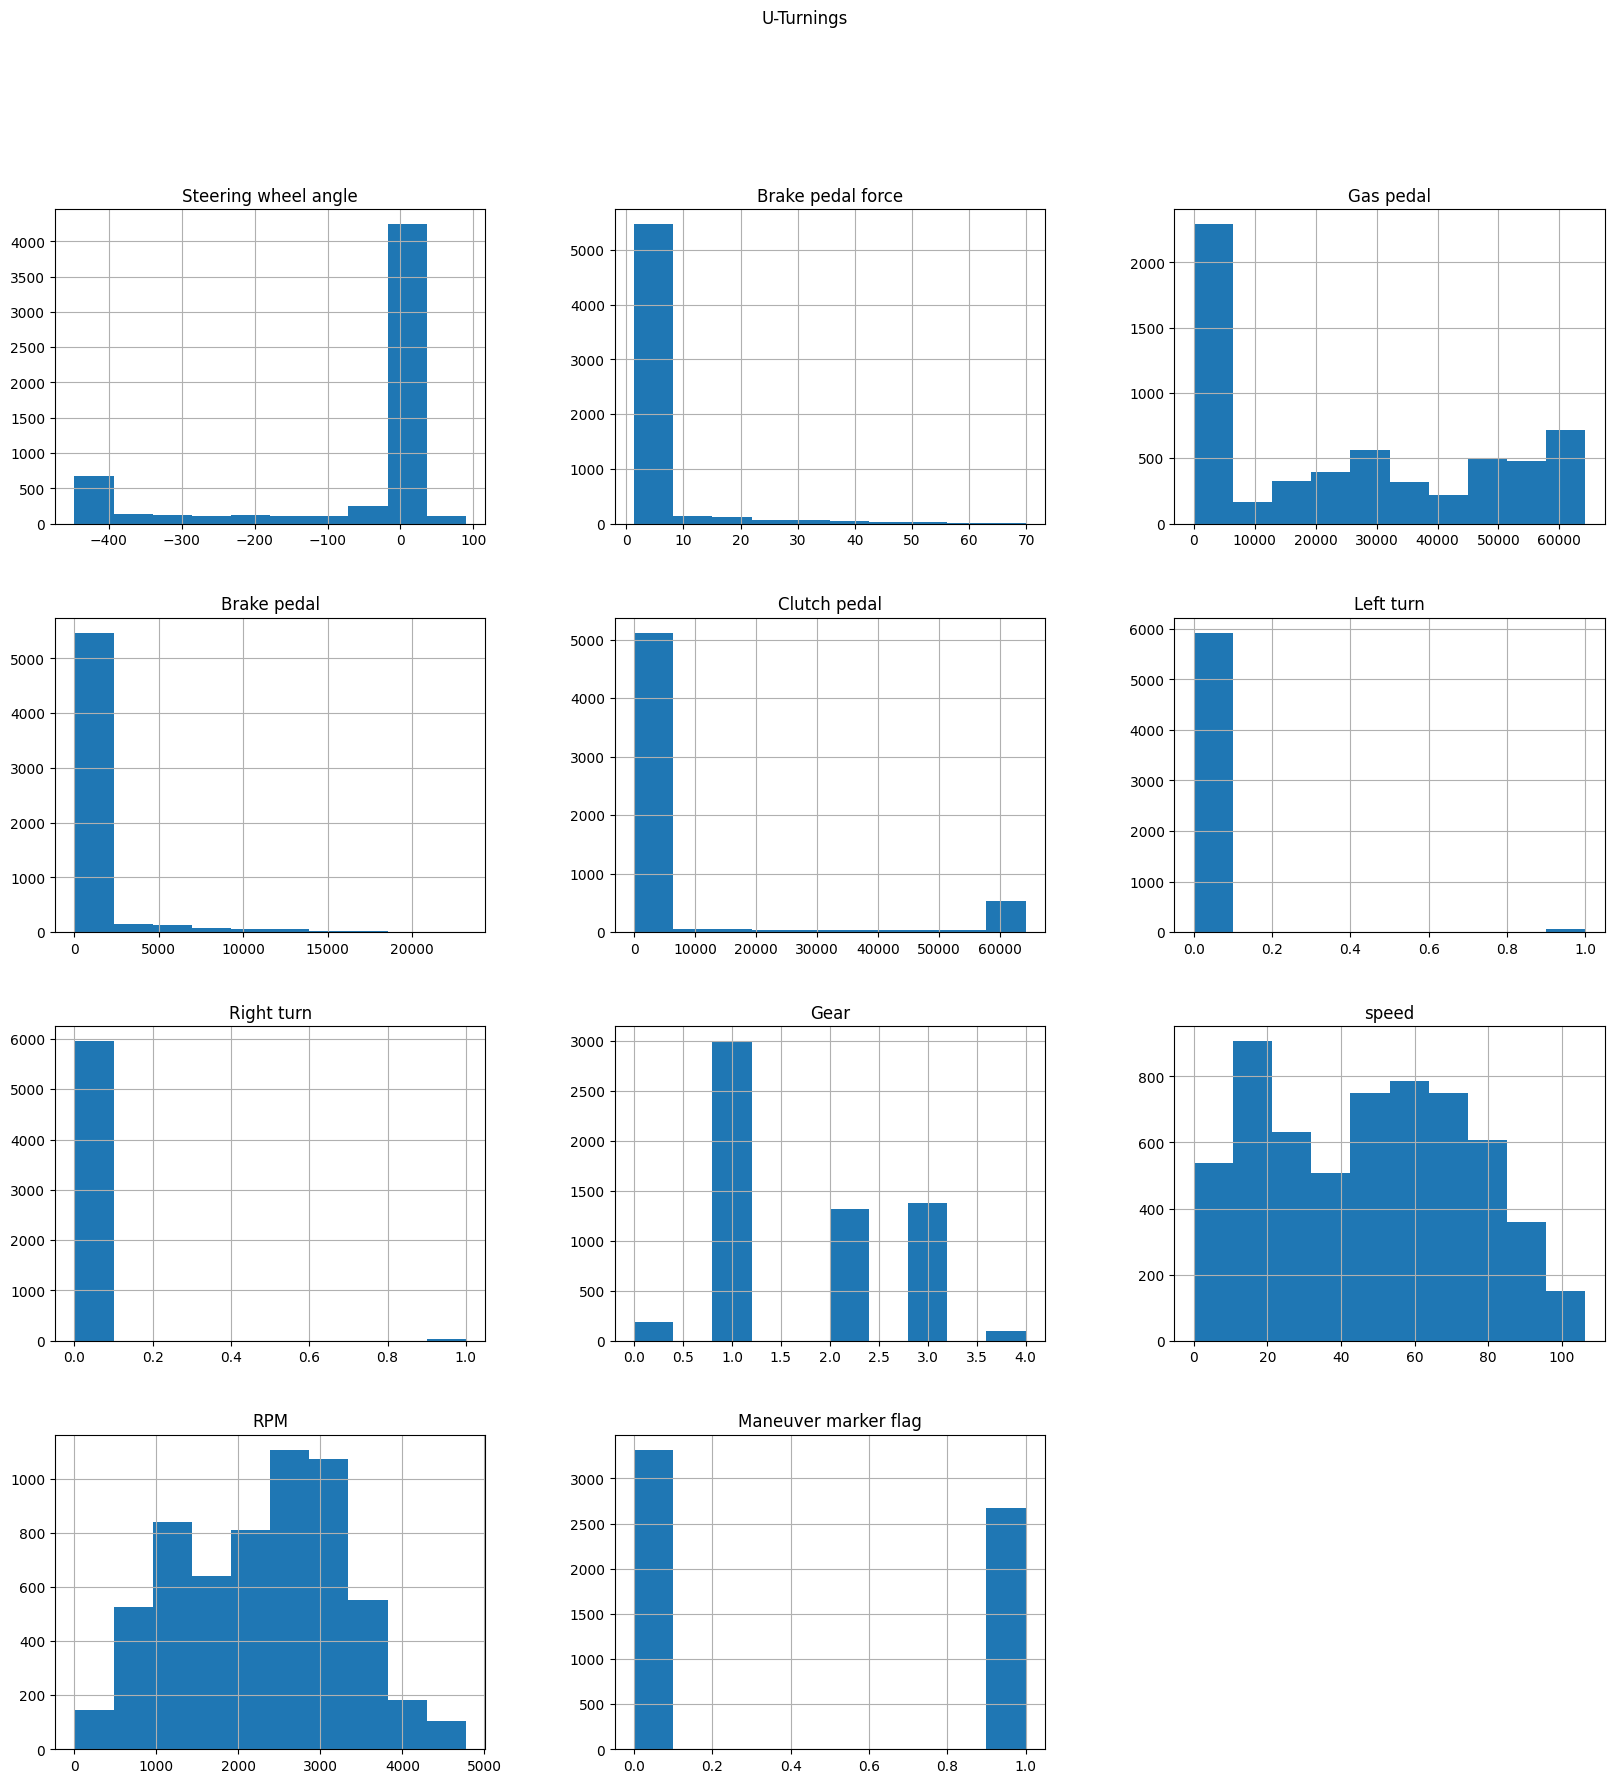

In [31]:
# show histograms of each column showing 'maniobra' as title
for df in dfs:
    df.hist(figsize=(20, 20))
    plt.suptitle(df['maniobra'][0])
    plt.show()

We do not see clear outliers or at least values that are wrong, so we will not be removing any instance.

Given that there are instanes at the end were no maneuvers are done, we decided to remove them as they do not provide useful information.

In [32]:
# remove only end rows at the end of the df that has 0 in 'Maneuver marker flag' till the flag is 1
dfs_cleaned = []
for df in dfs:
    # Encuentra los índices donde 'Maneuver marker flag' es 1
    marker_indices = df[df['Maneuver marker flag'] == 1].index

    if not marker_indices.empty:  # Si hay al menos un 1 en la columna
        last_index = marker_indices[-1]  # Última ocurrencia de 1
        dfs_cleaned.append(df.iloc[:last_index + 1])  # Mantener todo hasta ahí
    else:
        dfs_cleaned.append(df)  # Si no hay 1s, mantener el DataFrame intacto

dfs = dfs_cleaned

Observamos que ha el 3 step turning puede ser tanto 3step-Turning como 3step-Turnings, por lo que nos quedamos con la primera

In [33]:
# escribeme una funcion que se aplique a un df que cambia el valor de la columna 'maniobra' si es  "3step-Turnings" a "3step-Turn"
def change_maniobra(df):
    df['maniobra'] = df['maniobra'].apply(lambda x: '3step-Turning' if x == '3step-Turnings' else x)
    return df

In [34]:
dfs = [change_maniobra(df) for df in dfs]

##### Concat into drivers.

We combine all df into one before applying any flattening and scaling in order to make a better generalization

In [35]:
# separate dfs in train and test 4 to 1
dfs_train = dfs[:-10]
dfs_test = dfs[-10:]

In [36]:
# combine dfs train and test
df_train = pd.concat(dfs_train)
df_test = pd.concat(dfs_test)

##### Flatten Data Set

Firstly we have to flatten the data set.

In [59]:
def flattenMA(df):
    # Define cuáles columnas son numéricas y cuáles categóricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    # Quitamos 'flag' de la lista numérica (si no queremos procesarla)
    if 'Maneuver marker flag' in numeric_cols:
        numeric_cols.remove('Maneuver marker flag')

    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

    # Define las ventanas para los moving averages
    window1 = 60
    window2 = 120
    window3 = 180
    window4 = 120
    window5 = 160
    window6 = 200

    # Separamos el DataFrame en segmentos:
    # Cada segmento contiene las filas con flag==0 hasta antes de aparecer un 1.
    segments = []
    segment_rows = []

    for _, row in df.iterrows():
        if row['Maneuver marker flag'] == 1:
            # Cuando encontramos un 1, si tenemos filas acumuladas en el segmento, lo agregamos y reiniciamos
            if segment_rows:
                segments.append(pd.DataFrame(segment_rows))
                segment_rows = []
        else:
            segment_rows.append(row)

    # Agregar el último segmento (si no finaliza en 1)
    if segment_rows:
        segments.append(pd.DataFrame(segment_rows))

    # Procesamos cada segmento para obtener las agregaciones:
    result = []
    for seg in segments:
        seg_result = {}
        
        # Para las columnas numéricas, calculamos dos moving averages y tomamos el último valor de cada serie
        for col in numeric_cols:
            # Calculate MA according to the window
            ma1 = seg[col].rolling(window=window1, min_periods=1).mean().iloc[-1]
            ma2 = seg[col].rolling(window=window2, min_periods=1).mean().iloc[-1]
            ma3 = seg[col].rolling(window=window3, min_periods=1).mean().iloc[-1]
            # ma4 = seg[col].rolling(window=window4, min_periods=1).mean().iloc[-1]
            # ma5 = seg[col].rolling(window=window5, min_periods=1).mean().iloc[-1]
            # ma6 = seg[col].rolling(window=window6, min_periods=1).mean().iloc[-1]

            seg_result[f"{col}_ma1"] = ma1
            seg_result[f"{col}_ma2"] = ma2
            seg_result[f"{col}_ma3"] = ma3
            # seg_result[f"{col}_ma4"] = ma4
            # seg_result[f"{col}_ma5"] = ma5
            # seg_result[f"{col}_ma6"] = ma6
        
        # Para las columnas categóricas, se extrae una lista de valores únicos que aparecieron
        for col in categorical_cols:
            unique_vals = seg[col].unique().tolist()
            seg_result[col] = unique_vals
        
        result.append(seg_result)

    # Se crea el DataFrame final aplanado (cada fila es un segmento)
    df_result = pd.DataFrame(result)
    return df_result

We flatten both train and test DFs

In [60]:
df_train_flat = flattenMA(df_train)
df_test_flat = flattenMA(df_test)

In [61]:
print(df_train_flat['maniobra'].value_counts())
print(df_test_flat['maniobra'].value_counts())

maniobra
[Stopping]         45
[Turnings]         45
[3step-Turning]    30
[U-Turnings]       29
[Overtaking]       28
Name: count, dtype: int64
maniobra
[Turnings]         40
[Stopping]         30
[3step-Turning]    20
[Overtaking]       20
[U-Turnings]       17
Name: count, dtype: int64


We have verified that there are no issues with maniobra so we remove the list and hold the element its holding.

In [62]:
df_train_flat['maniobra'] = df_train_flat['maniobra'].apply(lambda x: x[0])

df_test_flat['maniobra'] = df_test_flat['maniobra'].apply(lambda x: x[0])

In [63]:
df_train_flat.head(3)

Steering wheel angle_ma1  Steering wheel angle_ma2  Steering wheel angle_ma3  Brake pedal force_ma1  Brake pedal force_ma2  Brake pedal force_ma3  Gas pedal_ma1  Gas pedal_ma2  Gas pedal_ma3  Brake pedal_ma1  Brake pedal_ma2  Brake pedal_ma3  Clutch pedal_ma1  Clutch pedal_ma2  Clutch pedal_ma3  Left turn_ma1  Left turn_ma2  Left turn_ma3  Right turn_ma1  Right turn_ma2  Right turn_ma3  Gear_ma1  Gear_ma2  Gear_ma3  speed_ma1  speed_ma2  speed_ma3      RPM_ma1      RPM_ma2      RPM_ma3       maniobra
0                 -2.247000                 -1.174833                 -1.405667              29.473167              16.819333              11.666222            0.0   11417.166667   22781.616667      9516.366667      5233.091667      3488.727778      64253.000000      49174.141667      34859.450000            0.0            0.0            0.0             0.0             0.0             0.0  1.933333  2.466667  2.644444  35.883000  55.080750  58.703833  1069.358083  1750.787192  2082.814683  3step-Turning
1               -141.931333                -22.207500                 -4.479333               1.360000               1.360000               7.702056        17894.4   12525.333333    8350.222222         0.000000         0.000000      2147.005556      25949.366667      38190.391667      46877.927778            0.0            0.0            0.0             0.0             0.0             0.0  1.000000  0.741667  0.916667   5.888000   3.325750  11.425944  1160.573883  1034.980975  1068.026606  3step-Turning
2                 -1.291333                 -0.973833                 -1.003111              14.364000               9.415167               6.730111            0.0    6880.366667   24010.388889      4402.150000      2726.850000      1817.900000      64253.000000      56484.050000      40855.638889            0.0            0.0            0.0             0.0             0.0             0.0  1.950000  2.466667  2.977778  54.127667  65.570417  67.788333   991.168350  1532.616825  1681.435989  3step-Turning

In [64]:
# save to csv
df_train_flat.to_csv(dir_preprocessed + 'non_minmax/' + 'train_flat.csv', index=False)
df_test_flat.to_csv(dir_preprocessed + 'non_minmax/' + 'test_flat.csv', index=False)

### Model Training

In [65]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # Puedes usar StandardScaler si lo prefieres
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### Assign Data

In [66]:
X_train = df_train_flat.drop(columns='maniobra')
y_train = df_train_flat['maniobra']
X_test = df_test_flat.drop(columns='maniobra')
y_test = df_test_flat['maniobra']

In [67]:
X_test.head()

Steering wheel angle_ma1  Steering wheel angle_ma2  Steering wheel angle_ma3  Brake pedal force_ma1  Brake pedal force_ma2  Brake pedal force_ma3  Gas pedal_ma1  Gas pedal_ma2  Gas pedal_ma3  Brake pedal_ma1  Brake pedal_ma2  Brake pedal_ma3  Clutch pedal_ma1  Clutch pedal_ma2  Clutch pedal_ma3  Left turn_ma1  Left turn_ma2  Left turn_ma3  Right turn_ma1  Right turn_ma2  Right turn_ma3  Gear_ma1  Gear_ma2  Gear_ma3  speed_ma1  speed_ma2  speed_ma3      RPM_ma1      RPM_ma2      RPM_ma3
0                 -1.086000                 -0.425000                 -0.938333               2.485167               1.922583               1.735056   10035.200000   13185.600000   12678.755556       381.216667       190.608333       127.072222      19230.733333      12127.991667      10437.194444            0.0            0.0            0.0             0.0             0.0             0.0       3.0       3.0       3.0  50.504833  51.220500  52.422167  1632.046017  1731.630325  1798.047144
1                 -0.510000                 -0.289333                 -2.809102               8.160000               4.760000               3.803114   13229.966667   21751.600000   21277.221557      2302.233333      1151.116667       827.149701      32435.633333      16779.975000      14588.568862            0.0            0.0            0.0             0.0             0.0             0.0       2.0       2.0       2.0  37.078667  34.414417  31.782335  1682.634983  1613.529200  1512.214539
2                 -2.677333                 -0.685000                 -0.796667               4.512667               2.936333               2.410889   10731.733333   16661.866667   18638.577778      1067.583333       533.791667       355.861111      17405.300000       8702.650000       5801.766667            0.0            0.0            0.0             0.0             0.0             0.0       3.0       3.0       3.0  54.803167  54.999083  54.707556  1713.817317  1832.145300  1859.001350
3                 -5.638000                 -2.126500                 -1.077667              12.538500               6.949250               5.086167    5480.533333   14829.333333   20525.422222      3784.283333      1892.141667      1261.427778      40733.966667      22739.183333      16724.566667            0.0            0.0            0.0             0.0             0.0             0.0       2.0       2.0       2.0  38.164667  39.132333  36.723833  1589.626500  1767.779250  1696.218489
4                 -1.540000                 -1.127000                 -0.773444               6.752000               4.056000               3.157333    8008.533333   18212.266667   21501.155556      1825.733333       912.866667       608.577778      30908.716667      15454.358333      10302.905556            0.0            0.0            0.0             0.0             0.0             0.0       4.0       4.0       4.0  60.812333  61.748167  61.646611  1406.733933  1555.637917  1593.962739

##### MinMax Scaling

In [68]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Encoding y

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [70]:
print(y_test_encoded)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4]


##### Training

In [71]:
num_classes = y_train.nunique()

In [72]:
# Usando 'multi:softmax' para que se devuelvan las etiquetas o 'multi:softprob' para probabilidades.
model = XGBClassifier(
    objective='multi:softprob',  # O 'multi:softprob' si prefieres probabilidades
    num_class=num_classes,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [73]:
model.fit(X_train_scaled, y_train_encoded)

c:\Users\NoobG\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:03:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

##### Predictions

In [74]:
y_pred = model.predict(X_test_scaled)

##### Metrics

In [75]:
# Calcular la exactitud
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Generar y mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test_encoded, y_pred))

# Calcular y mostrar la matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test_encoded, y_pred))


Accuracy: 0.5196850393700787
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.42      0.25      0.31        20
           1       0.79      0.55      0.65        20
           2       0.52      0.57      0.54        30
           3       0.51      0.72      0.60        40
           4       0.36      0.24      0.29        17

    accuracy                           0.52       127
   macro avg       0.52      0.47      0.48       127
weighted avg       0.52      0.52      0.51       127

Matriz de Confusión:
[[ 5  0  3  9  3]
 [ 1 11  1  6  1]
 [ 0  0 17 12  1]
 [ 1  1  7 29  2]
 [ 5  2  5  1  4]]
